In [ ]:
from feature_functions import *
import math

In [ ]:
def rateOfInversions(data, time):
    maximum = argrelextrema(np.array(data), np.greater)    
    return (len(maximum[0]) / (max(time) - min(time)))

In [ ]:
controlFiles, patientFiles = fileClassification()

686
925
690
804
520
609
564
1336
2038
1423
1517
876
413
552
679


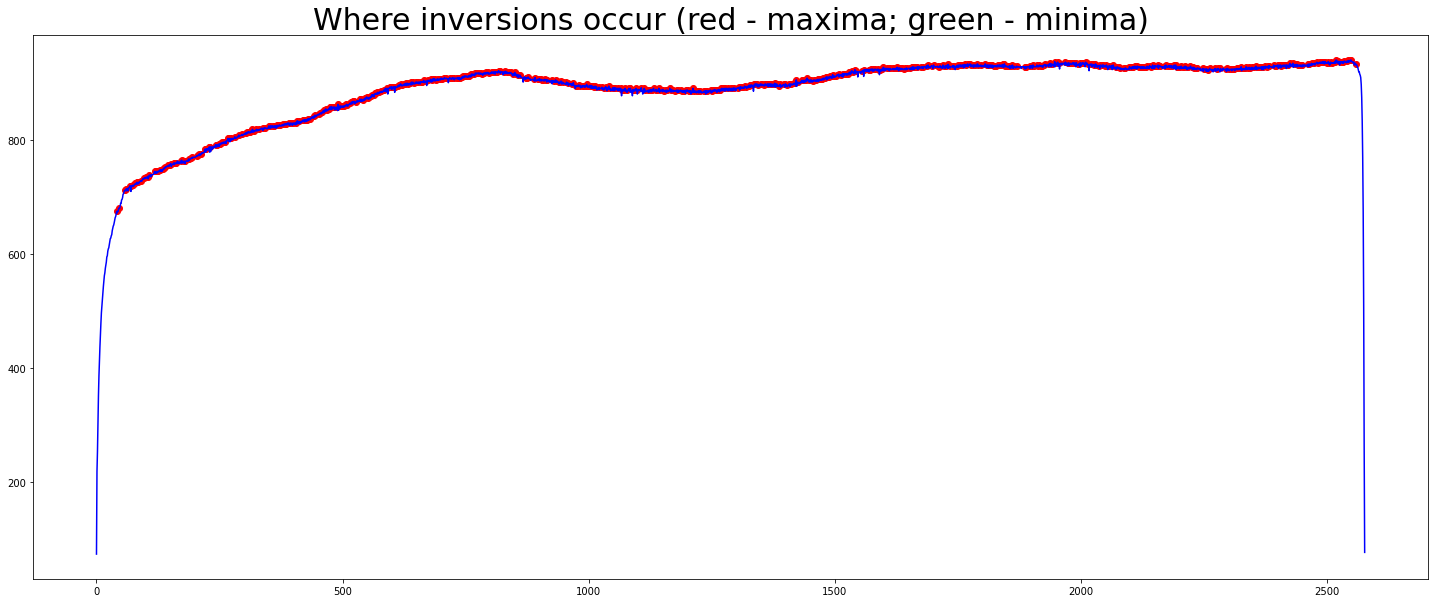

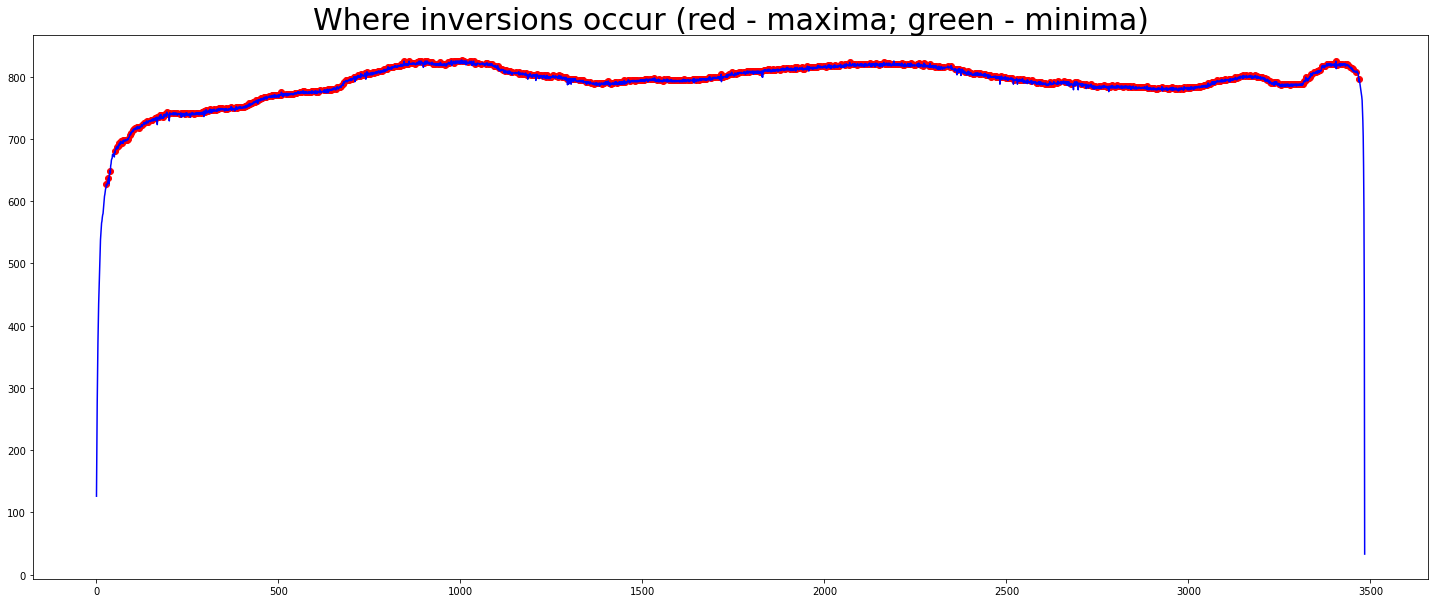

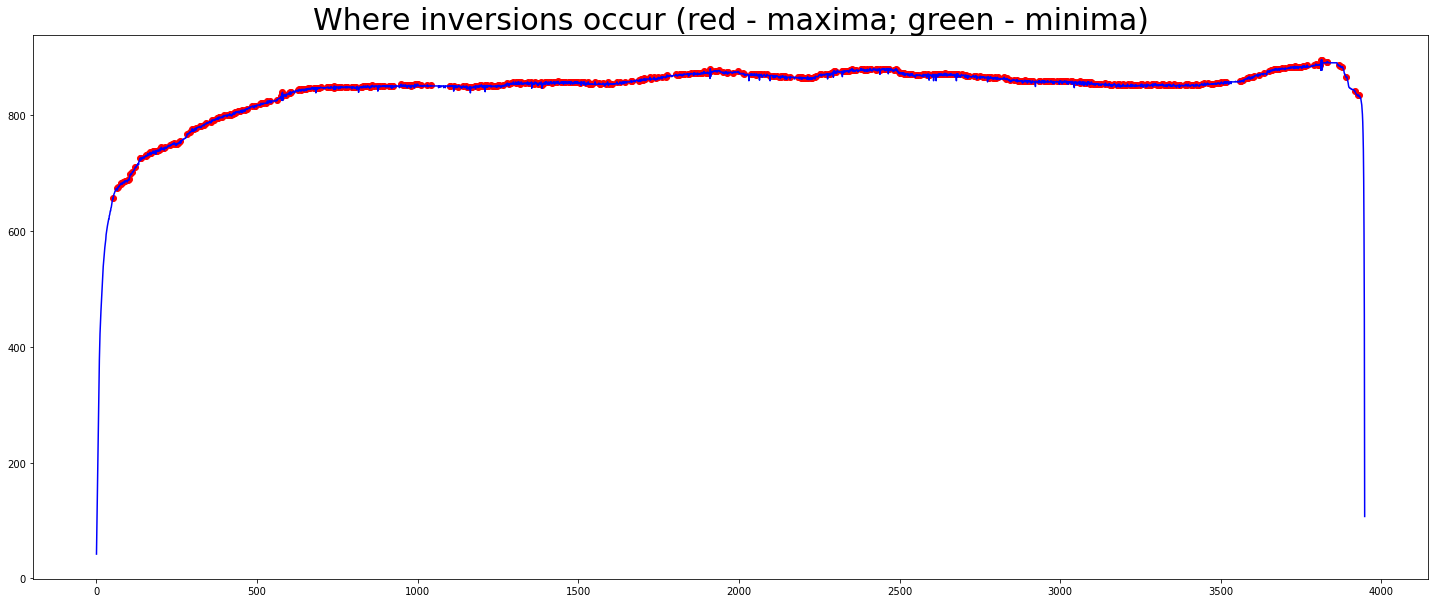

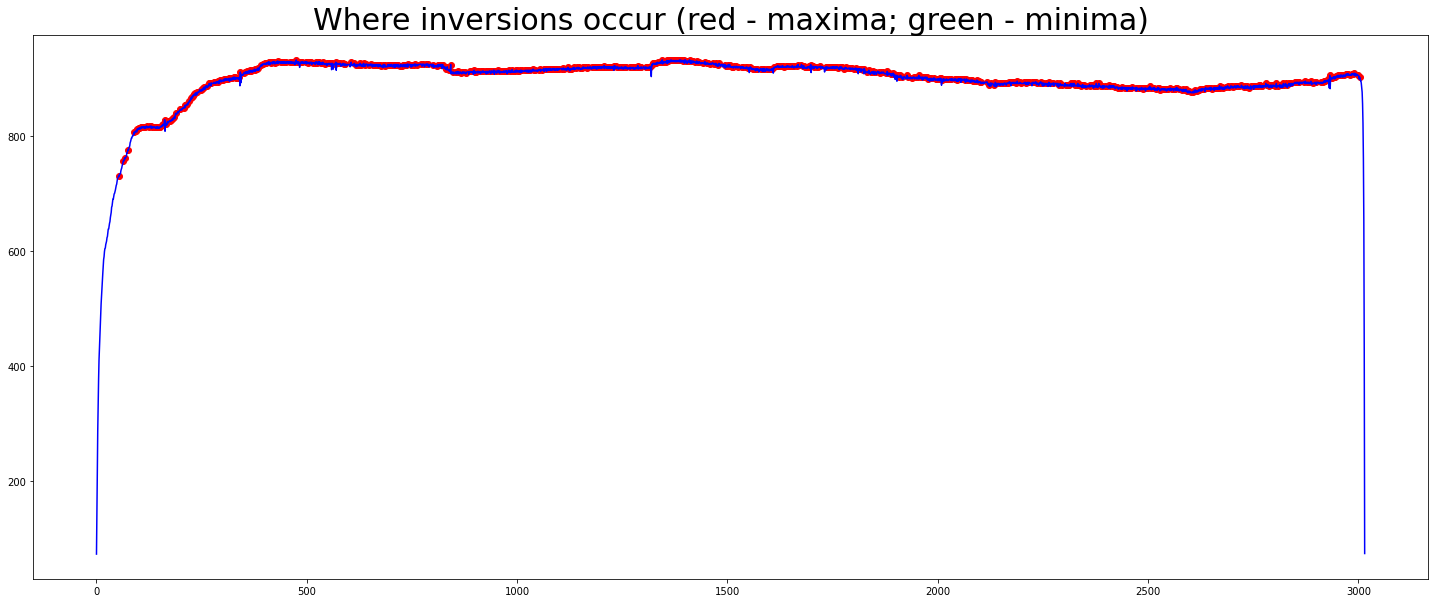

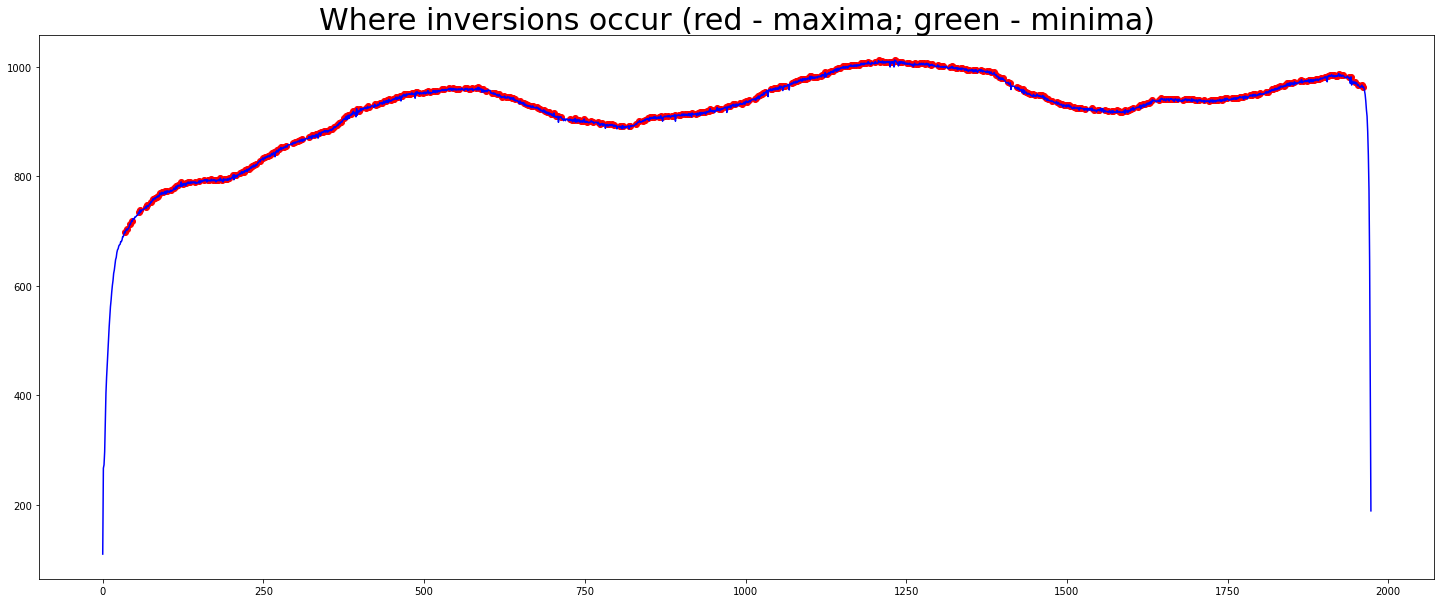

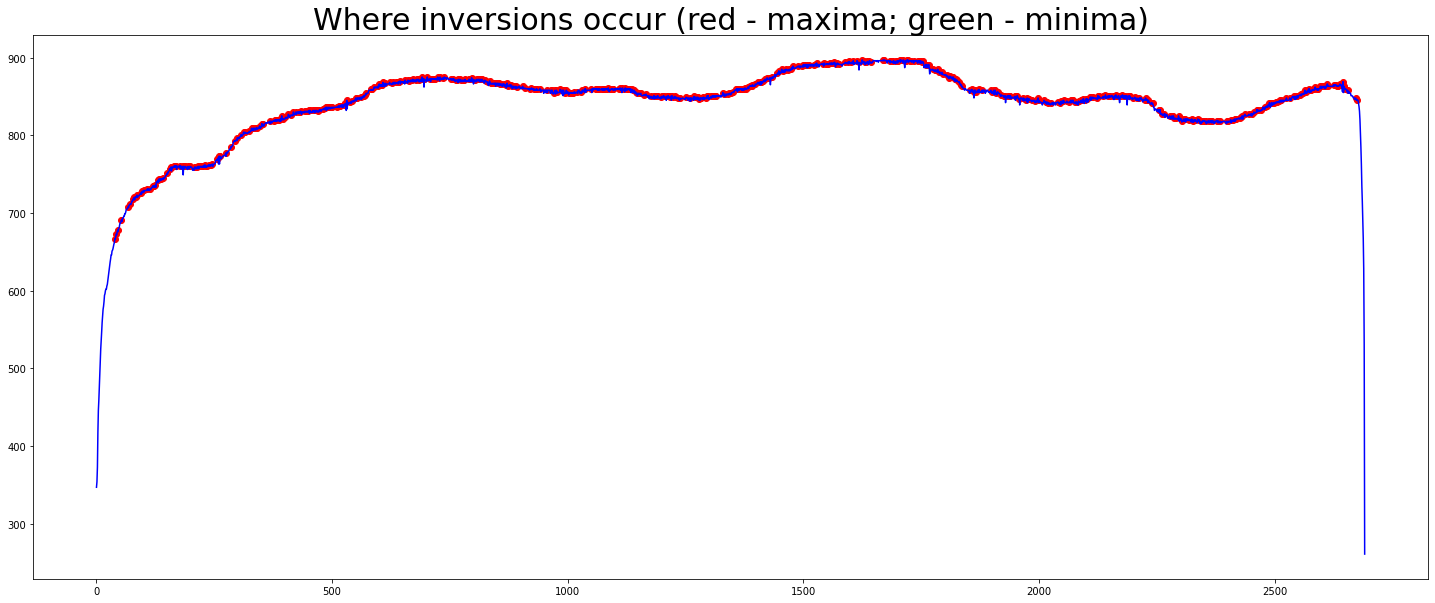

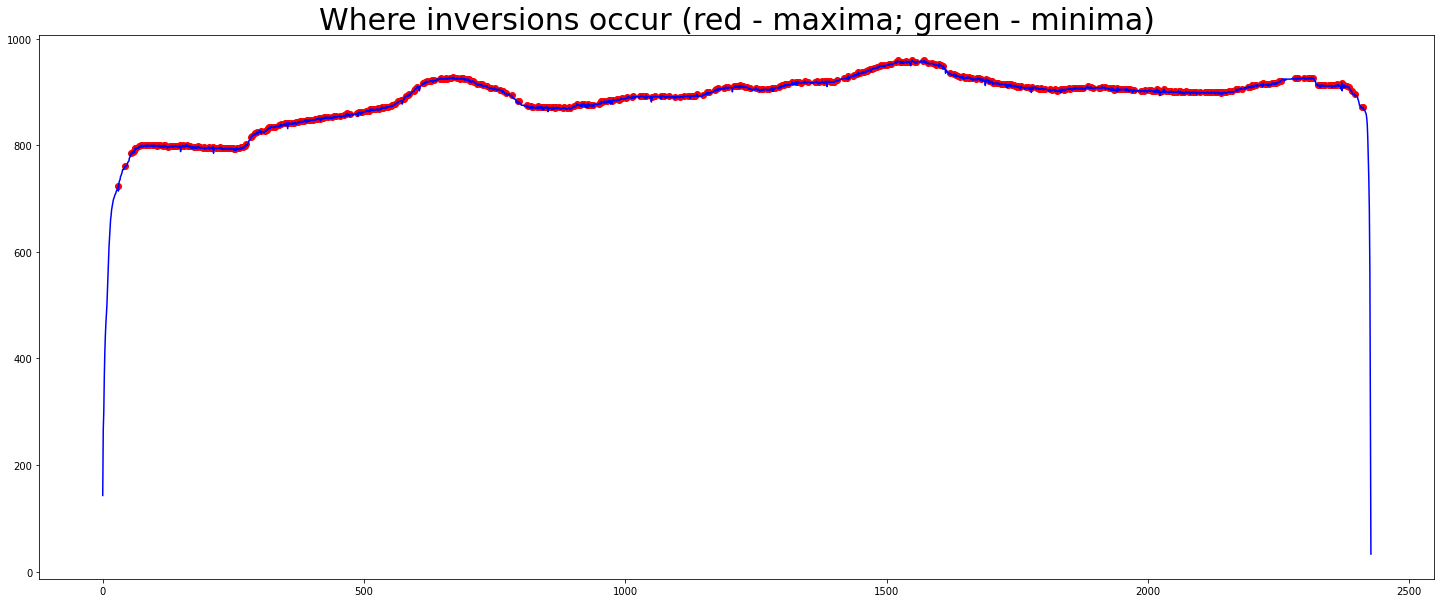

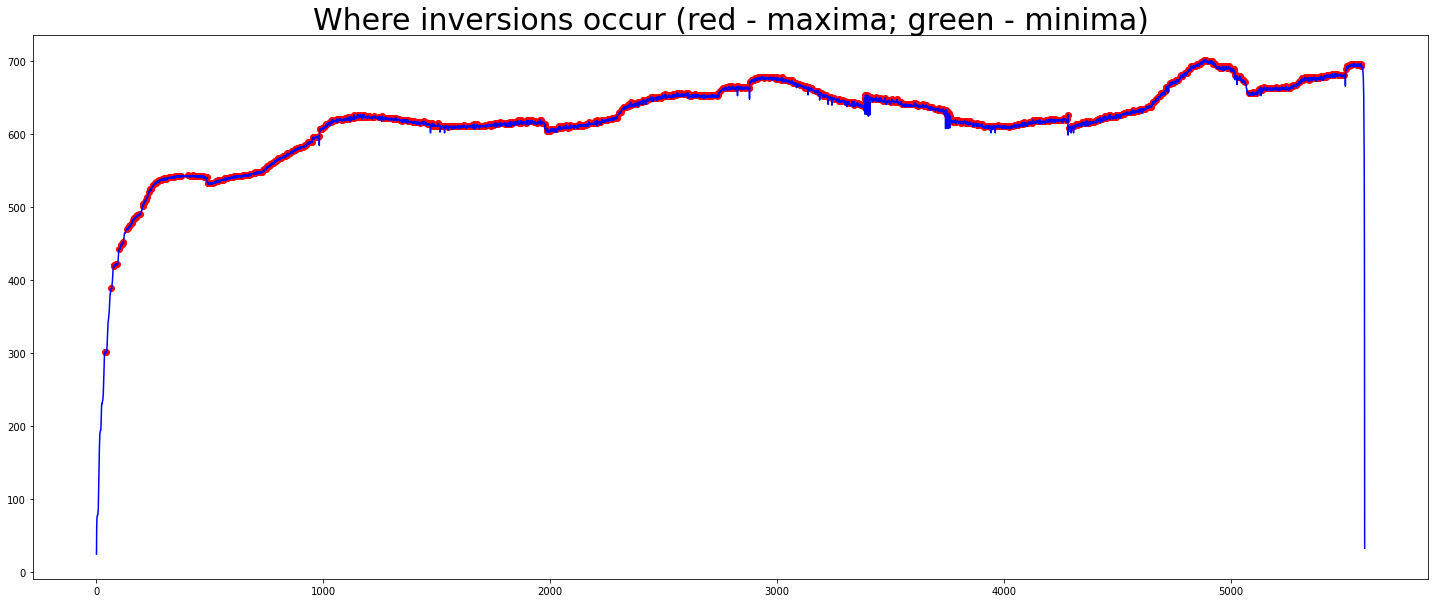

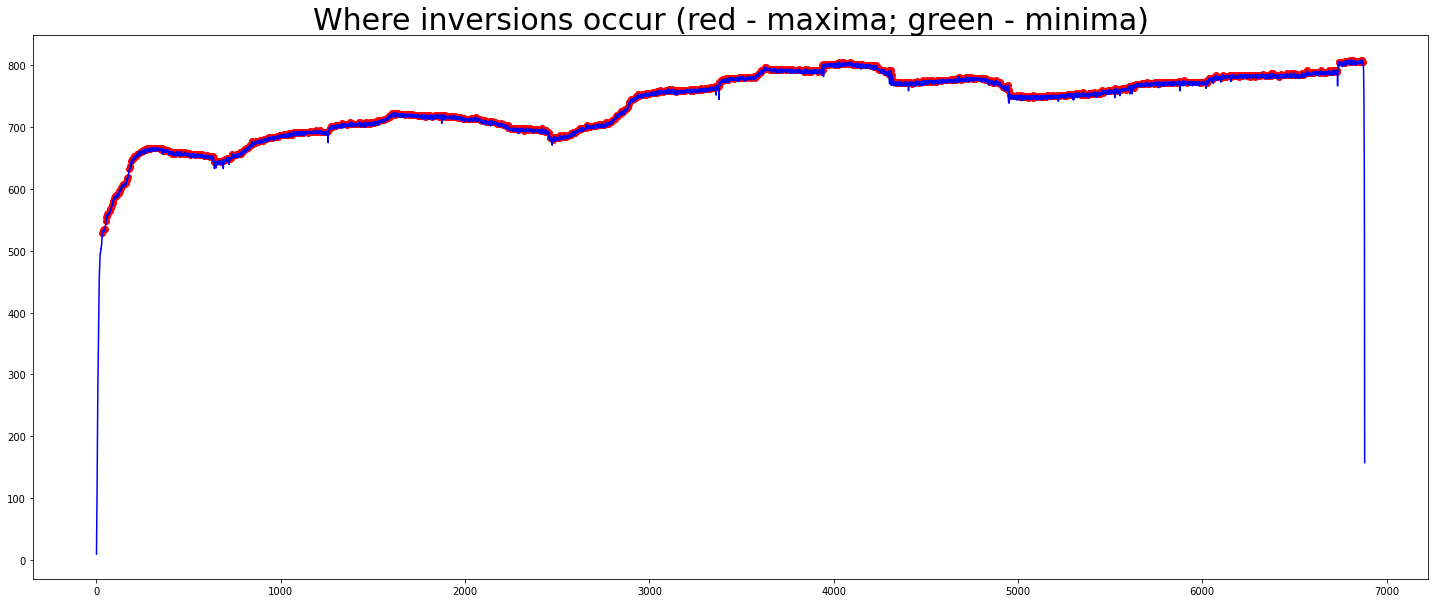

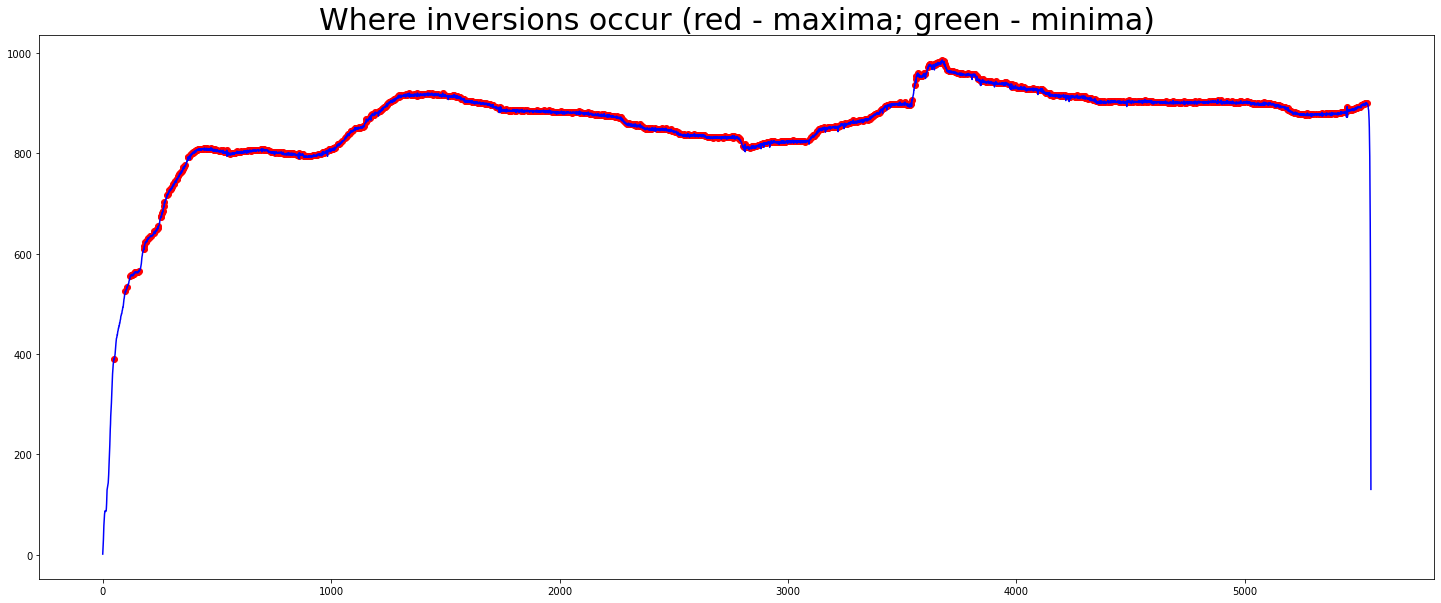

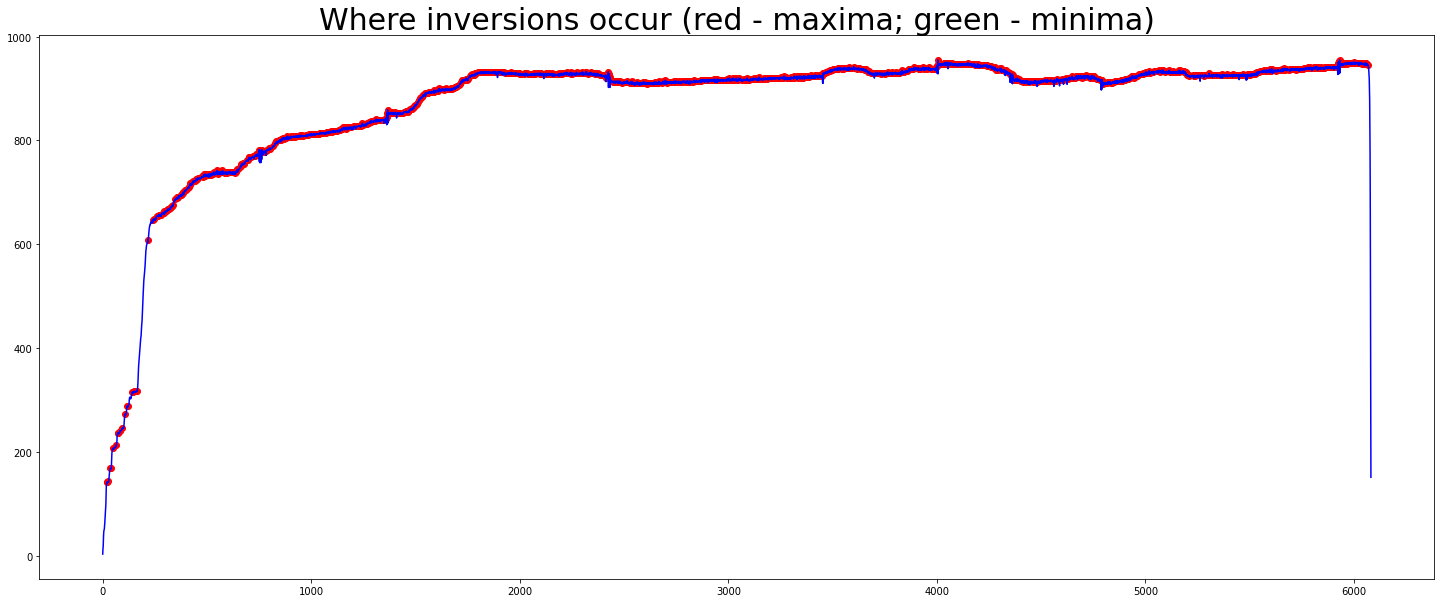

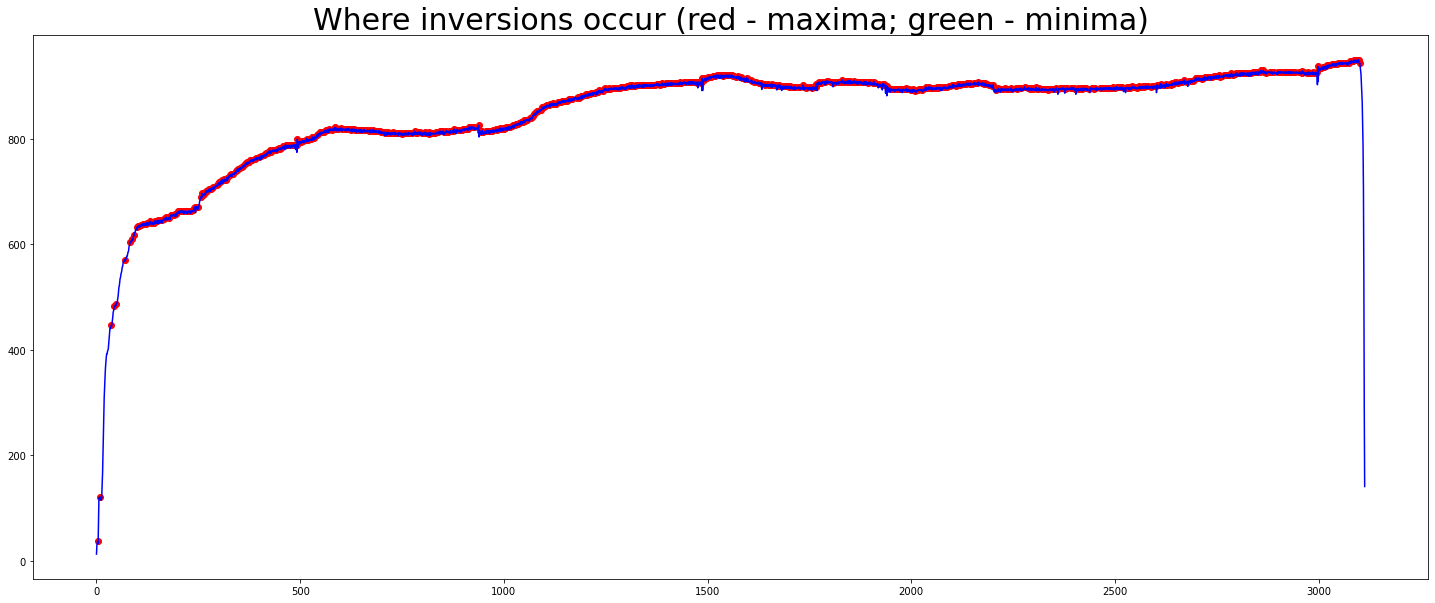

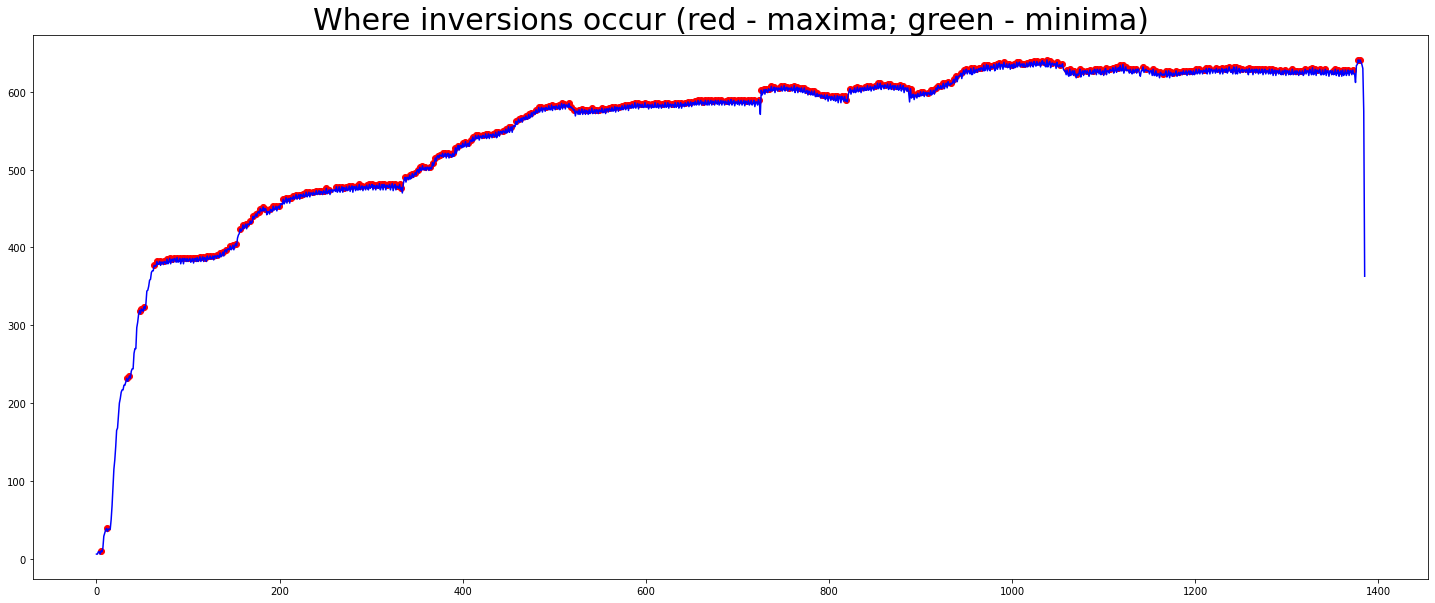

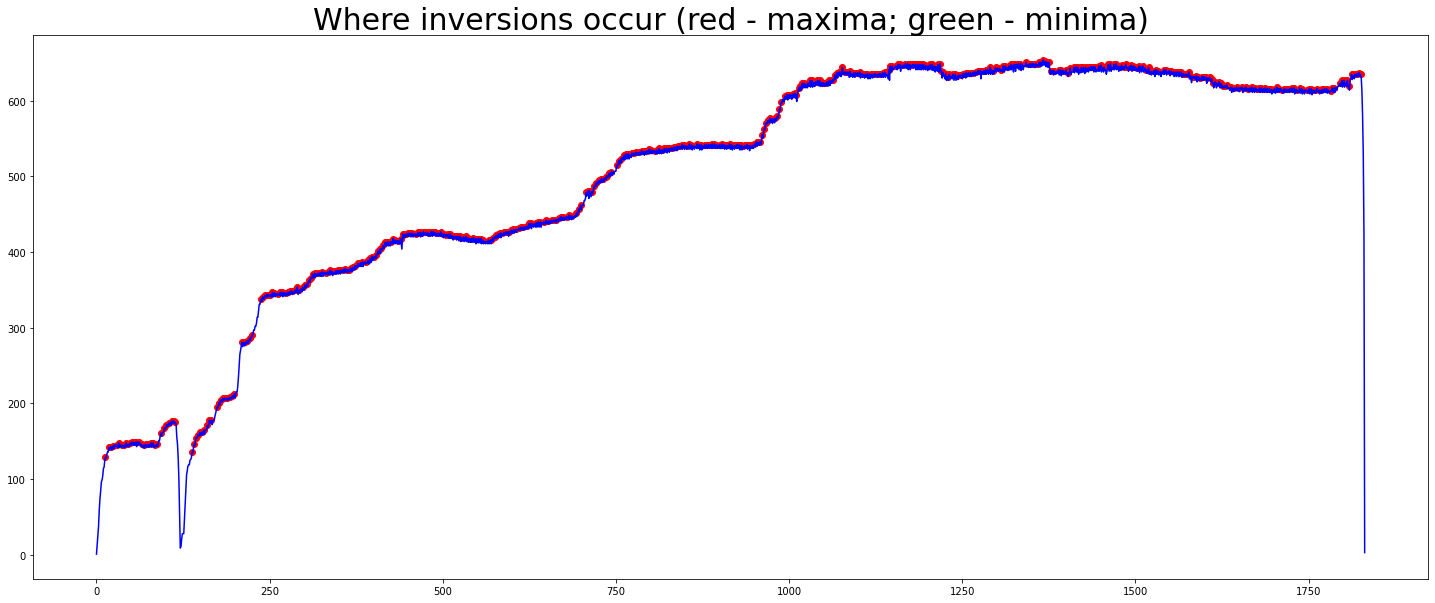

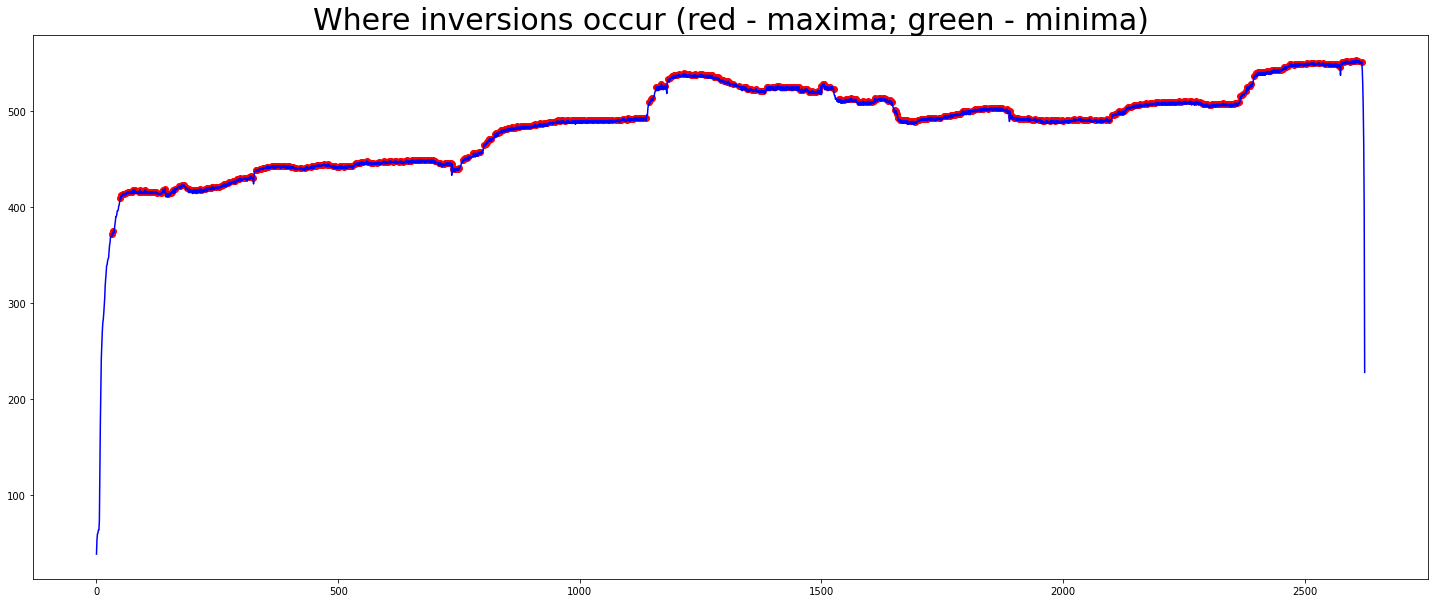

In [ ]:
extrema_length = []
extrema_rate = []
category = []
for filename in controlFiles: 
    df = pd.read_csv(filename, sep = ';', header = None)
    static_df, dynamic_df = staticDynamicSplit(df)
    static_pressure = static_df[3]
    dynamic_pressure = dynamic_df[3]
    static_time = static_df[5]

    static_maxima = argrelextrema(np.array(static_pressure), np.greater)
    # could be greater_equal
    extrema_length.append(len(static_maxima[0]))
    extrema_rate.append(len(static_maxima[0])/(max(static_time) - min(static_time)))
    category.append("Control")
    plt.figure(figsize = (25, 10))
    plt.plot(static_pressure, 'b')
    for i in static_maxima: 
        plt.scatter(i, static_pressure[i], marker = 'o', c = 'r')
    plt.title('Where inversions occur (red - maxima; green - minima)', fontsize = 30)
    print(len(static_maxima[0]))

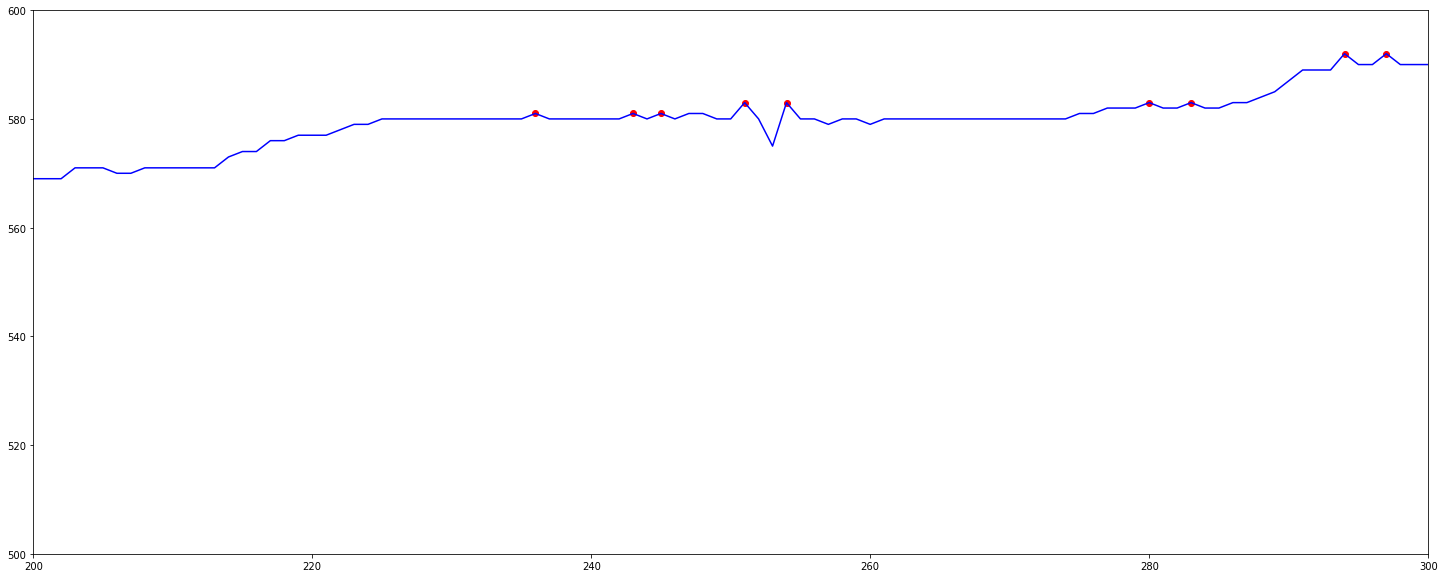

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/work/ParkinsonHW/H_p000-0018.txt', sep = ';', header = None)
static_df, dynamic_df = staticDynamicSplit(df)
static_pressure = static_df[3]
dynamic_pressure = dynamic_df[3]
static_time = static_df[5]

static_maxima = argrelextrema(np.array(static_pressure), np.greater)
'''
# could be greater_equal
extrema_length.append(len(static_maxima[0]))
extrema_rate.append(len(static_maxima[0])/(max(static_time) - min(static_time)))
category.append("Patient")
'''
plt.figure(figsize = (25, 10))
plt.plot(static_pressure, 'b')
plt.xlim(200, 300)
plt.ylim(500, 600)
for i in static_maxima: 
    plt.scatter(i, static_pressure[i], marker = 'o', c = 'r')

382
312
726
943
452
227
294
49
311
149
1225
213
352
151
379
180
827
296
172
715
253
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
950
275
312
45
207
247
156
251
246
451
190
1950
951
225
528
62
348
79
138
215
2065
667
807
246
106
363
756
203
950
157
2328
888
1236
557
54
180
385
944
959
194


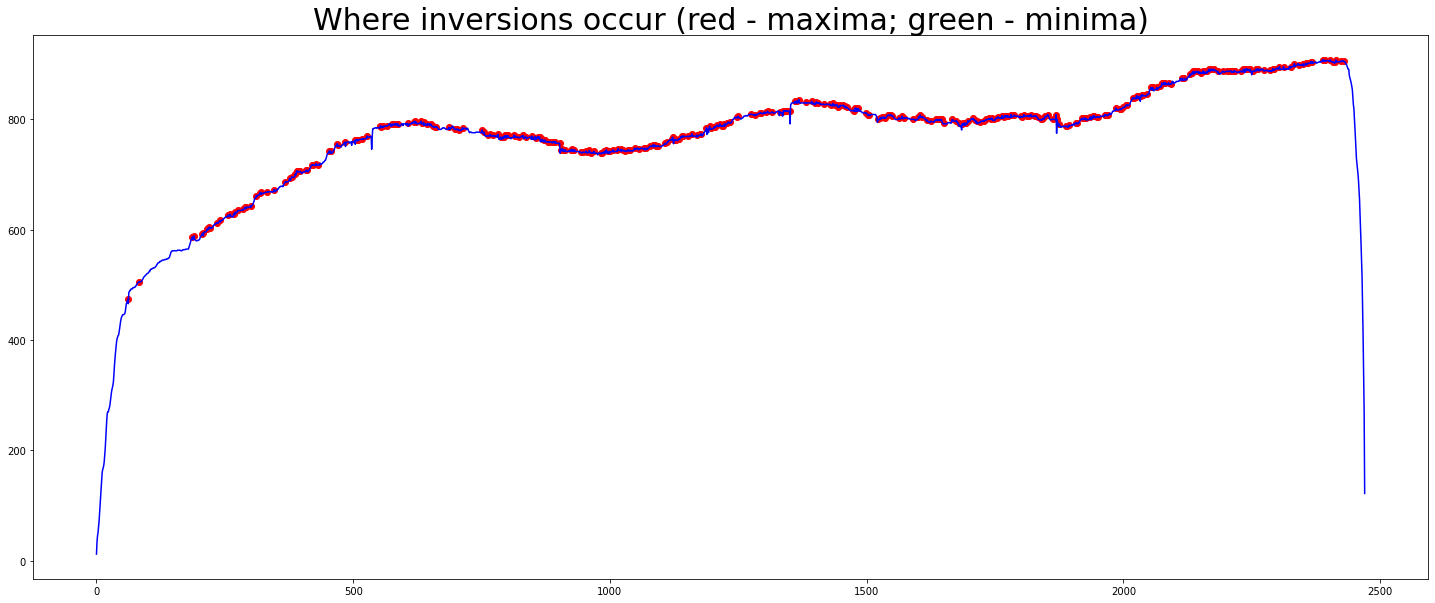

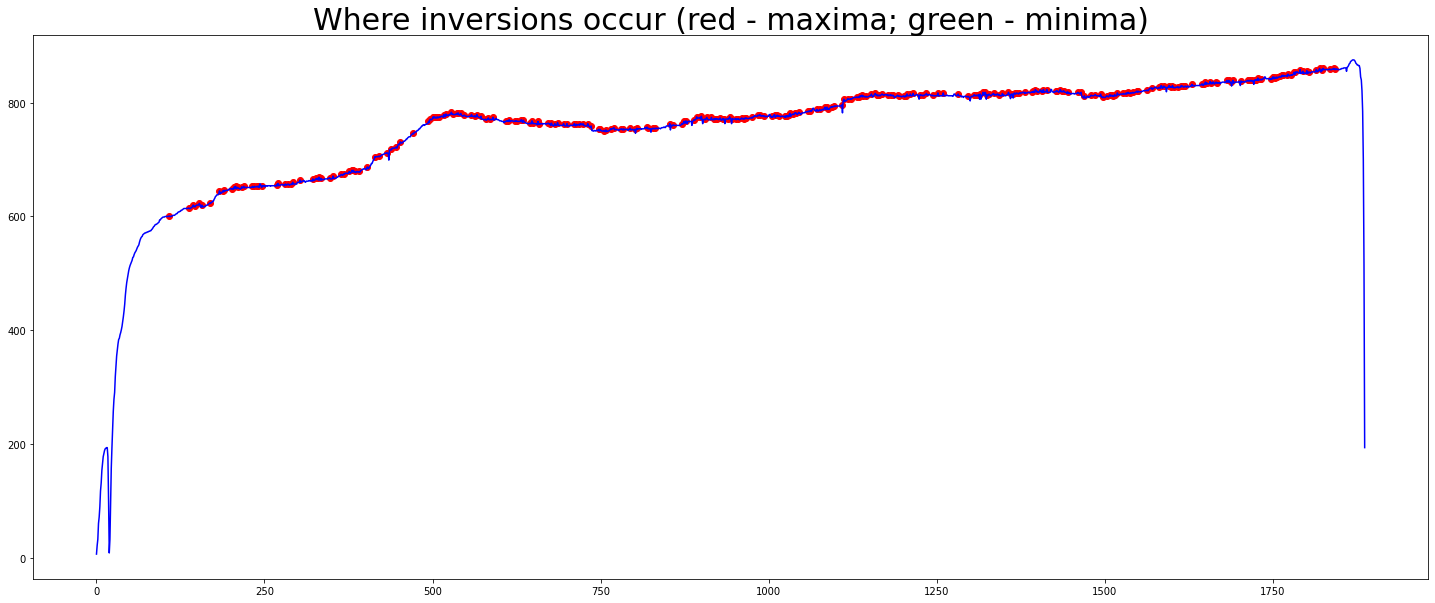

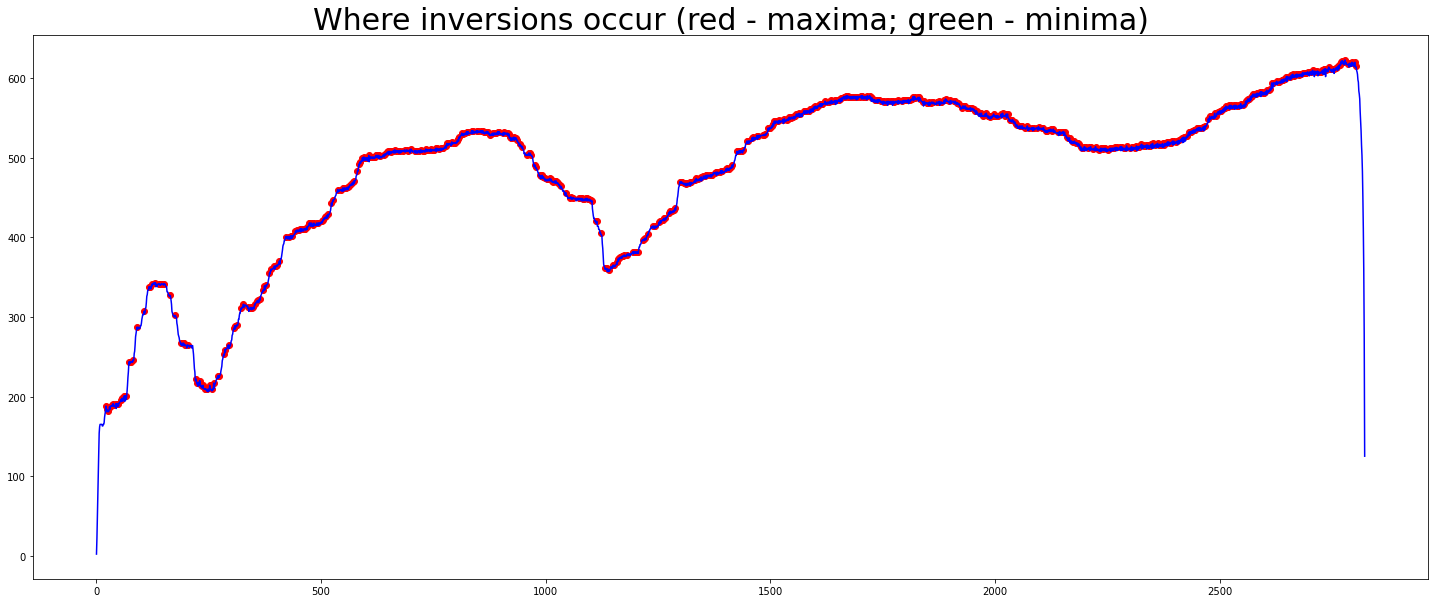

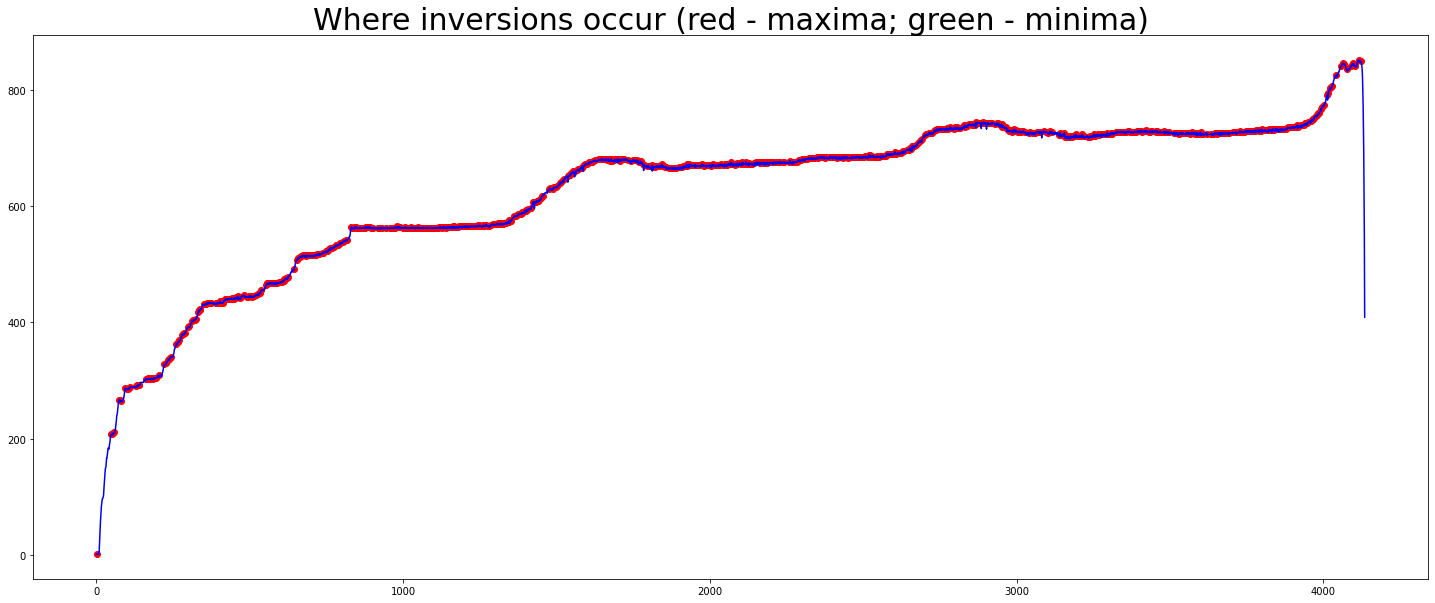

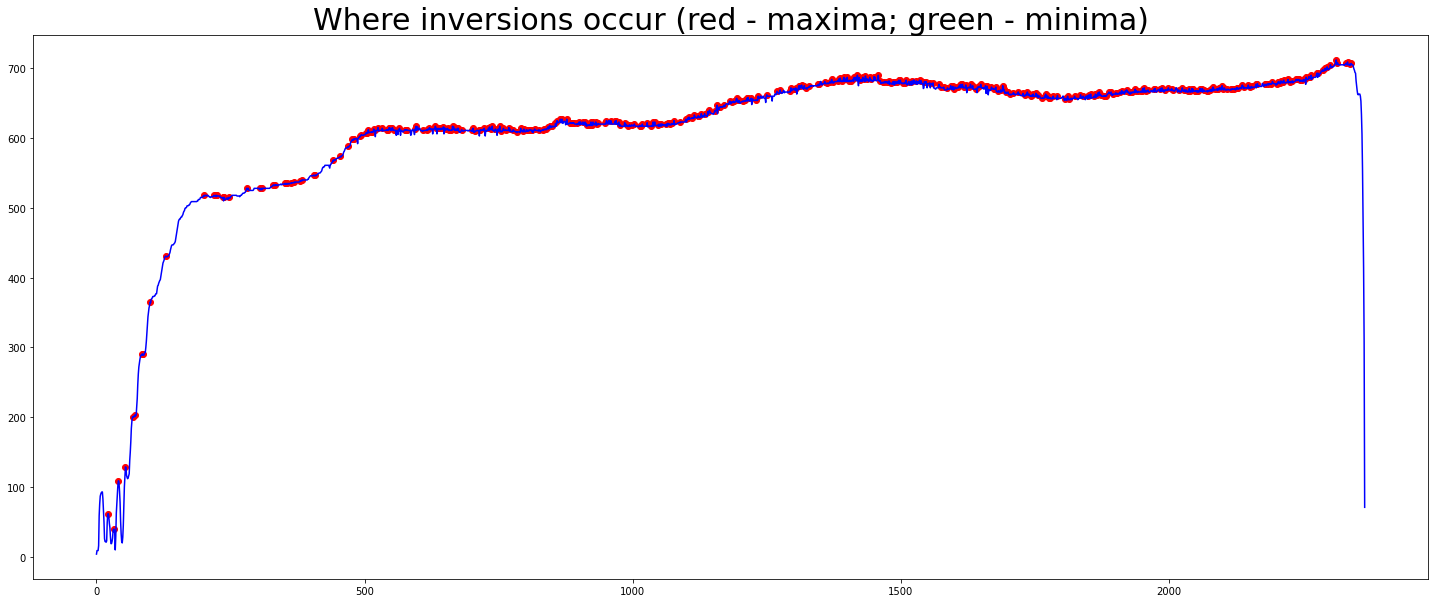

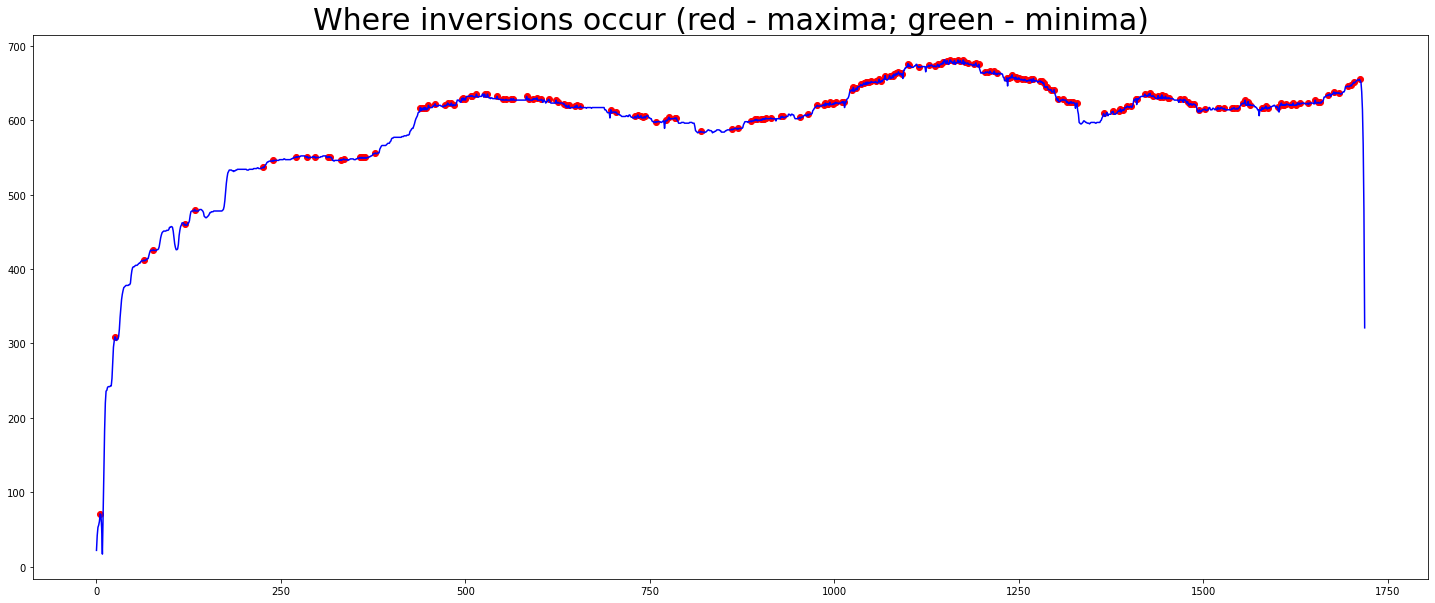

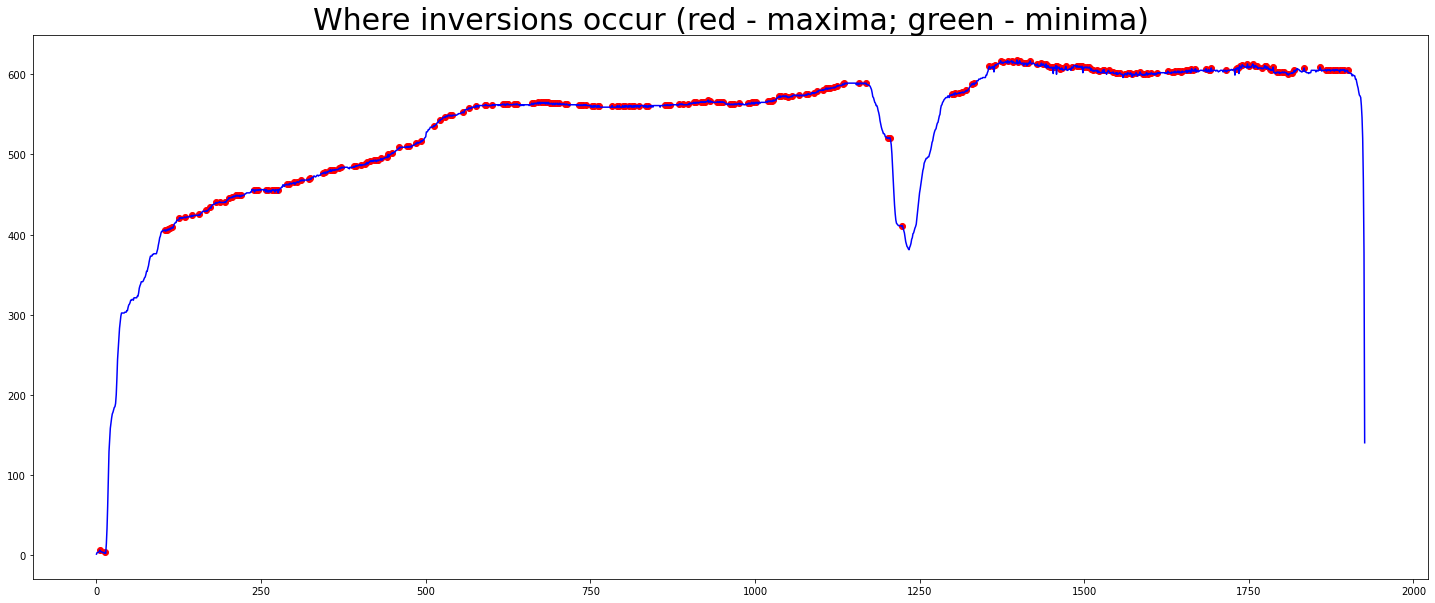

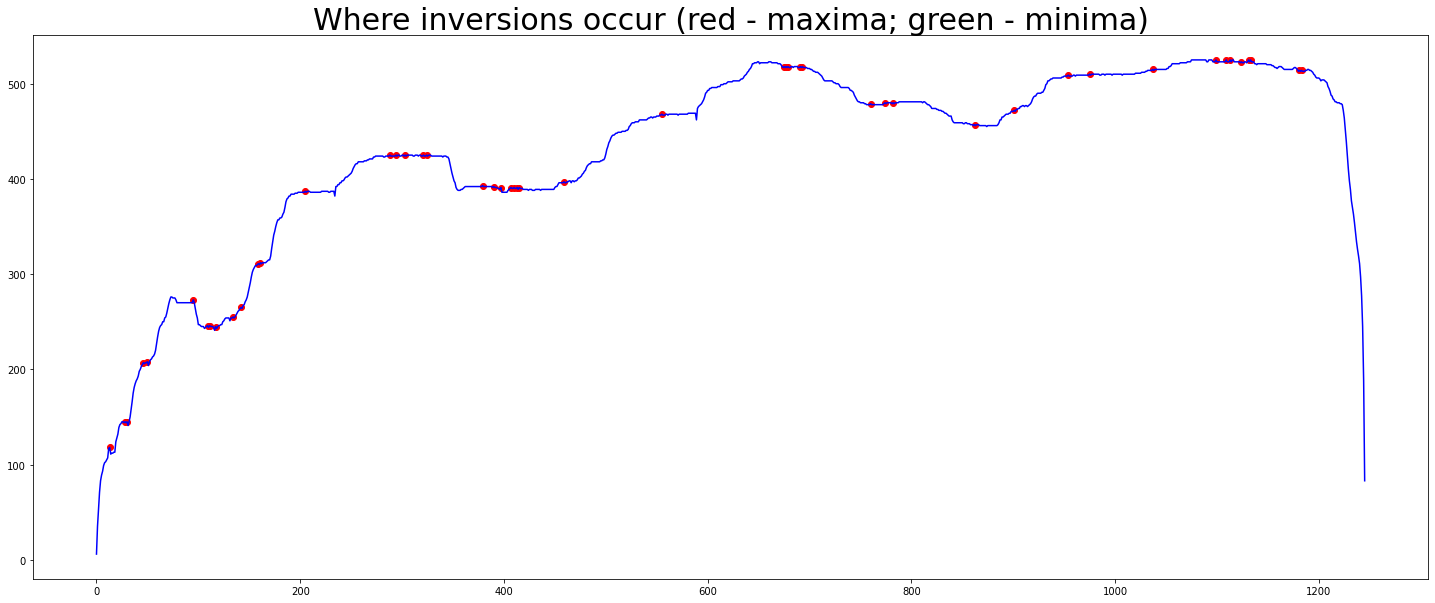

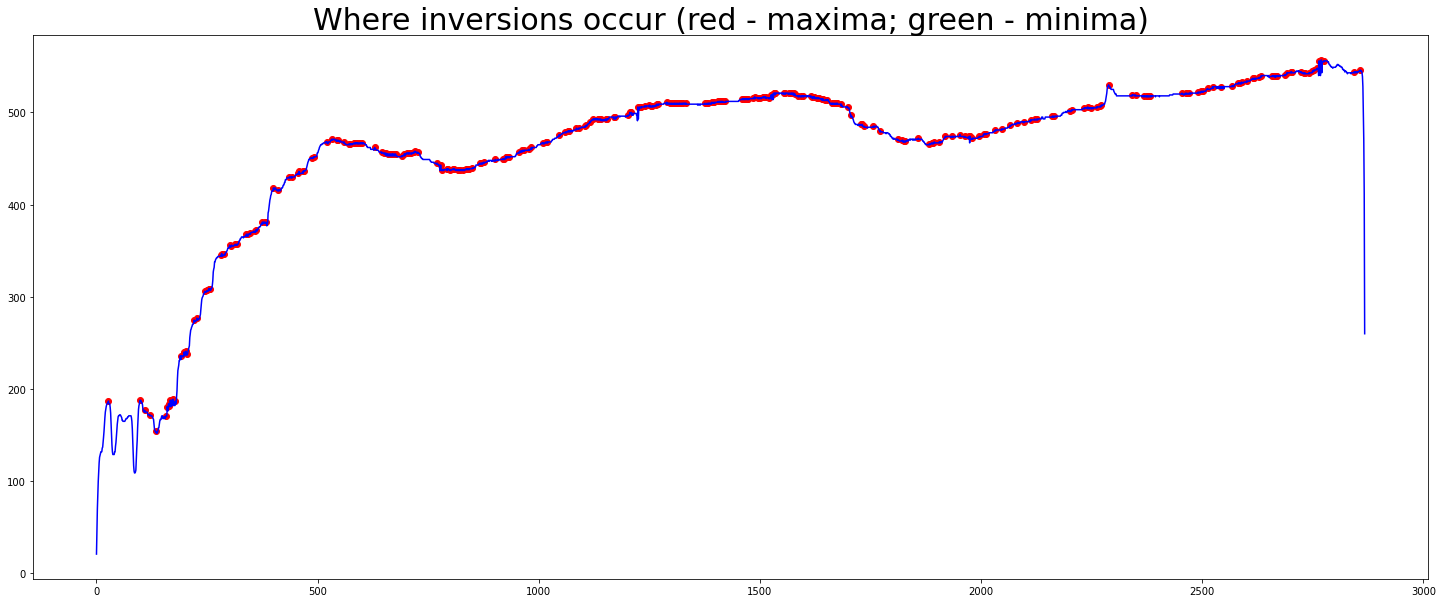

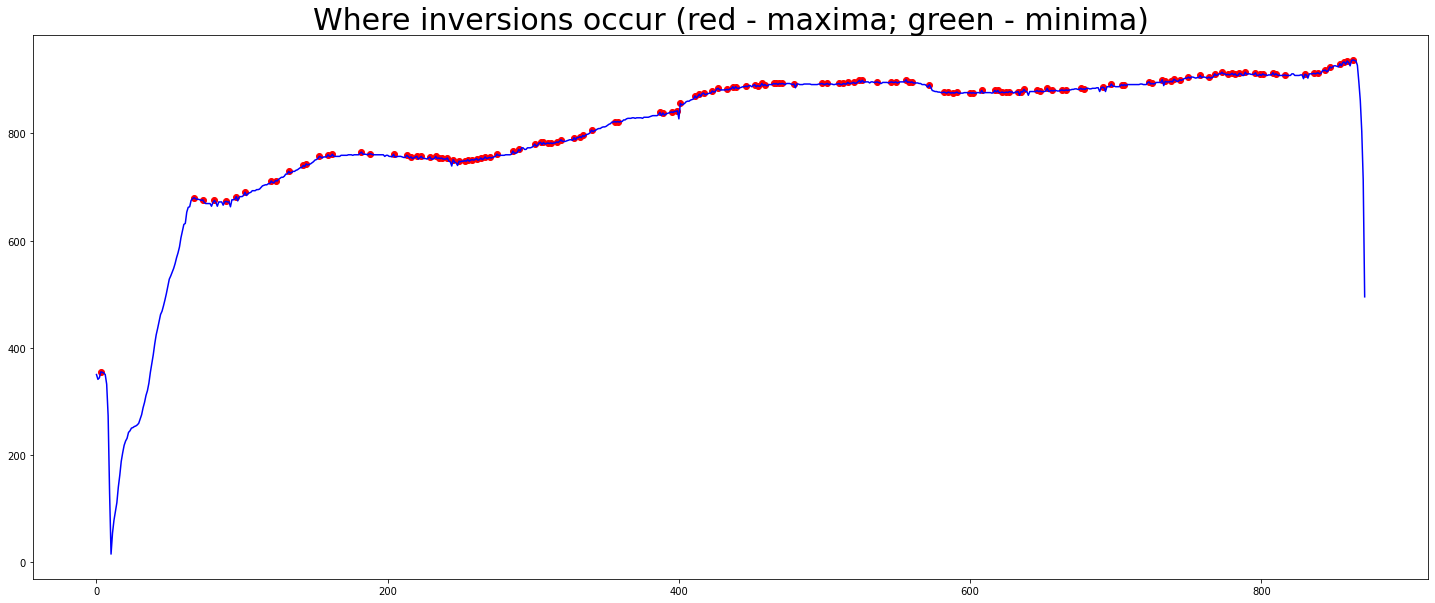

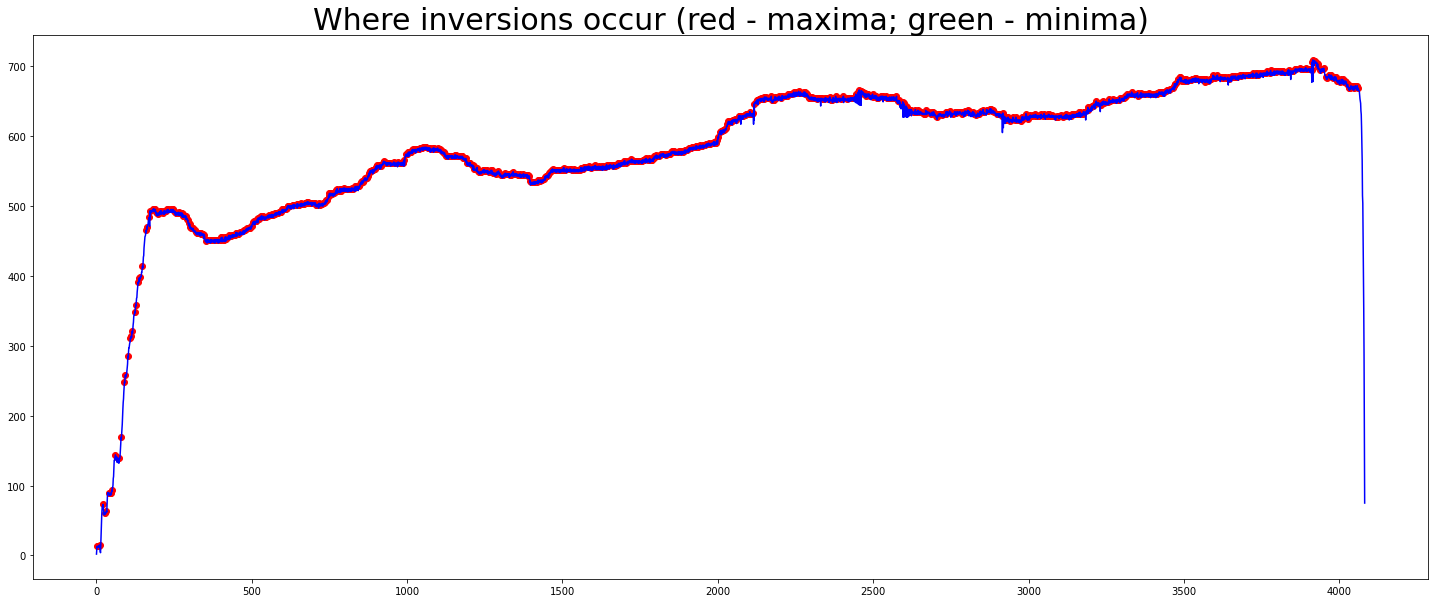

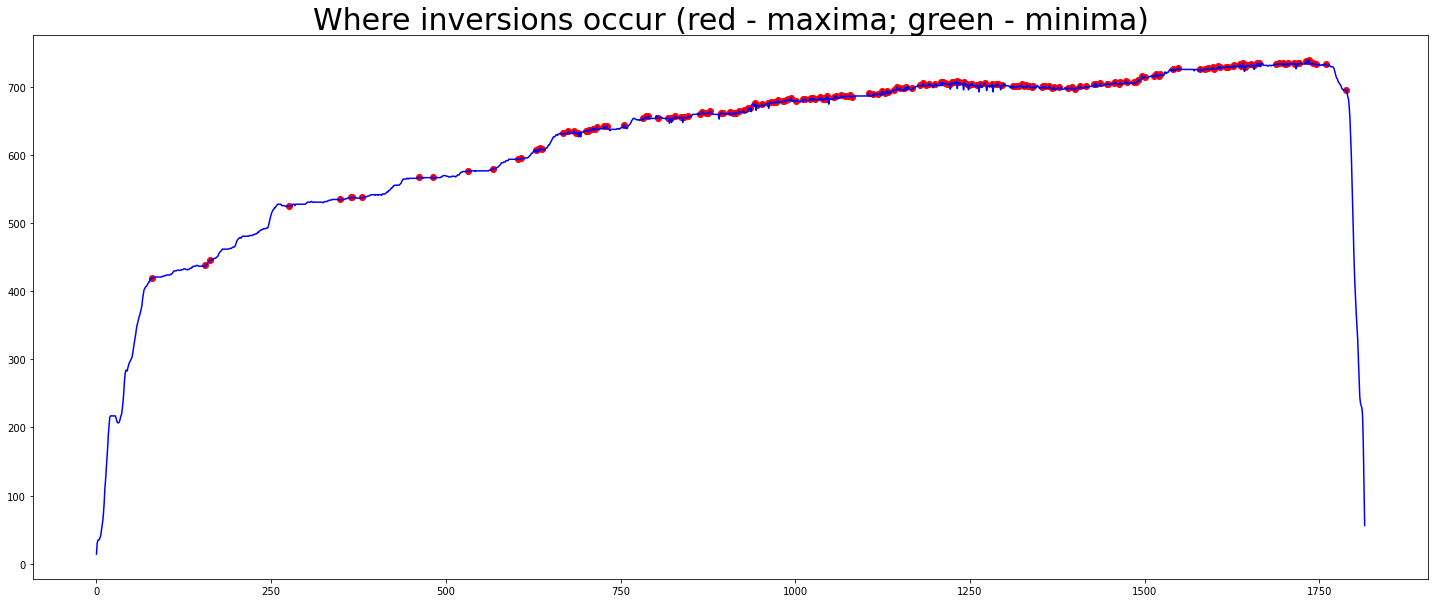

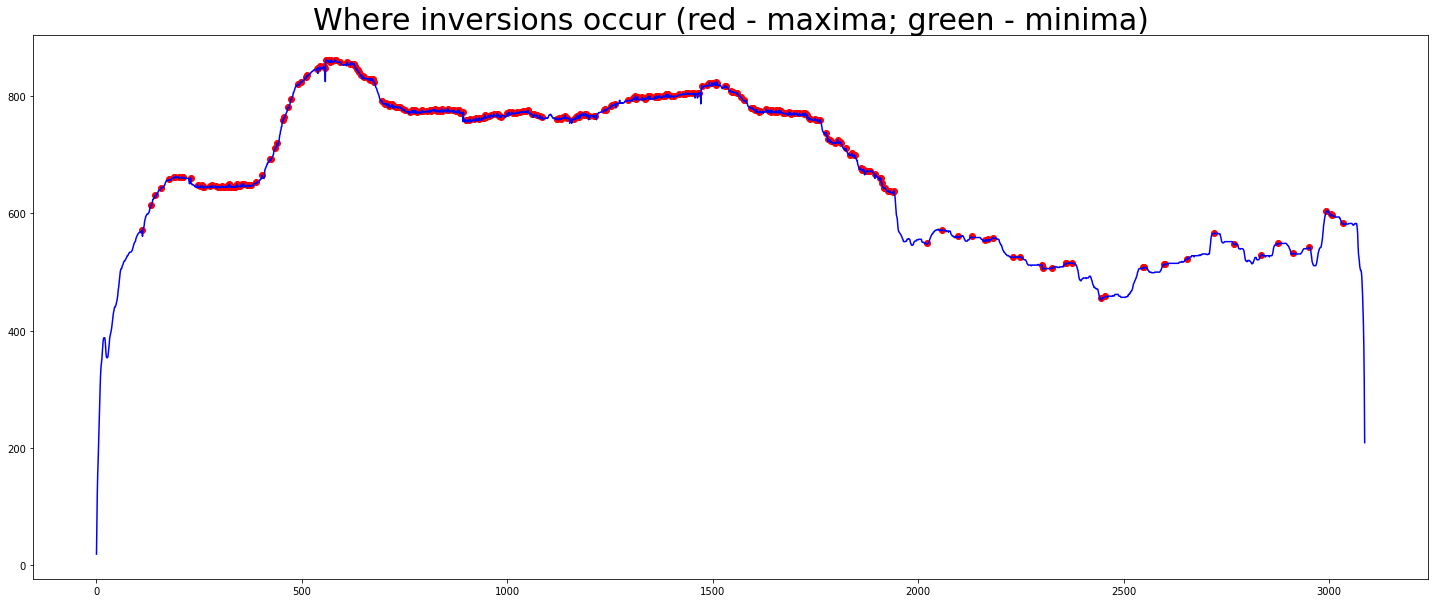

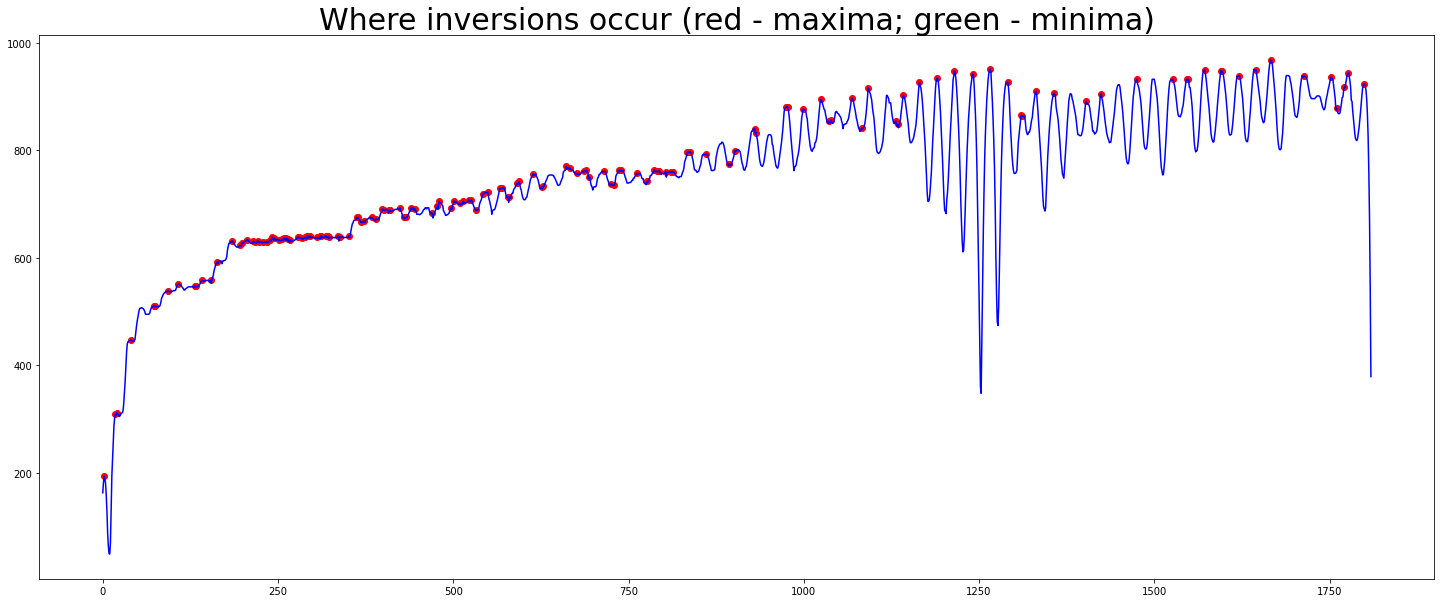

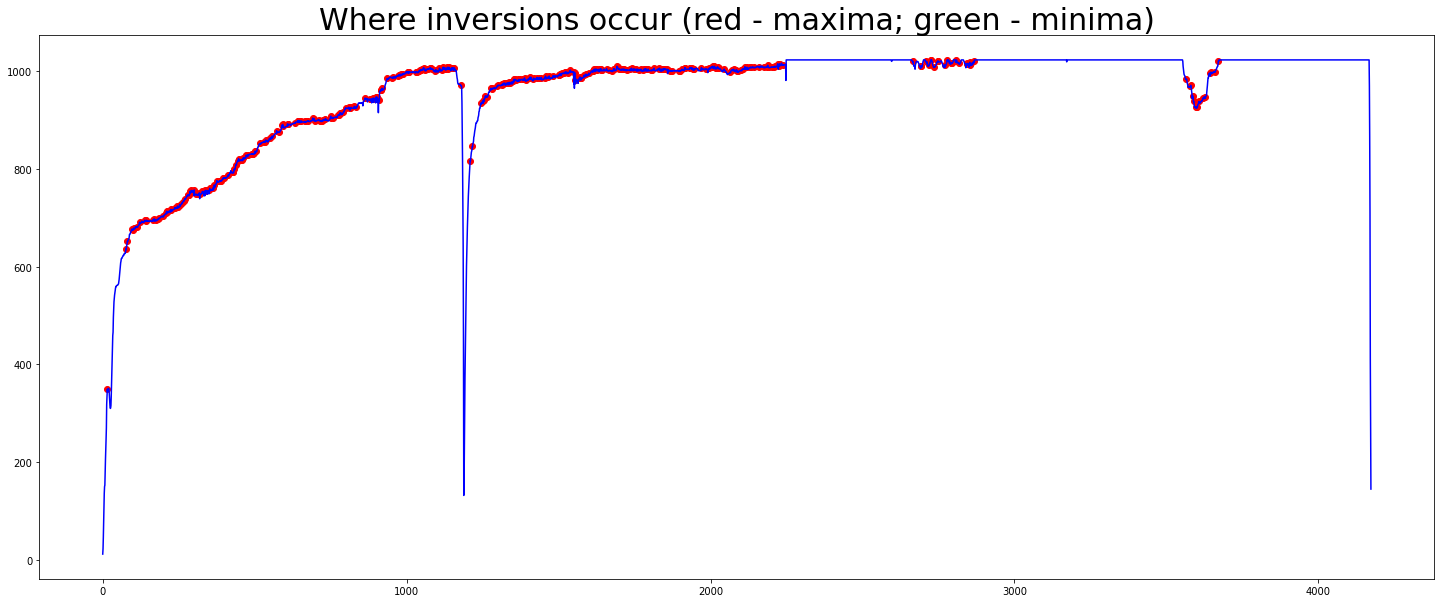

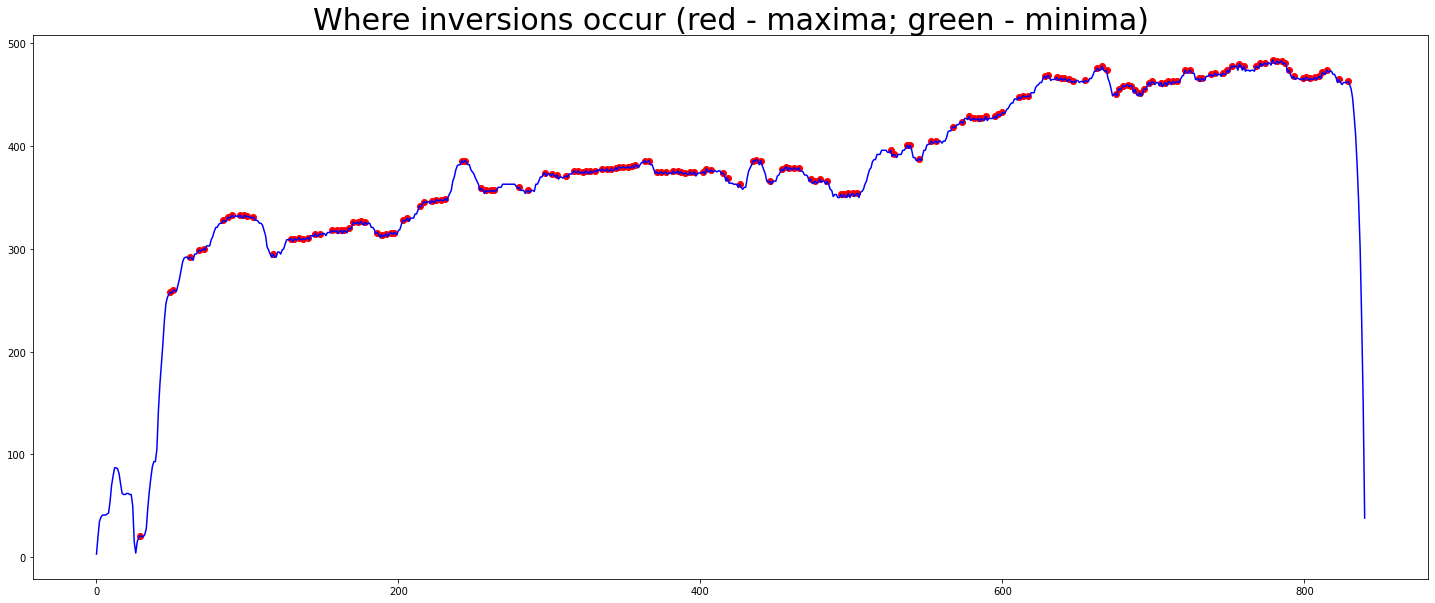

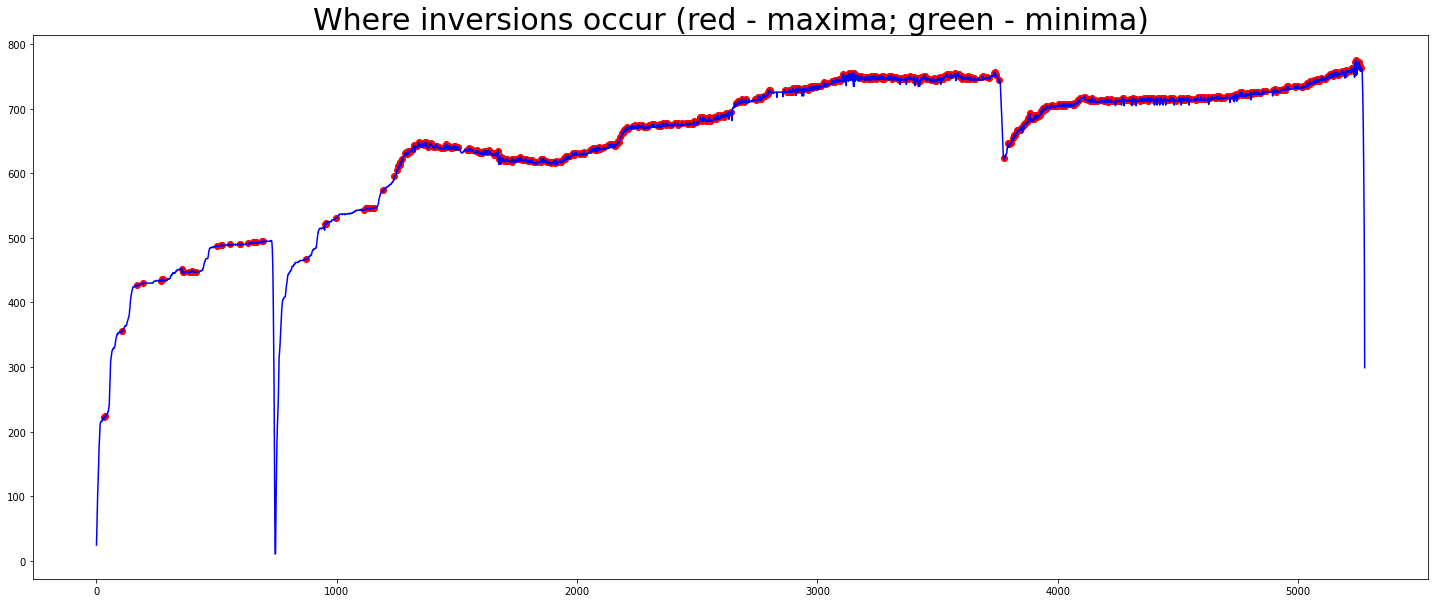

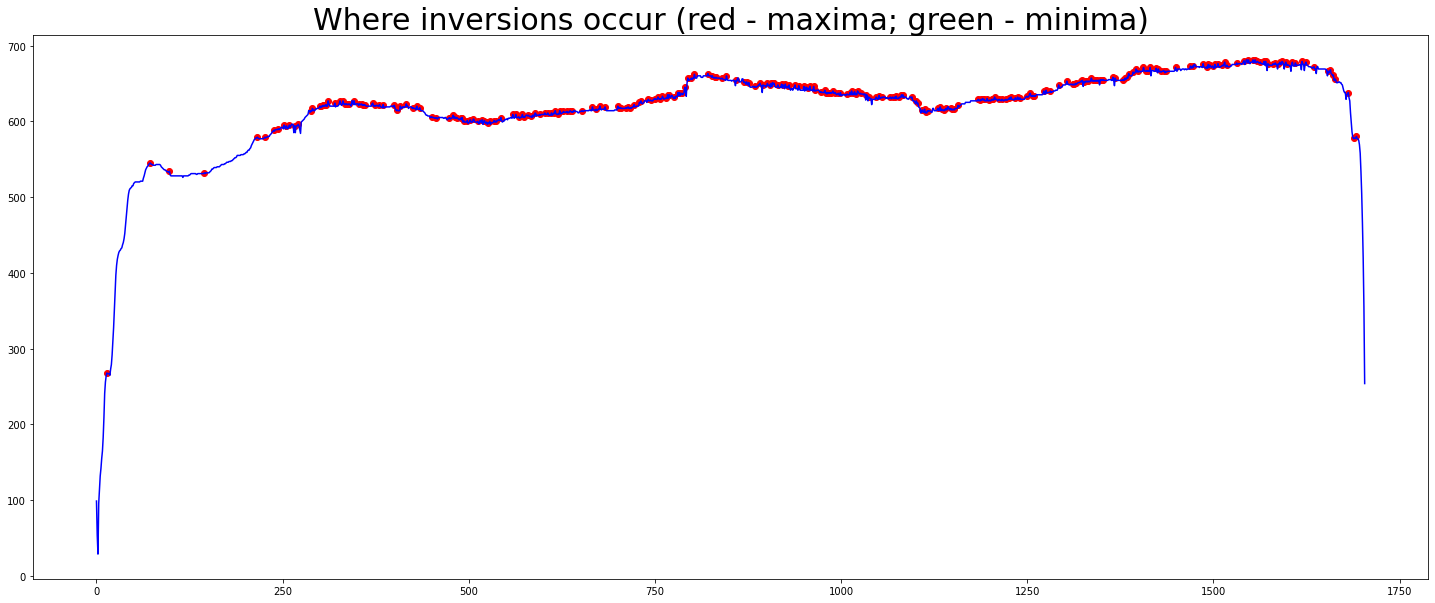

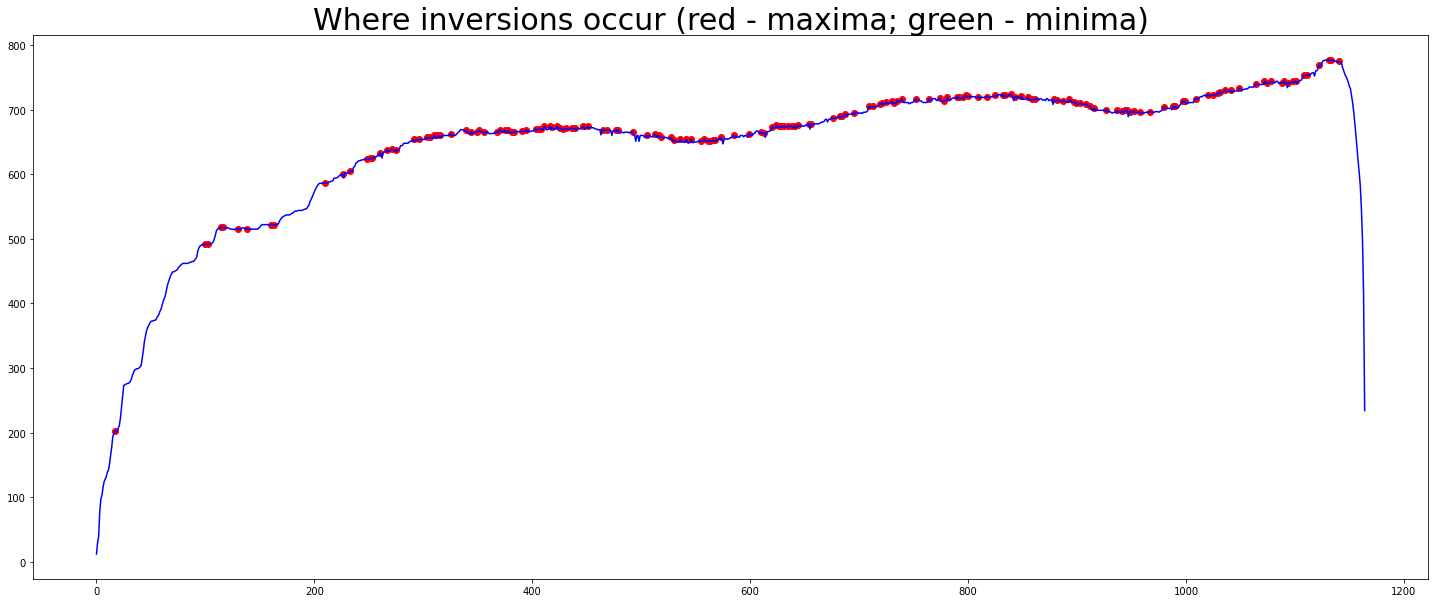

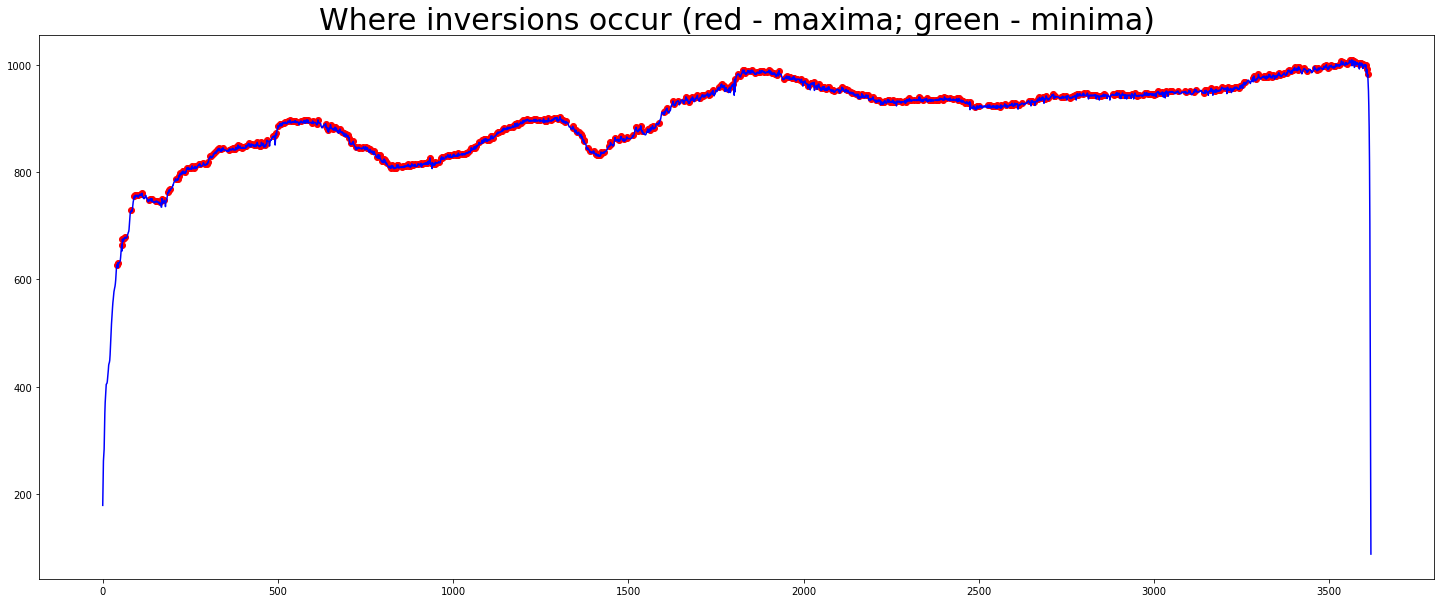

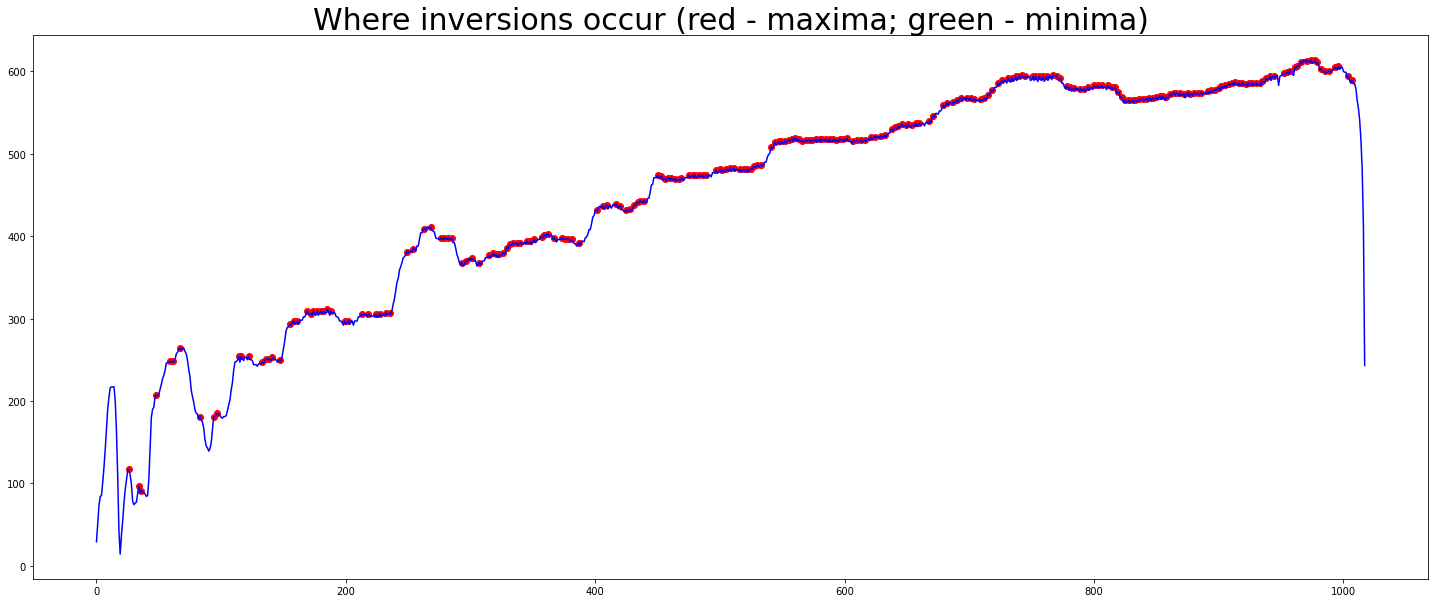

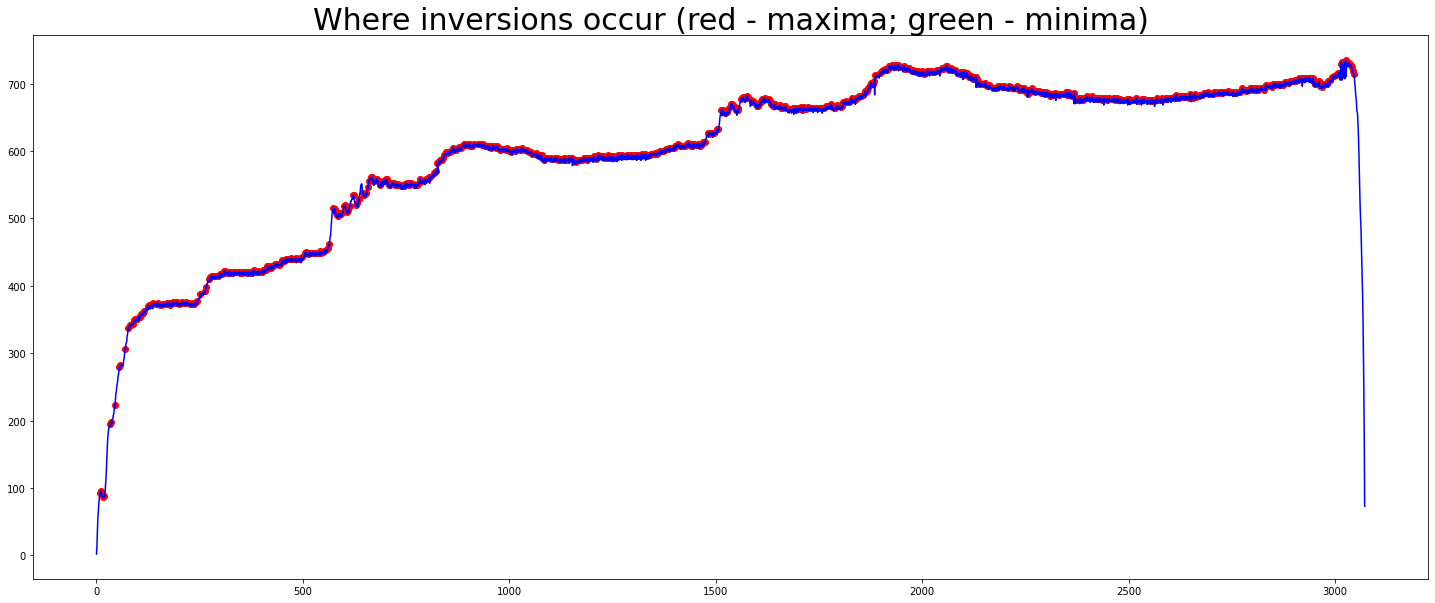

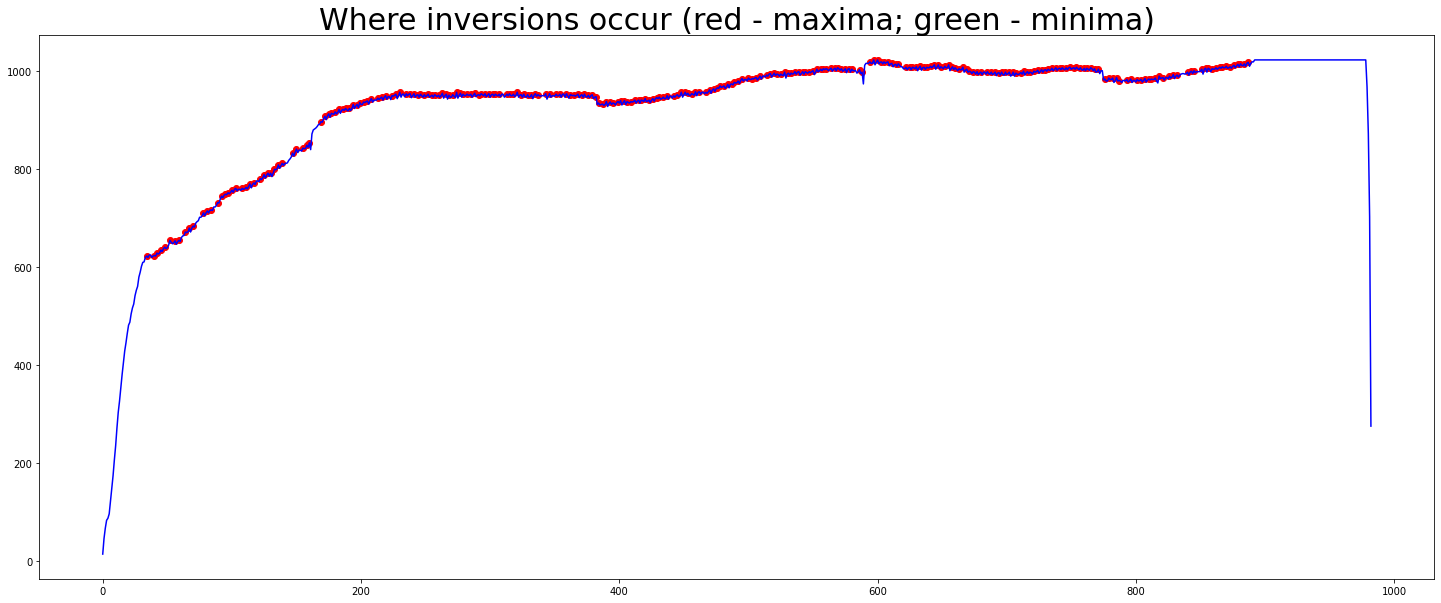

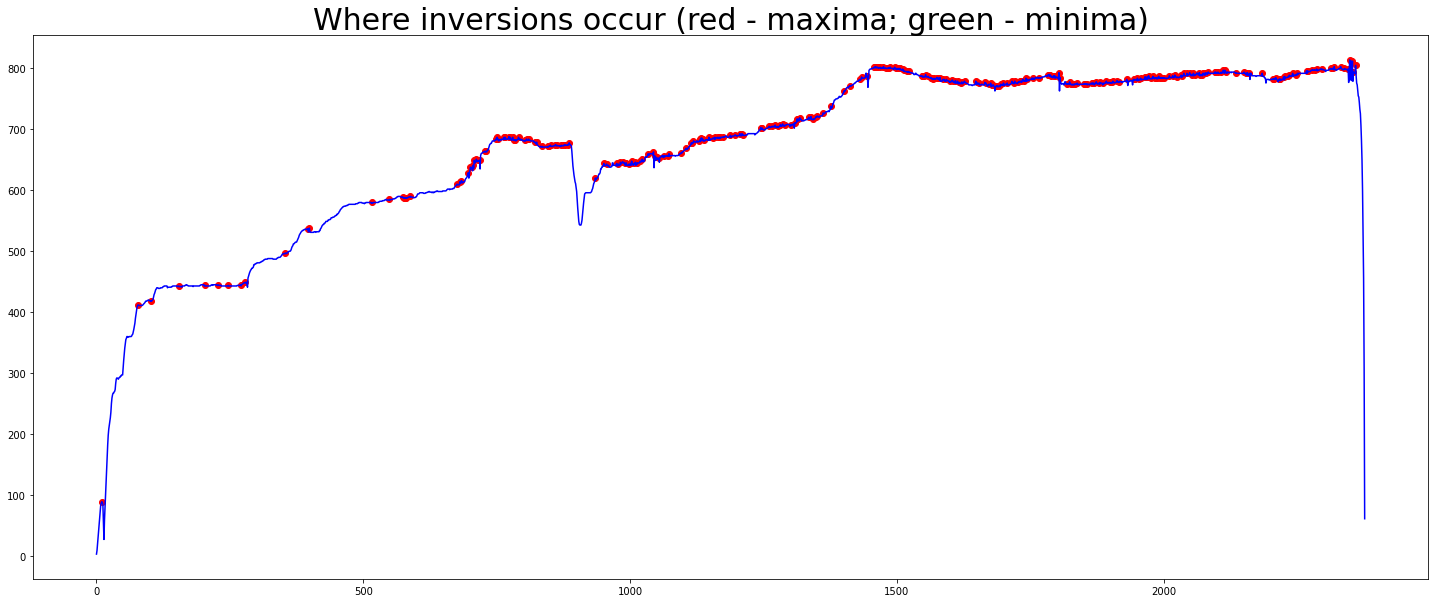

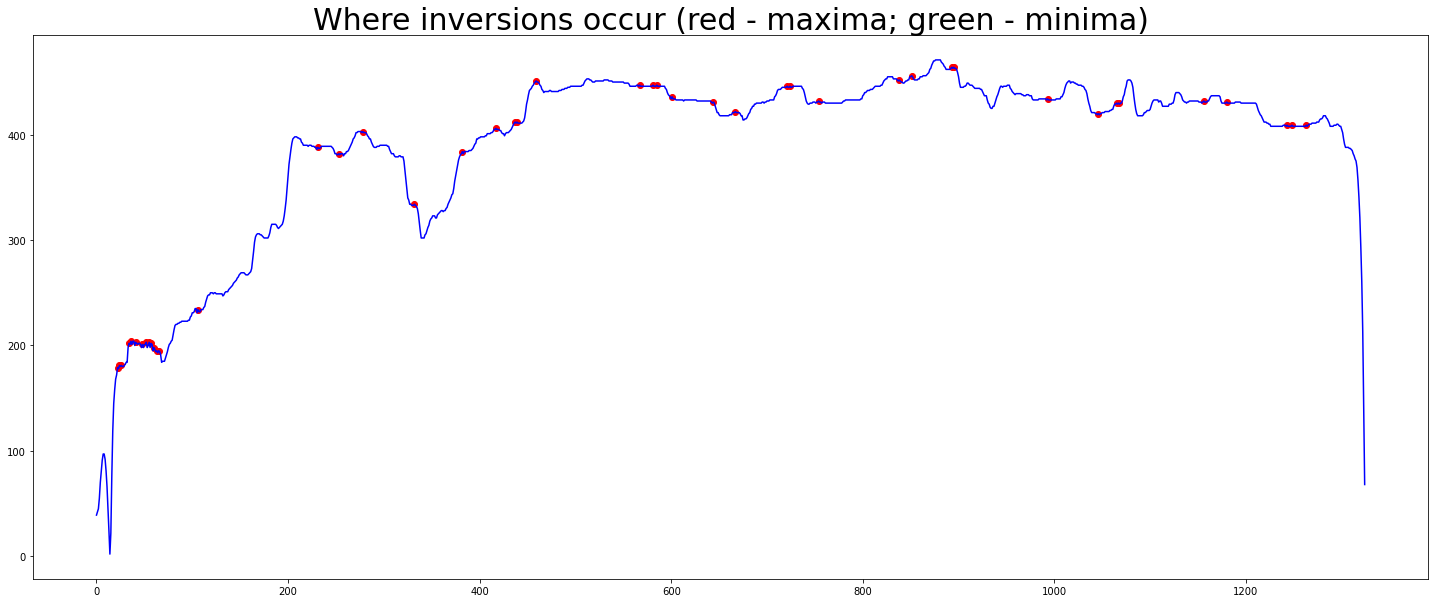

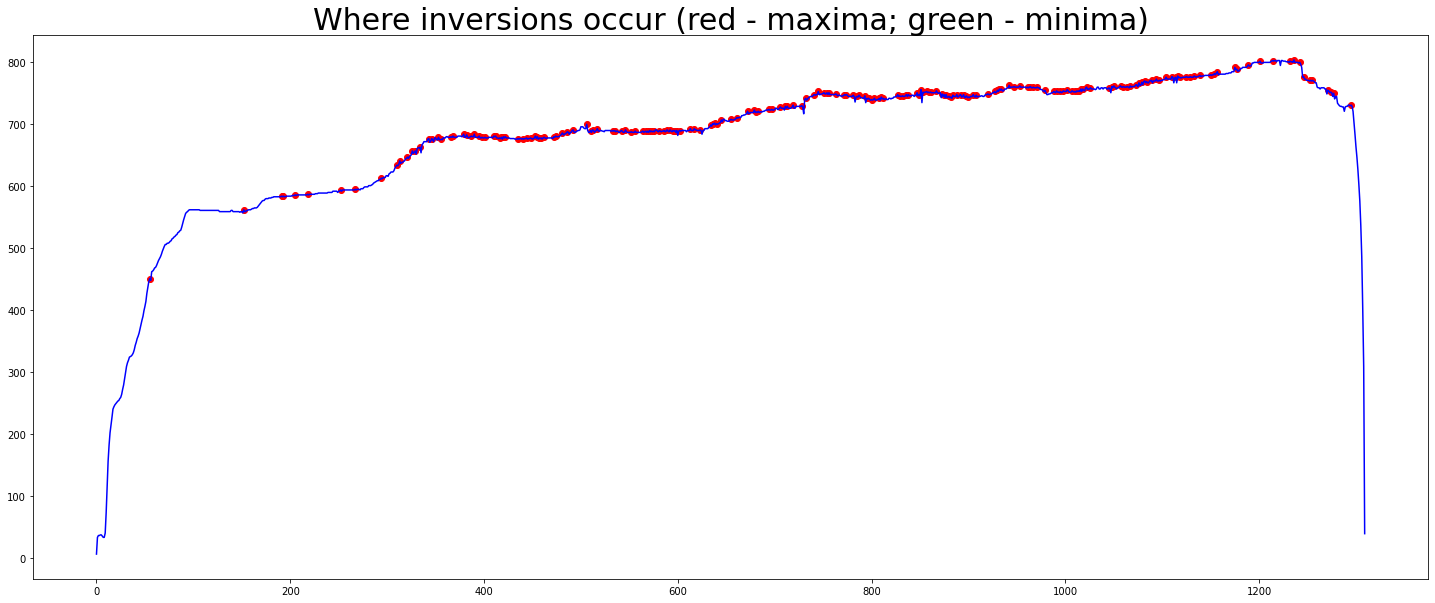

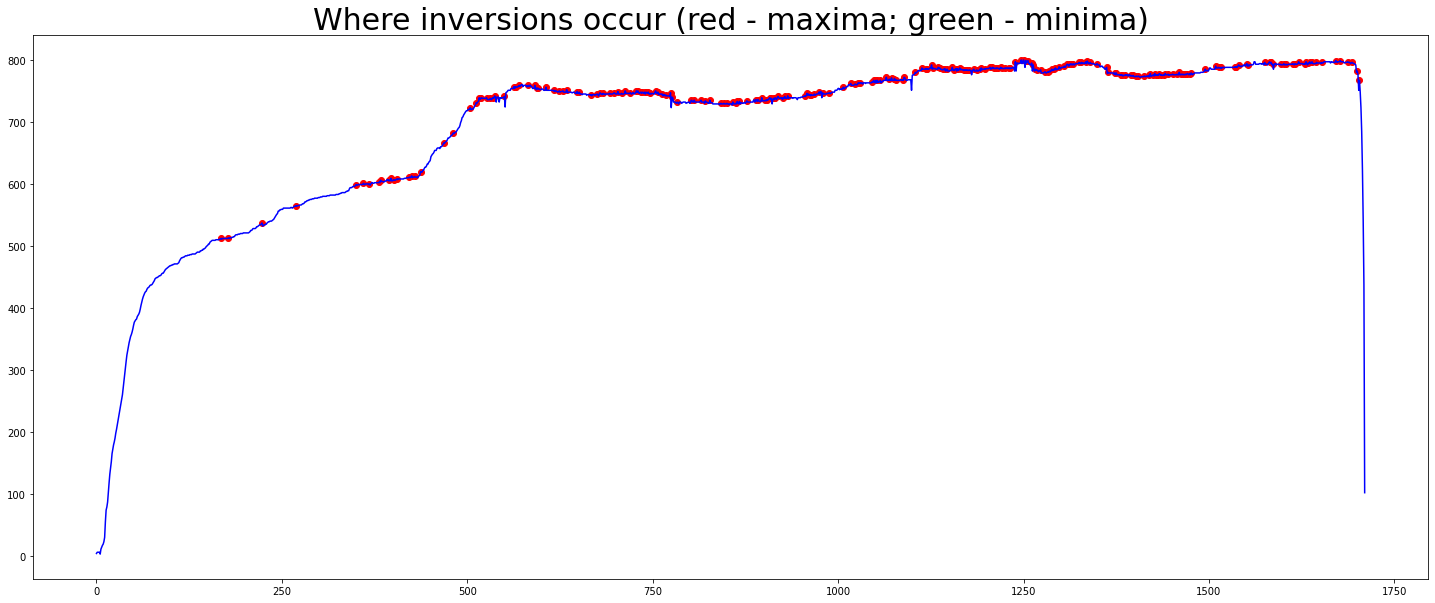

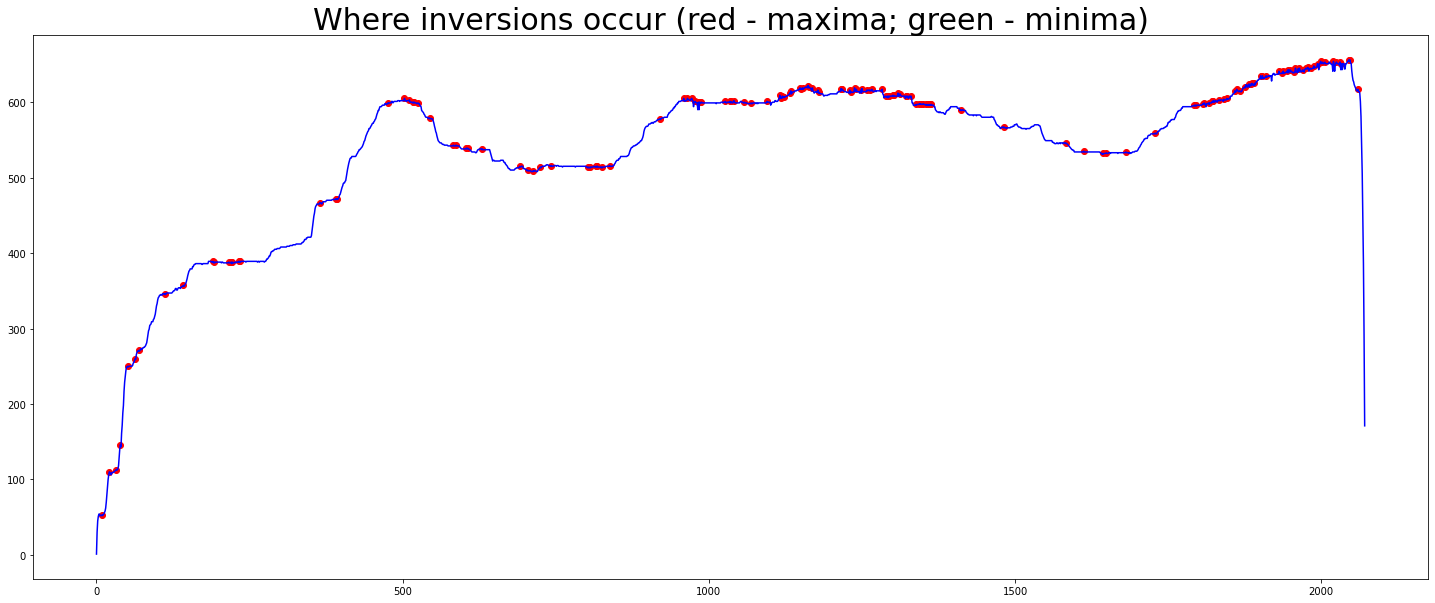

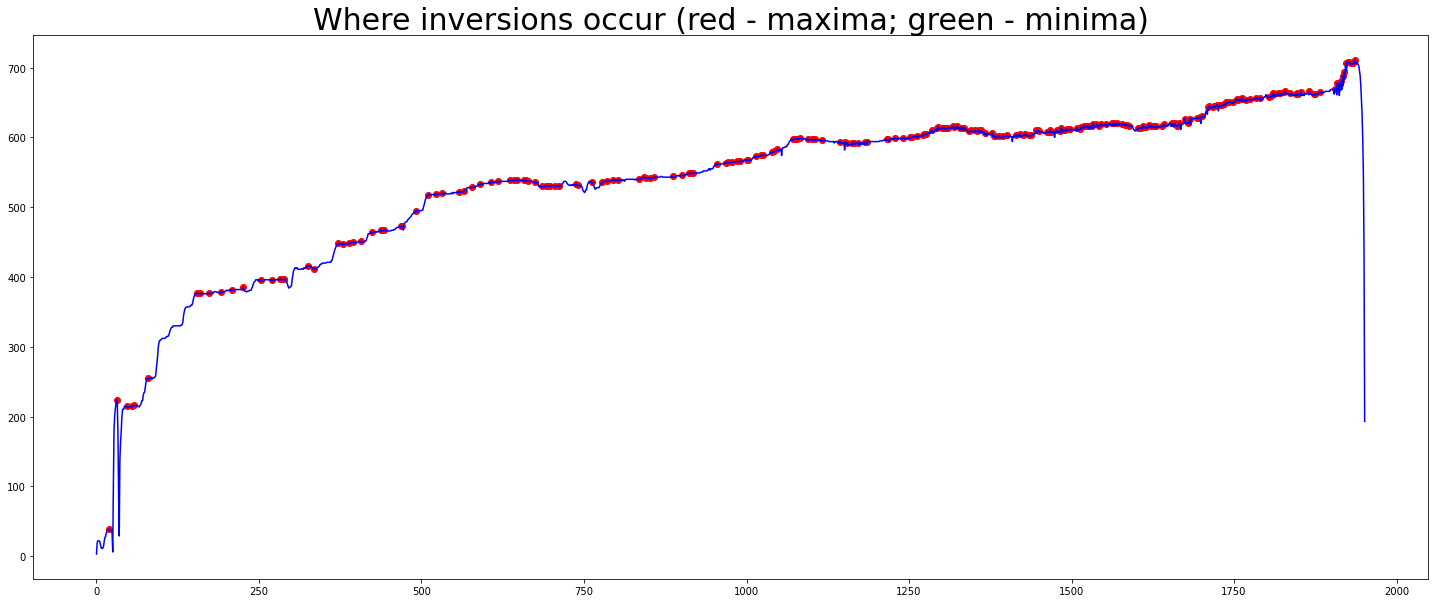

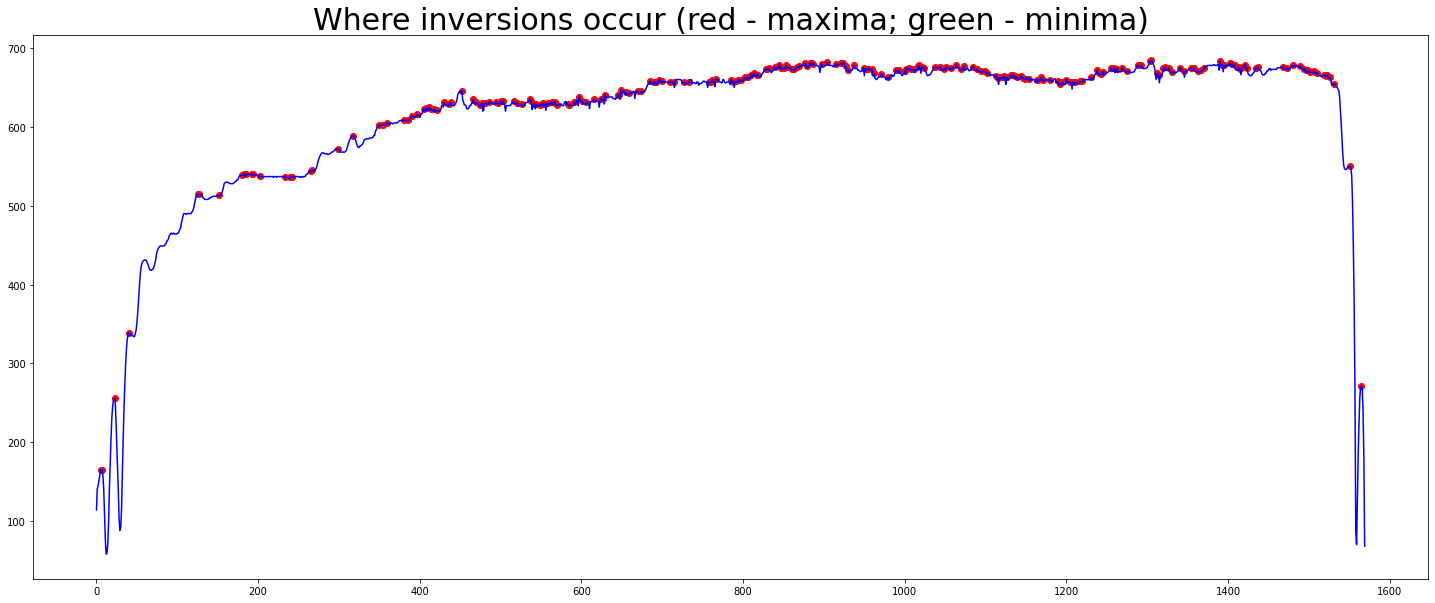

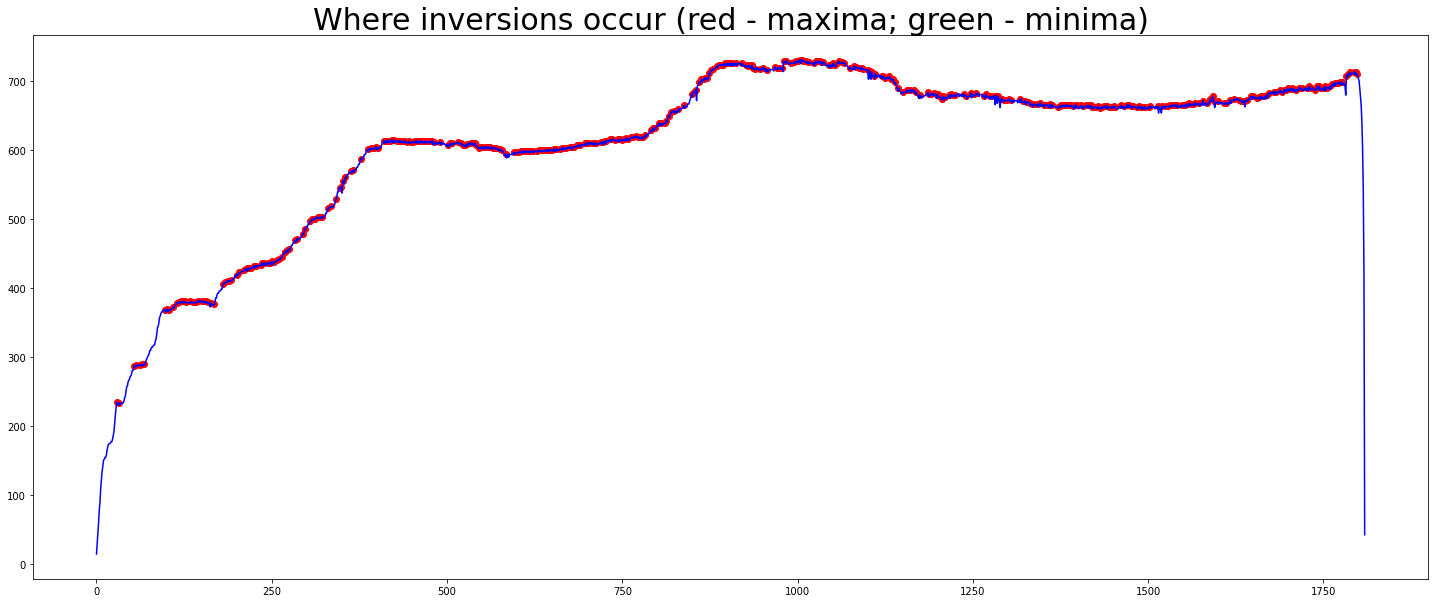

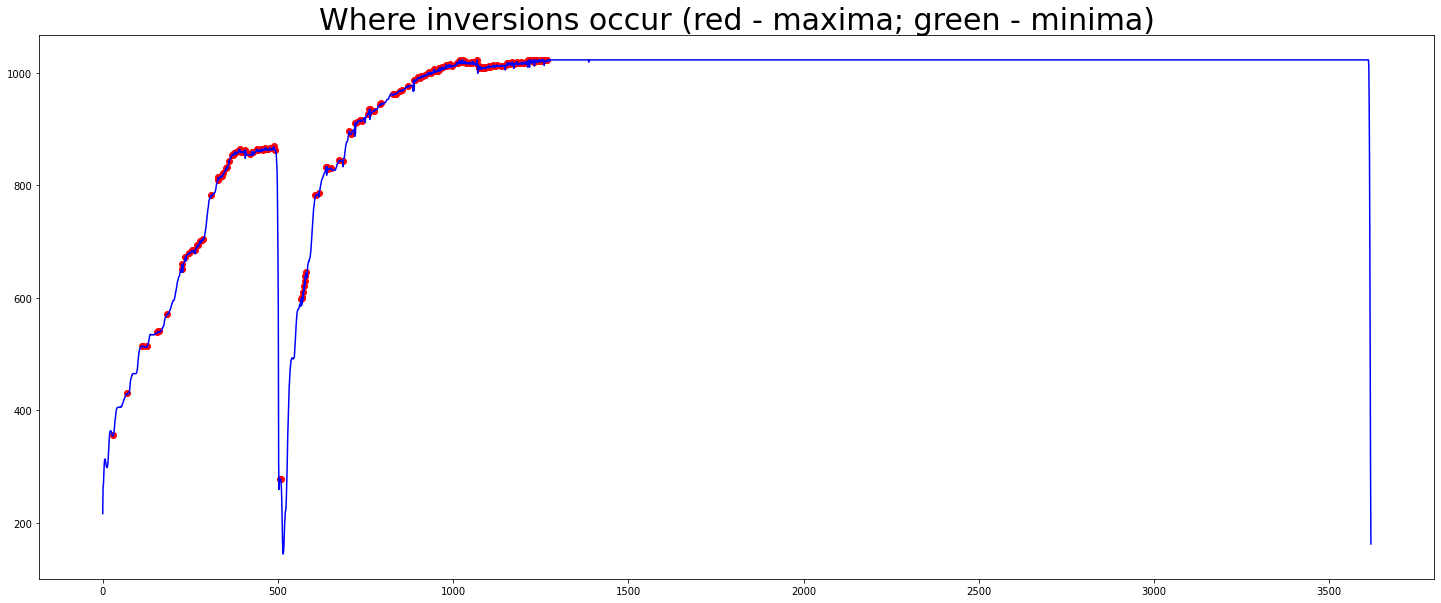

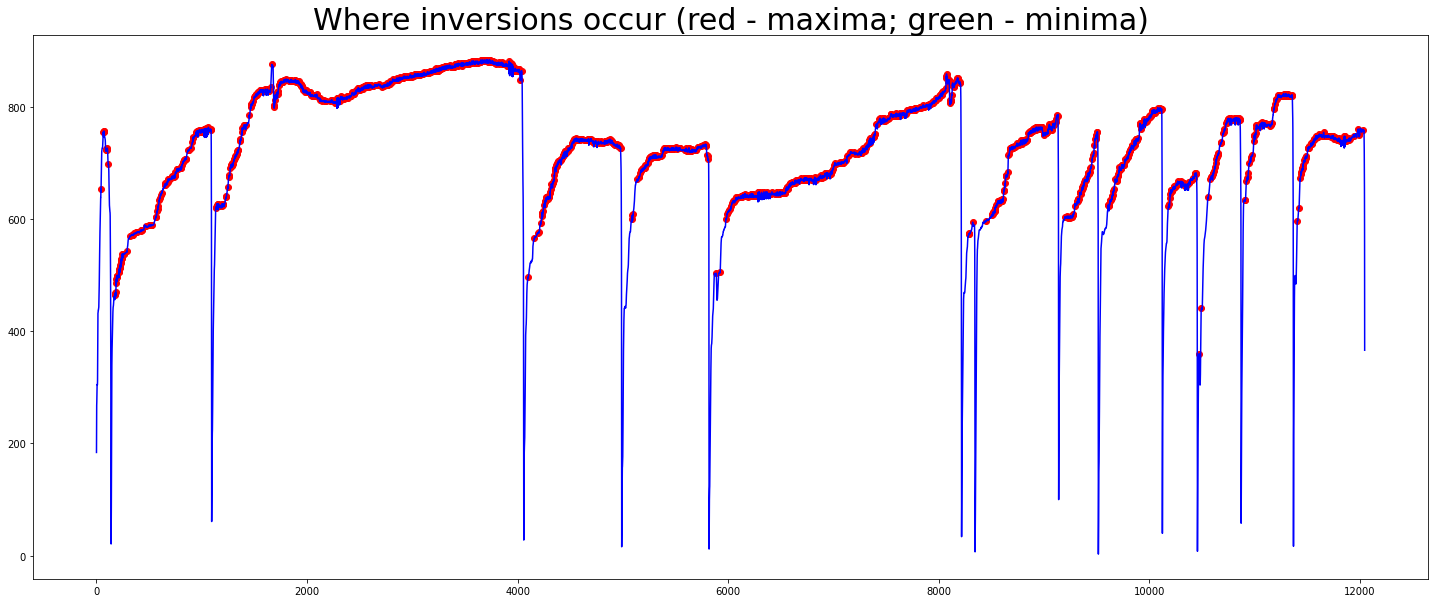

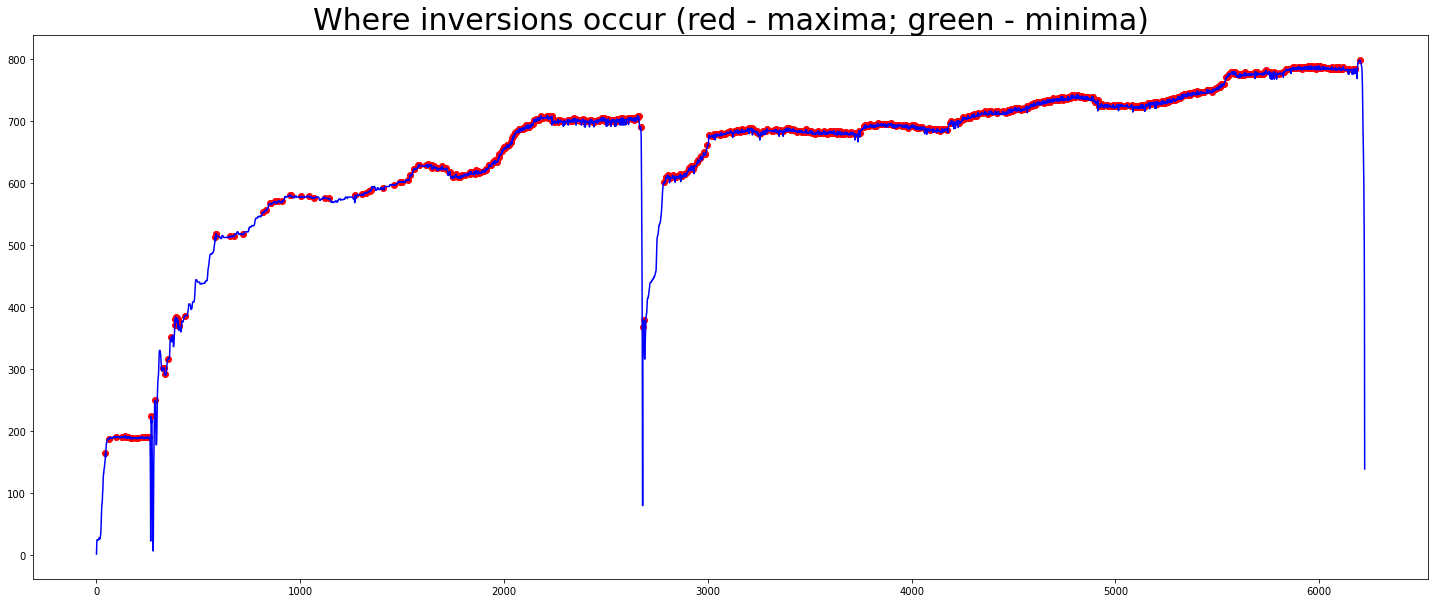

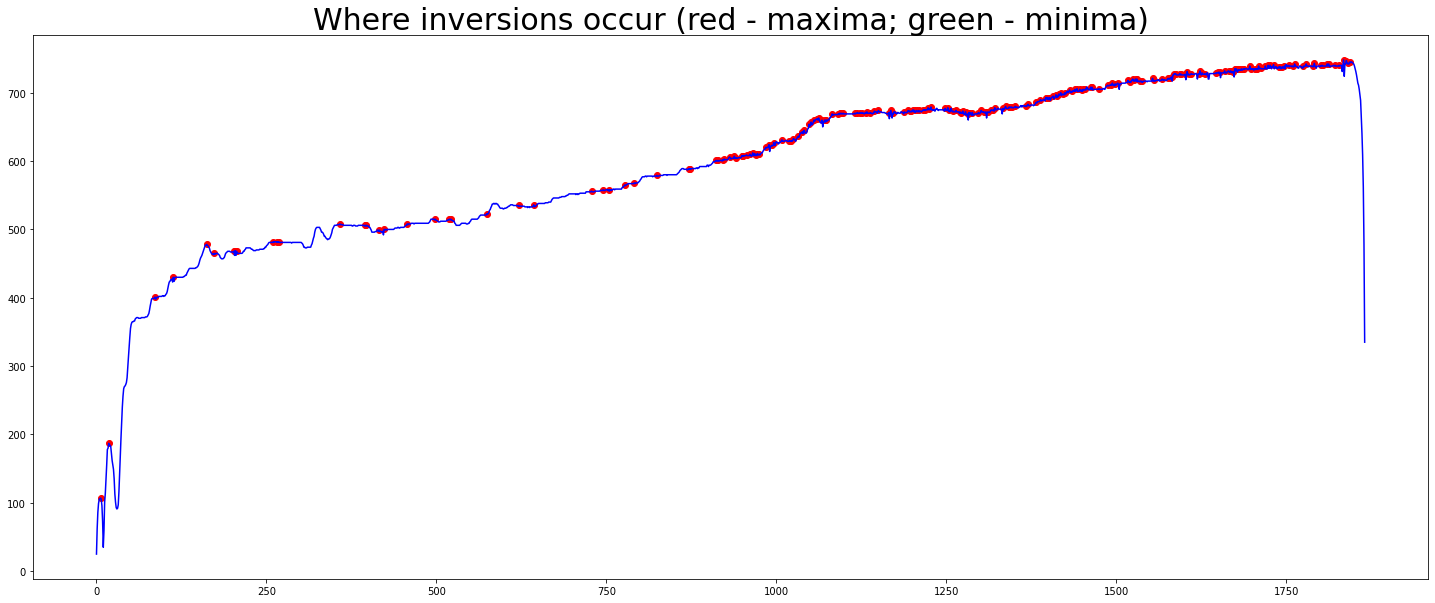

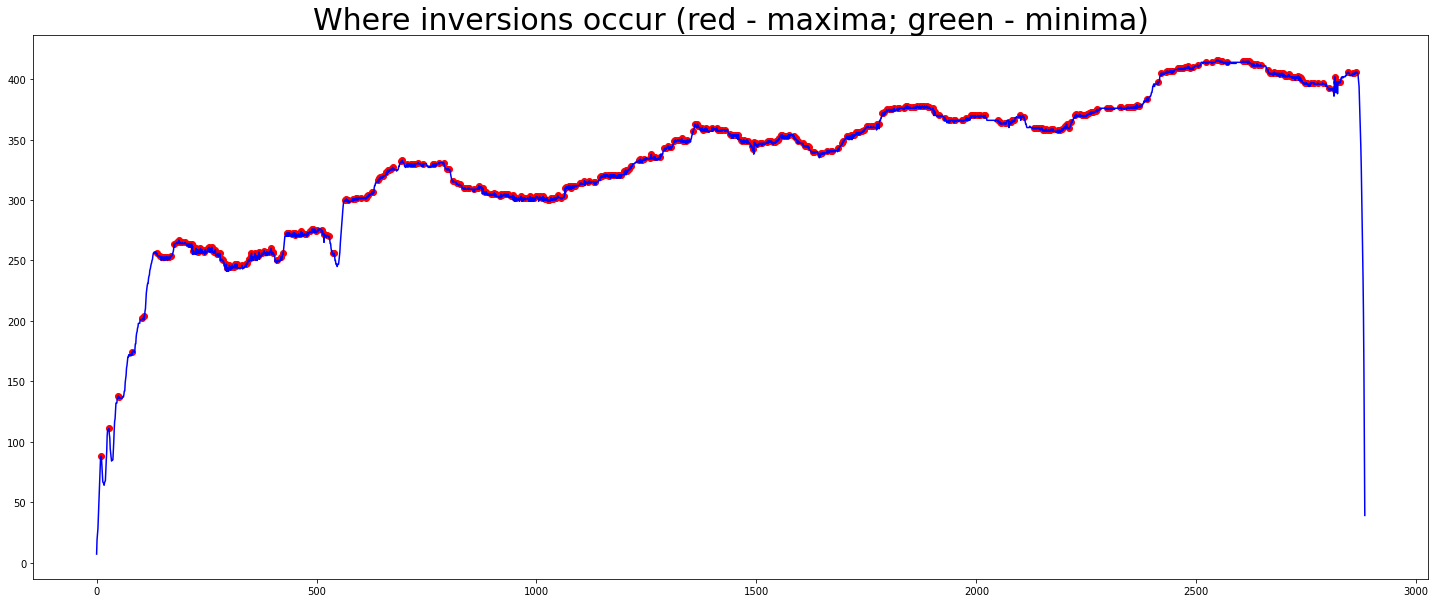

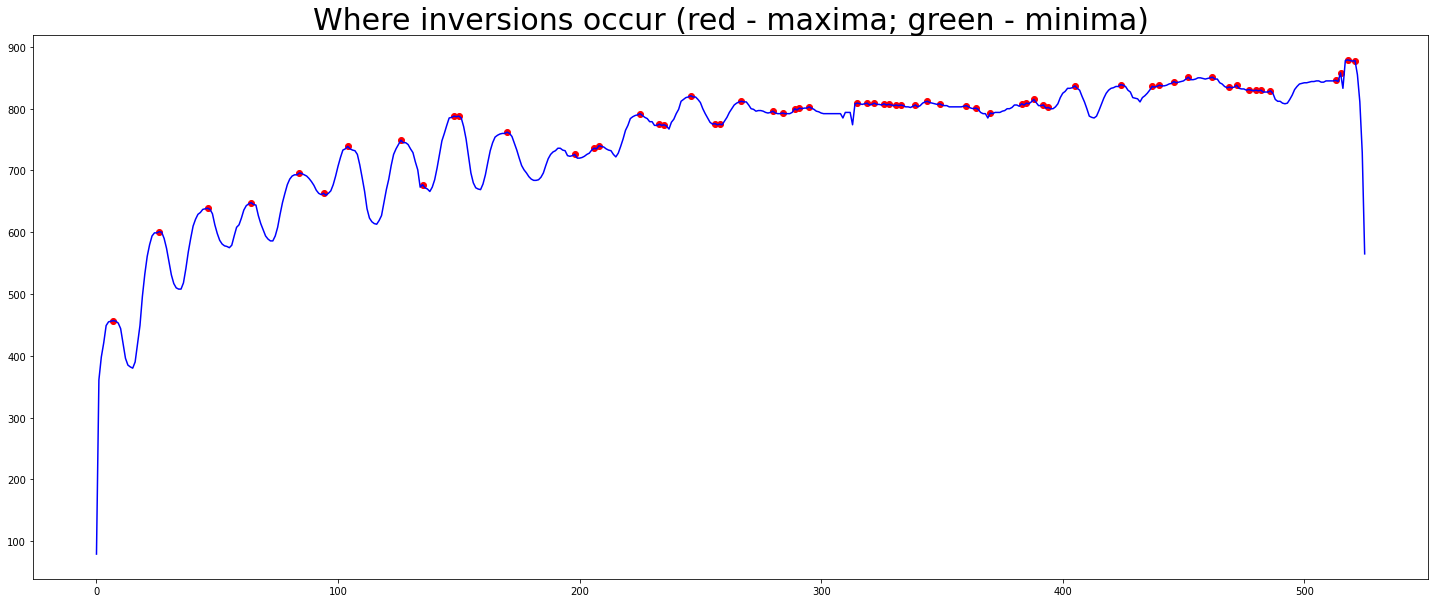

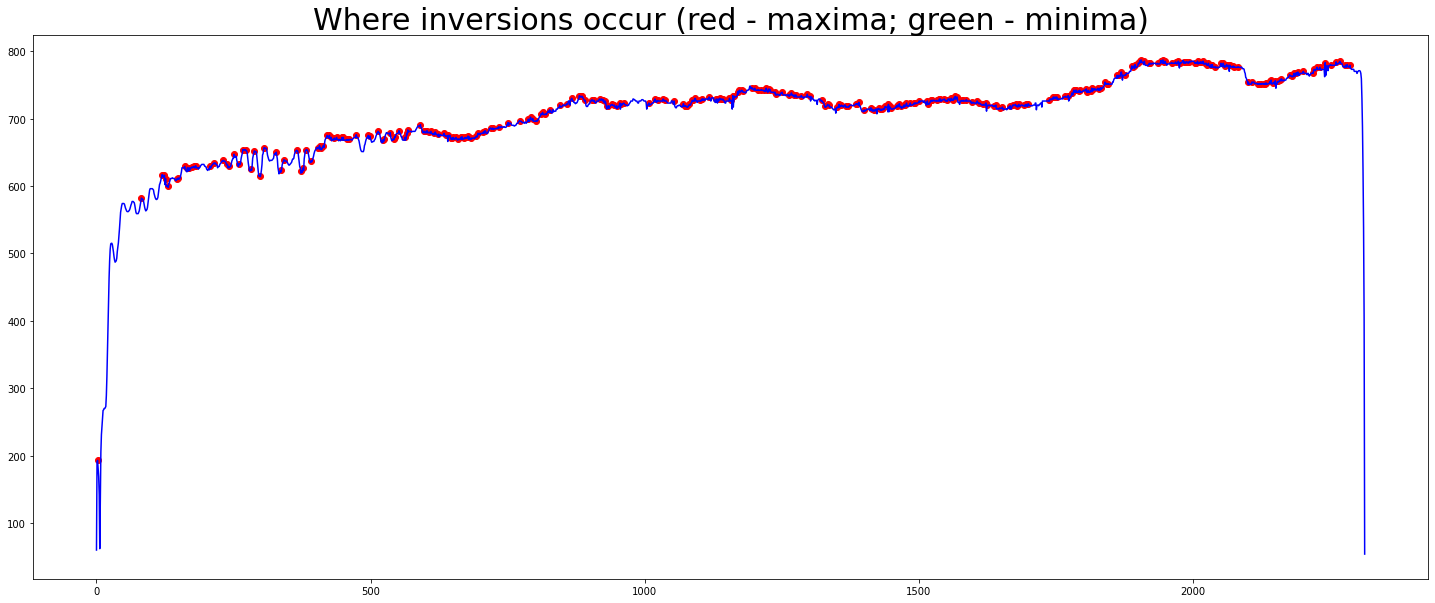

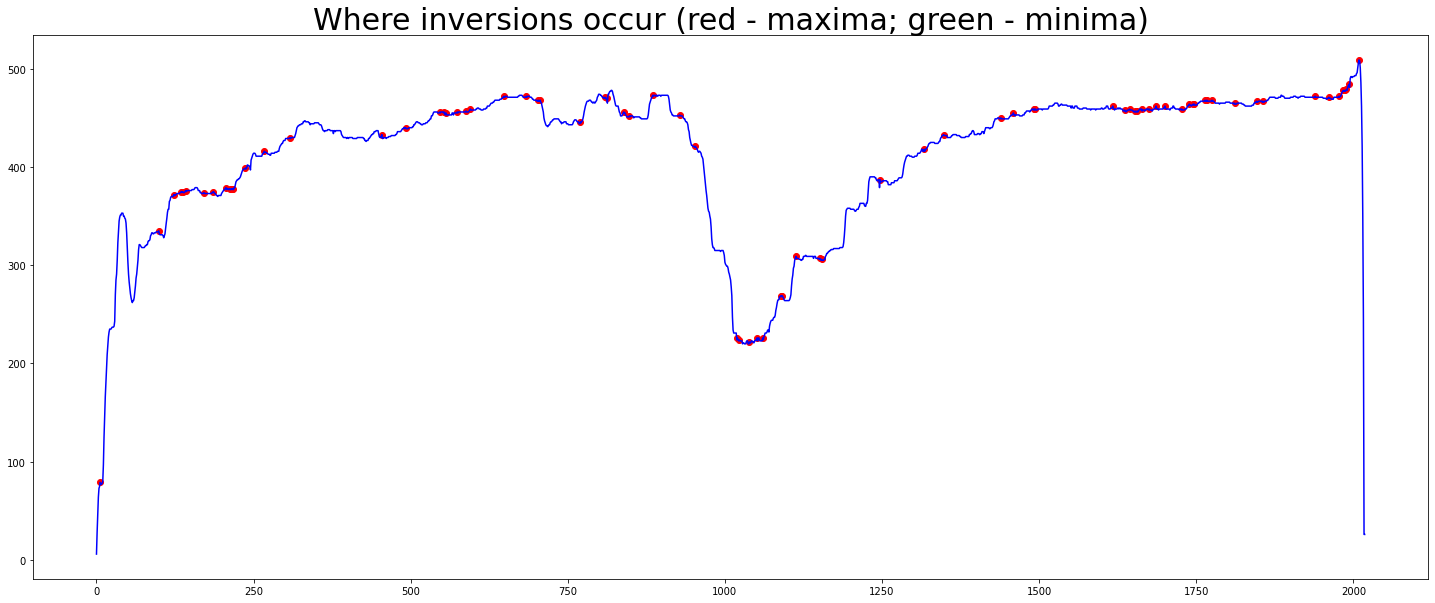

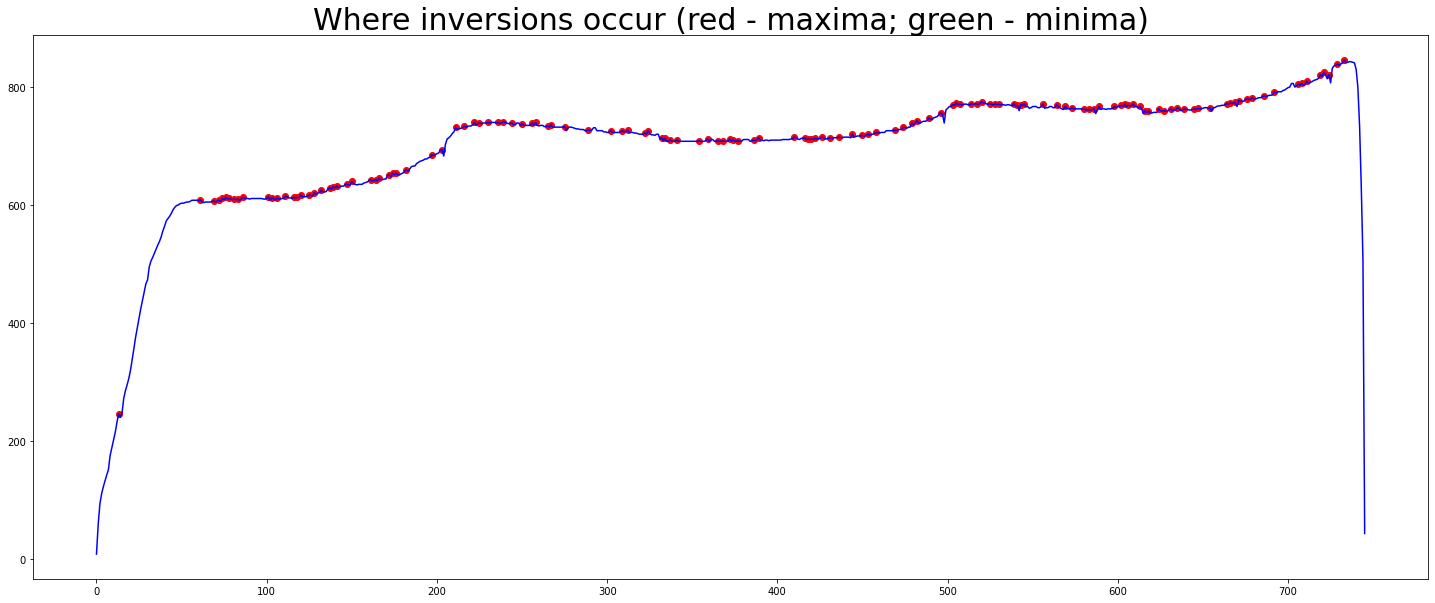

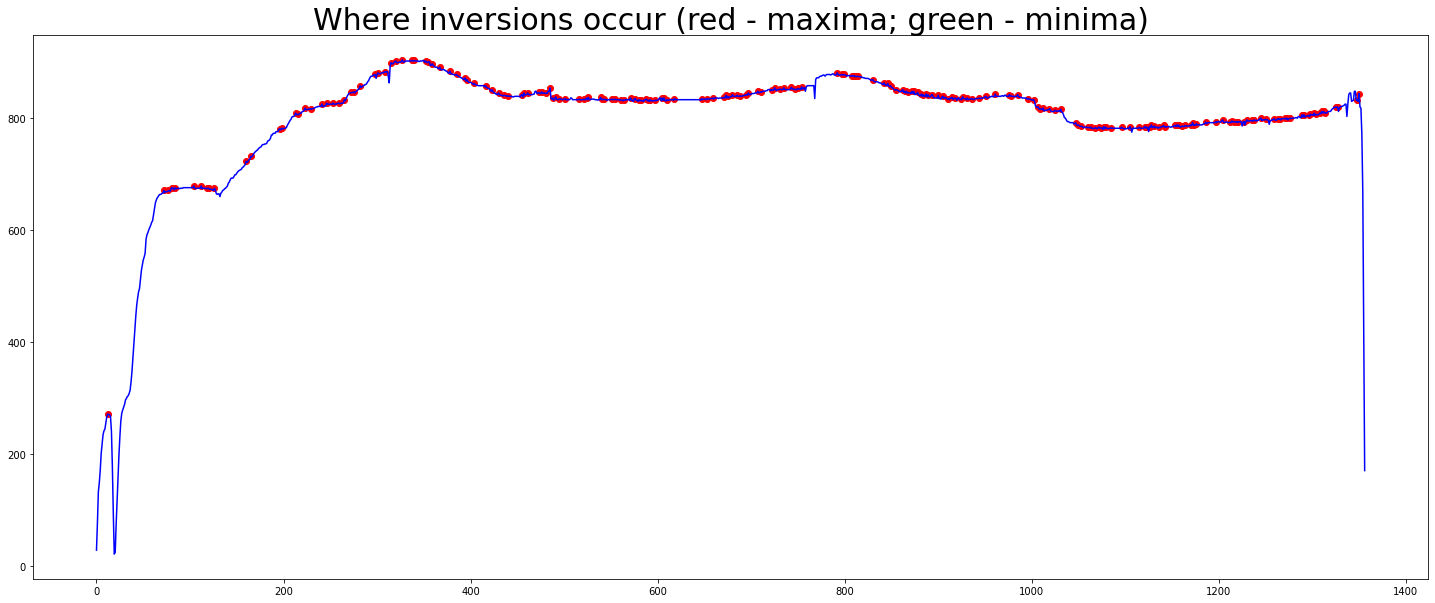

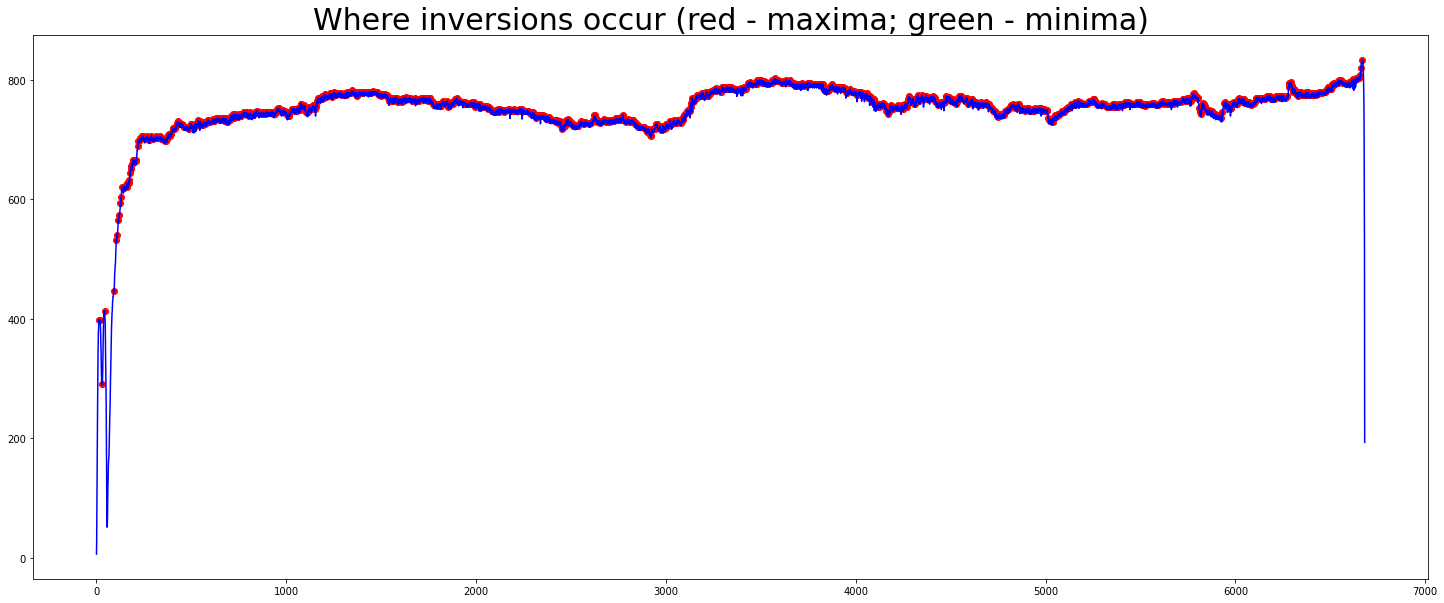

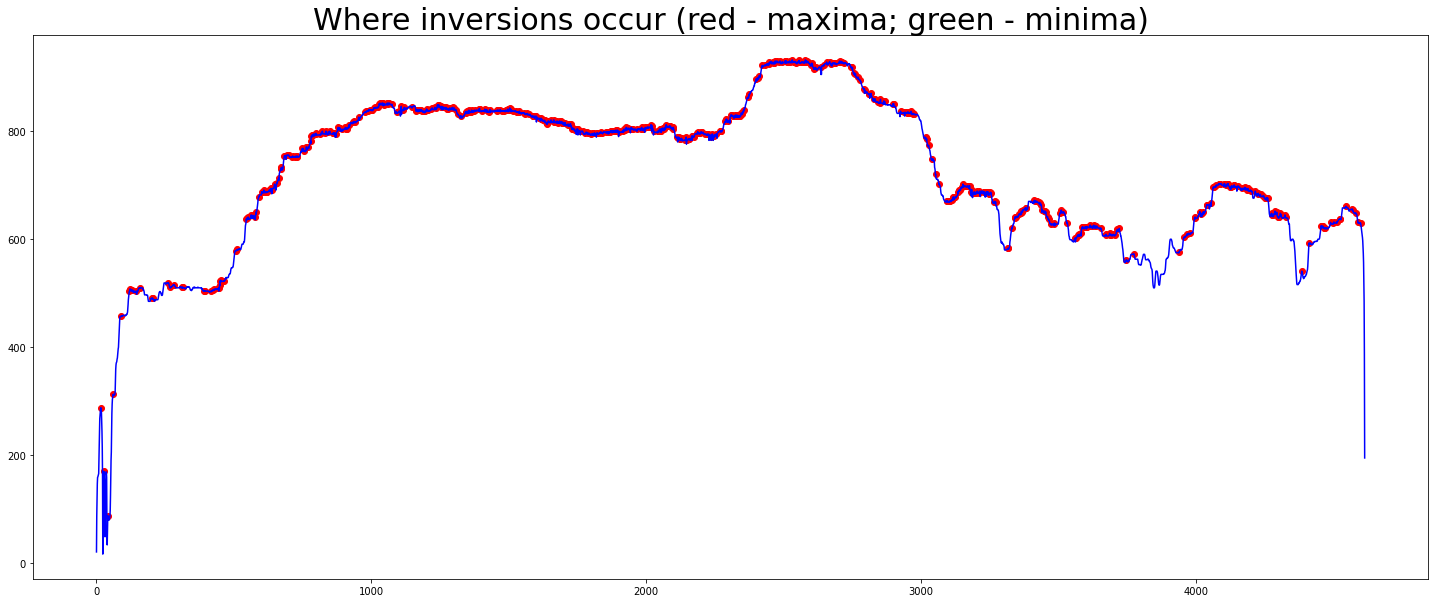

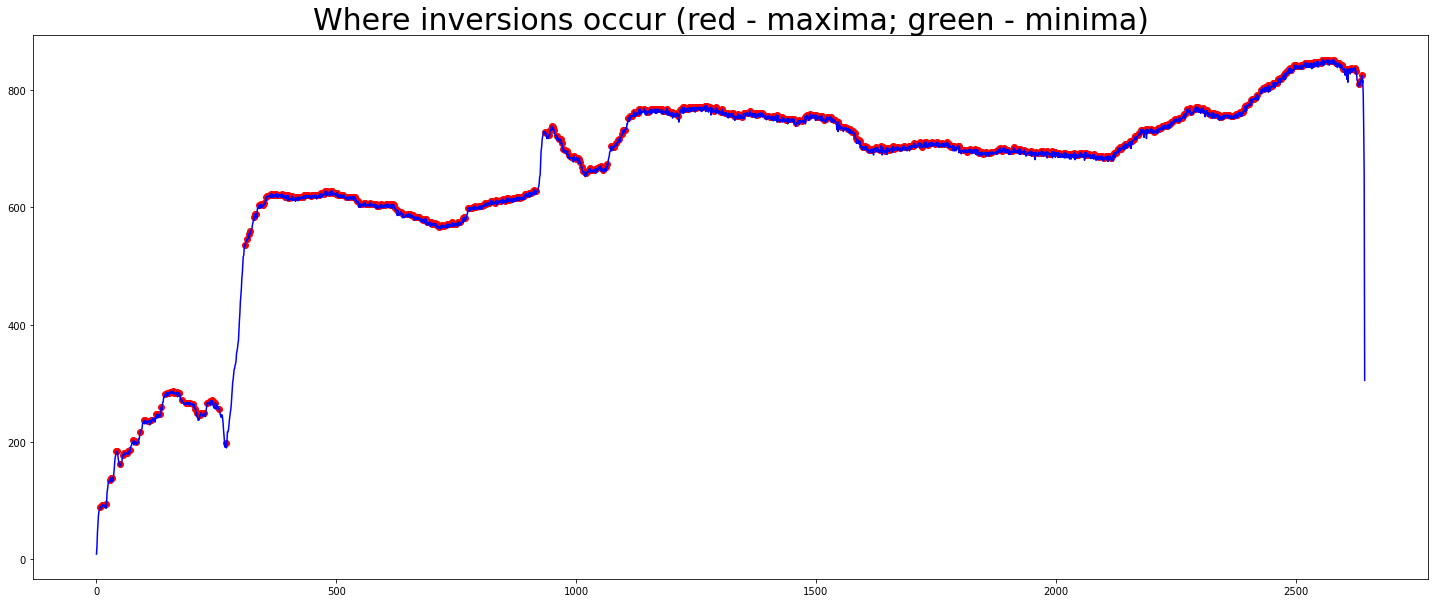

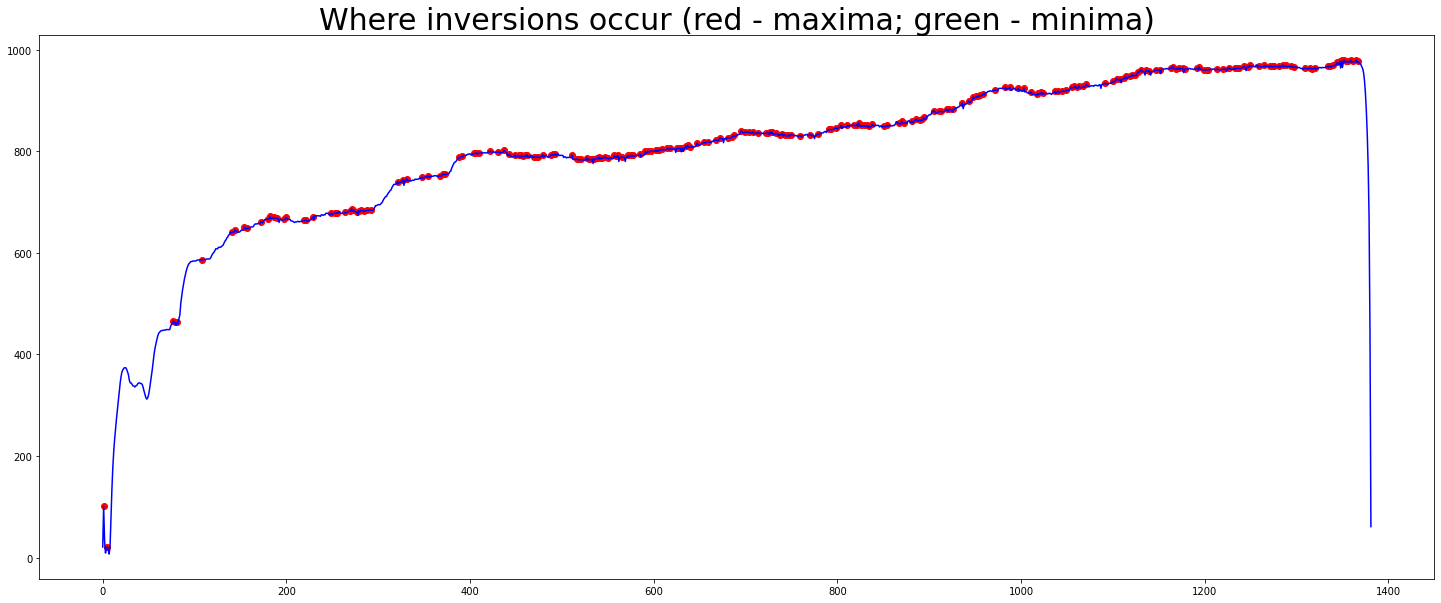

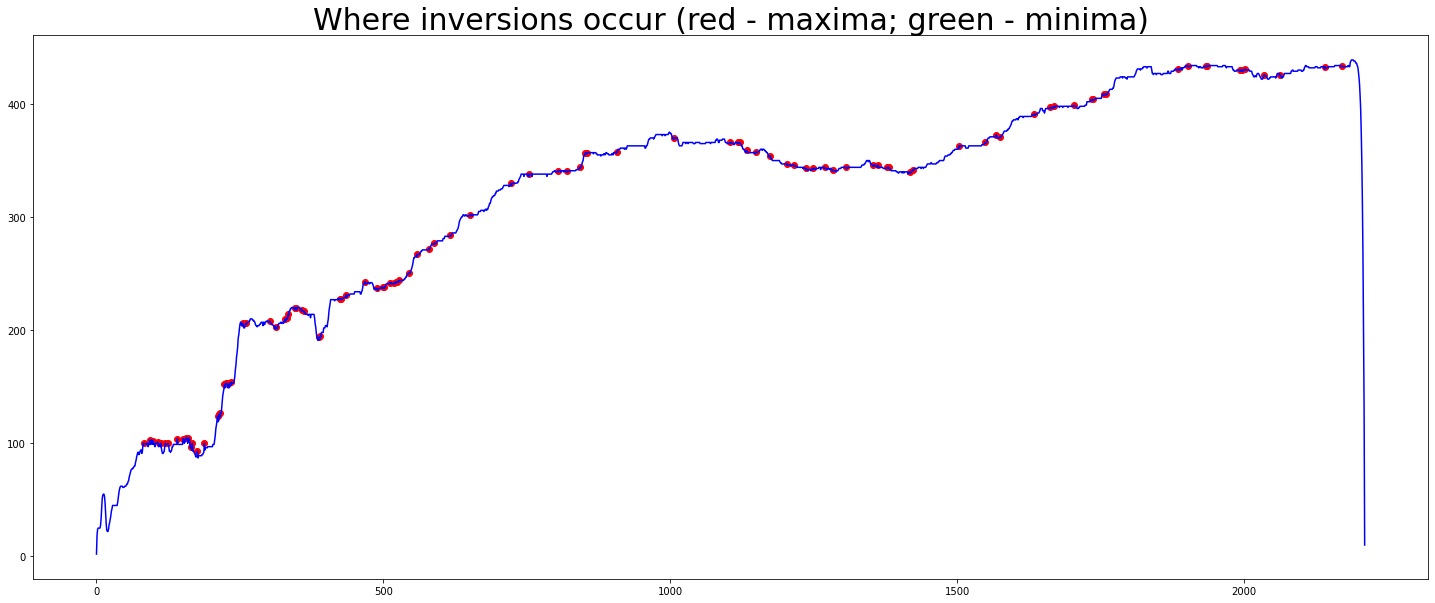

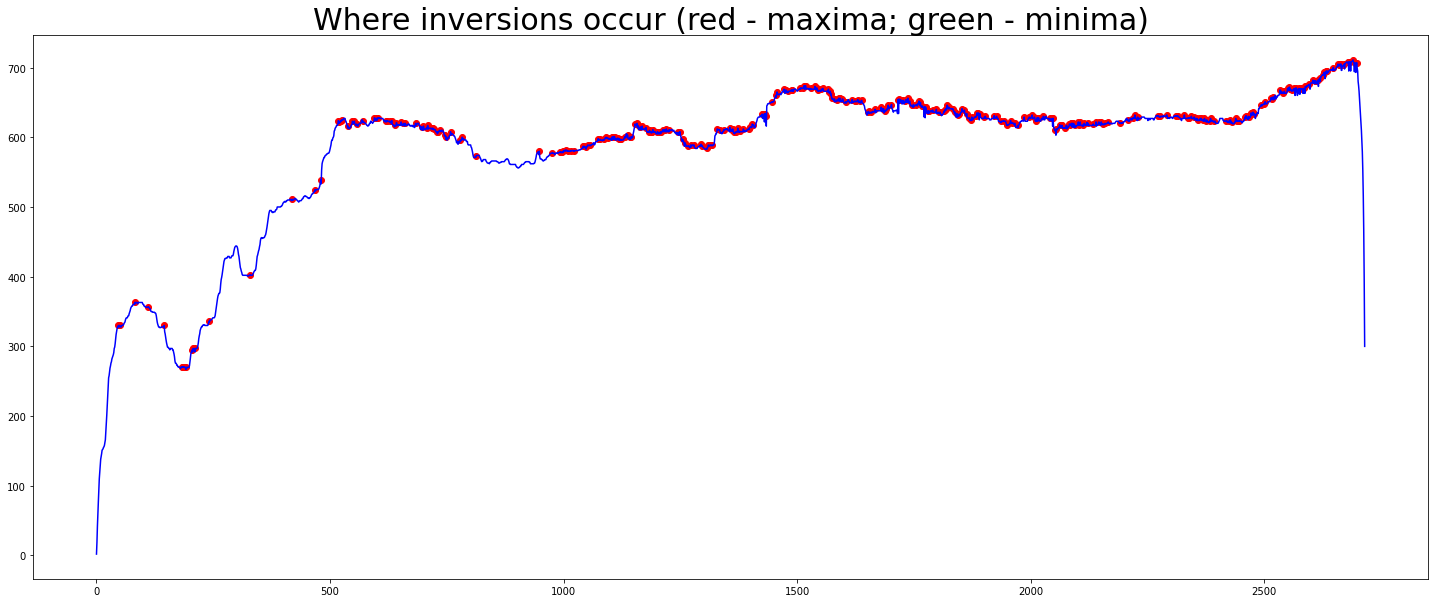

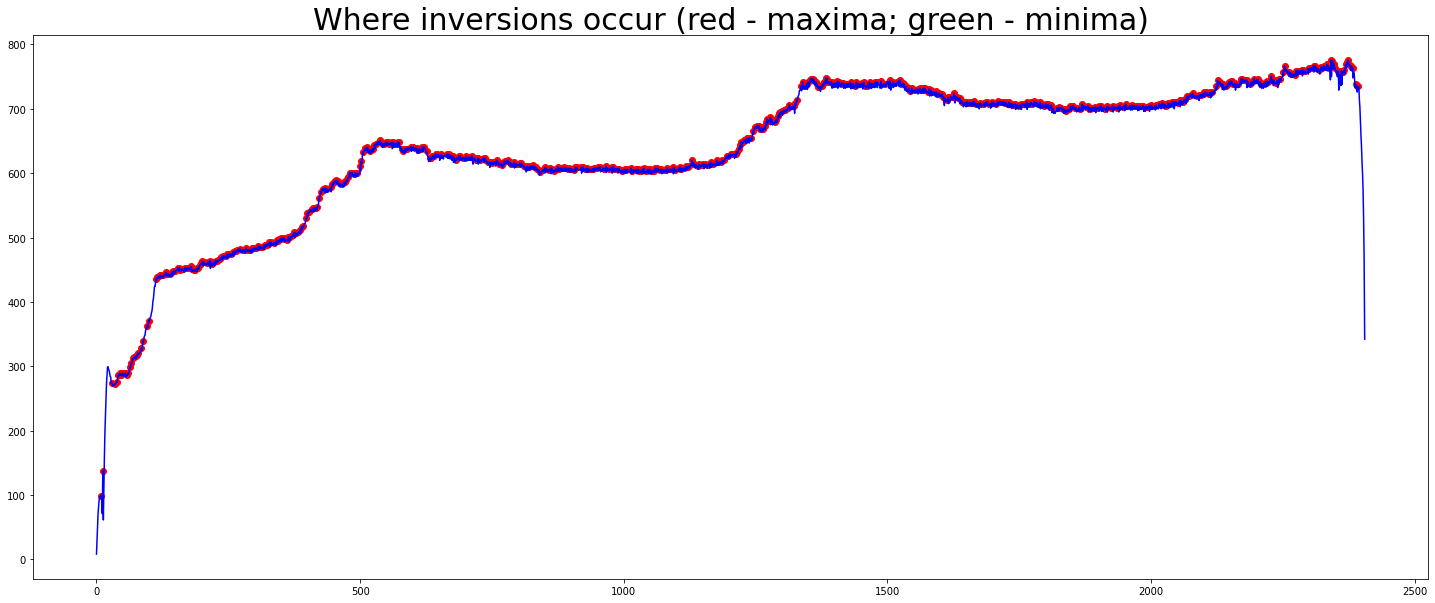

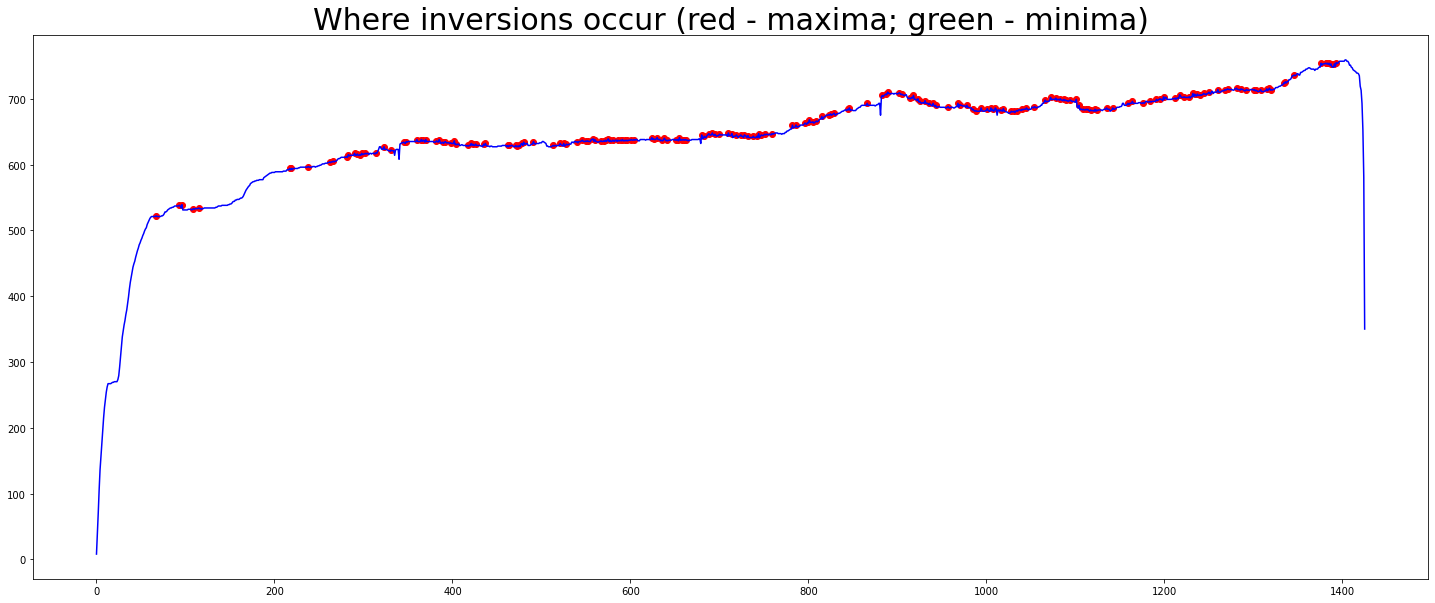

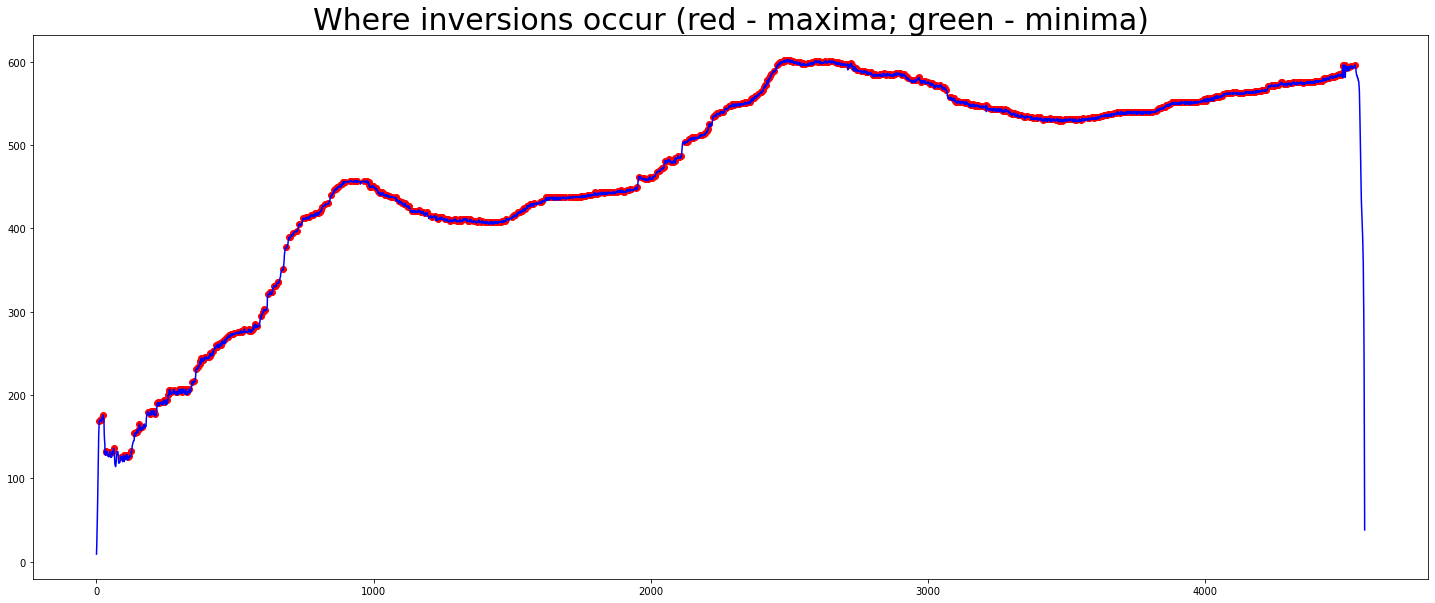

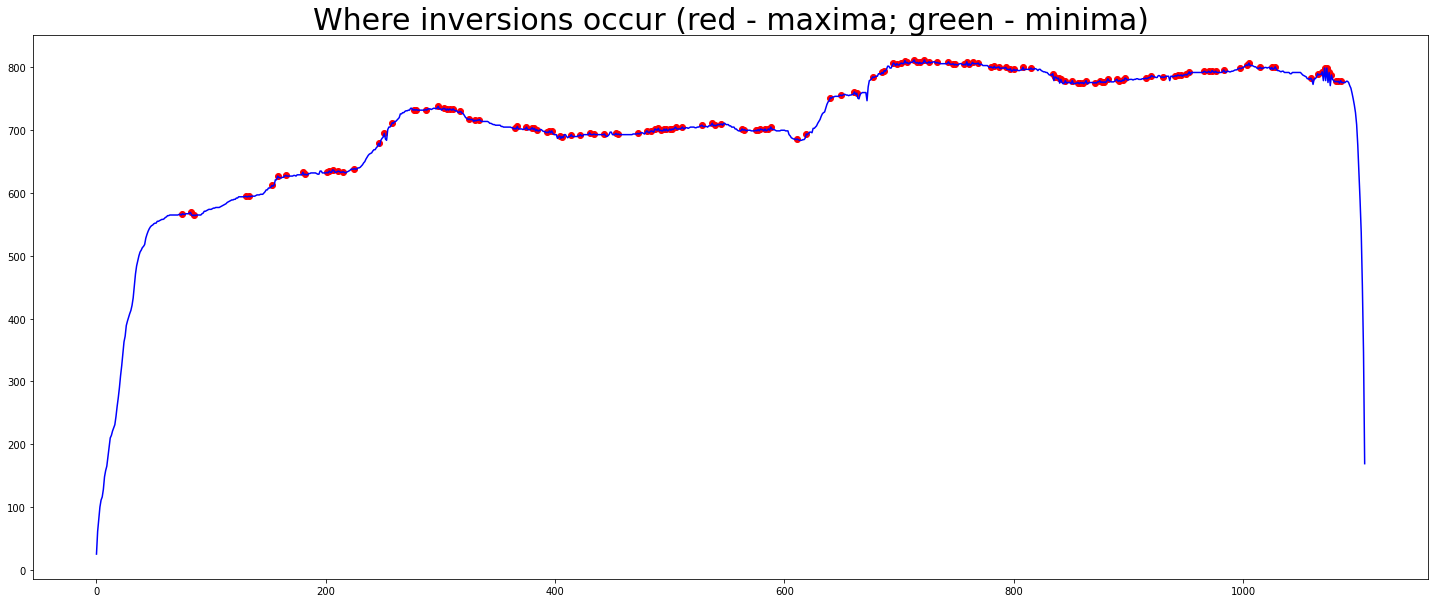

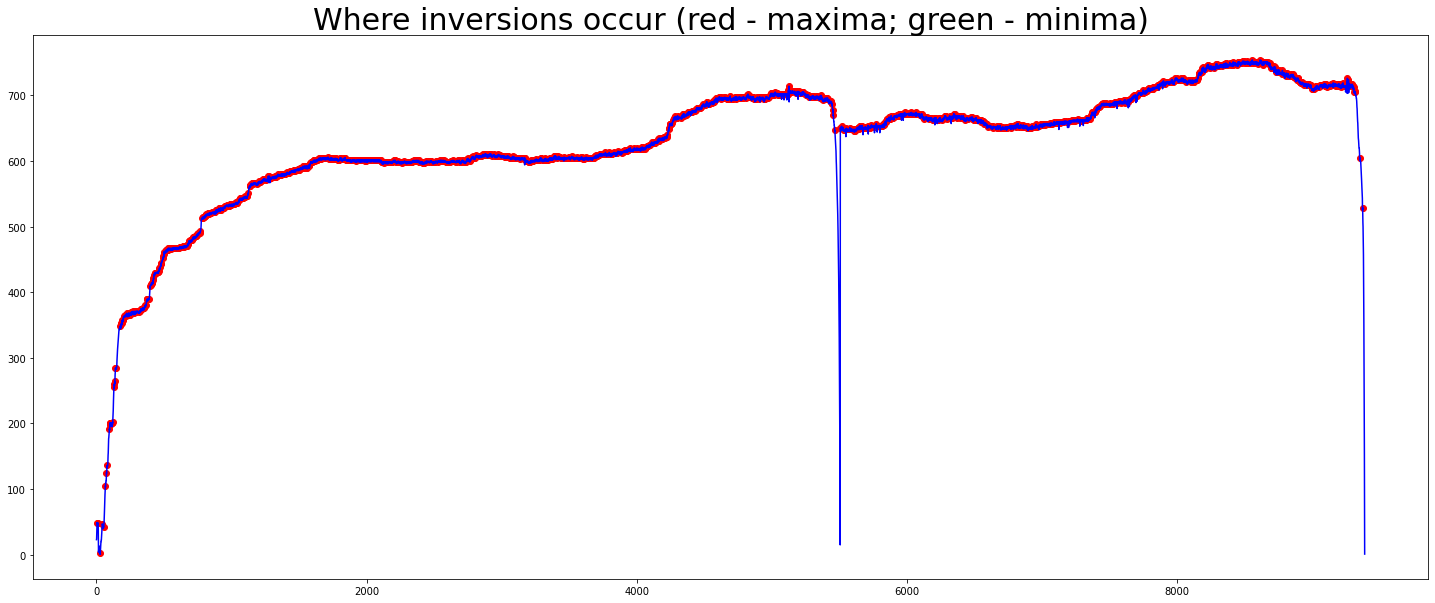

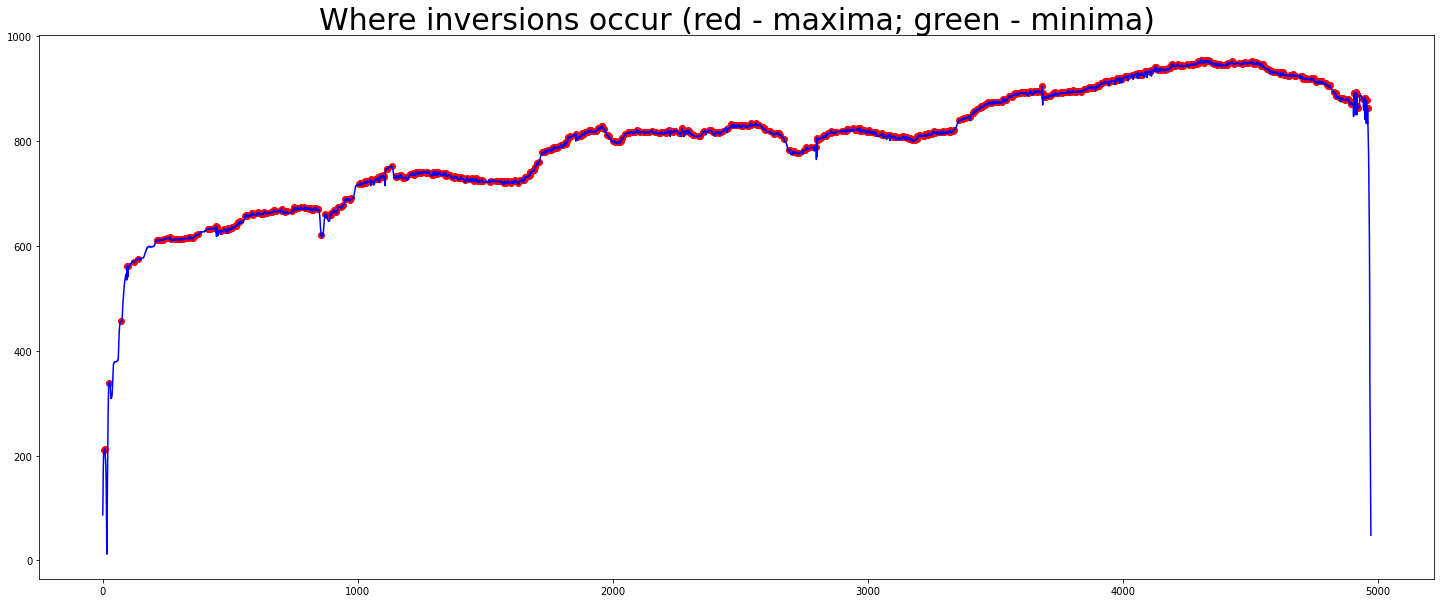

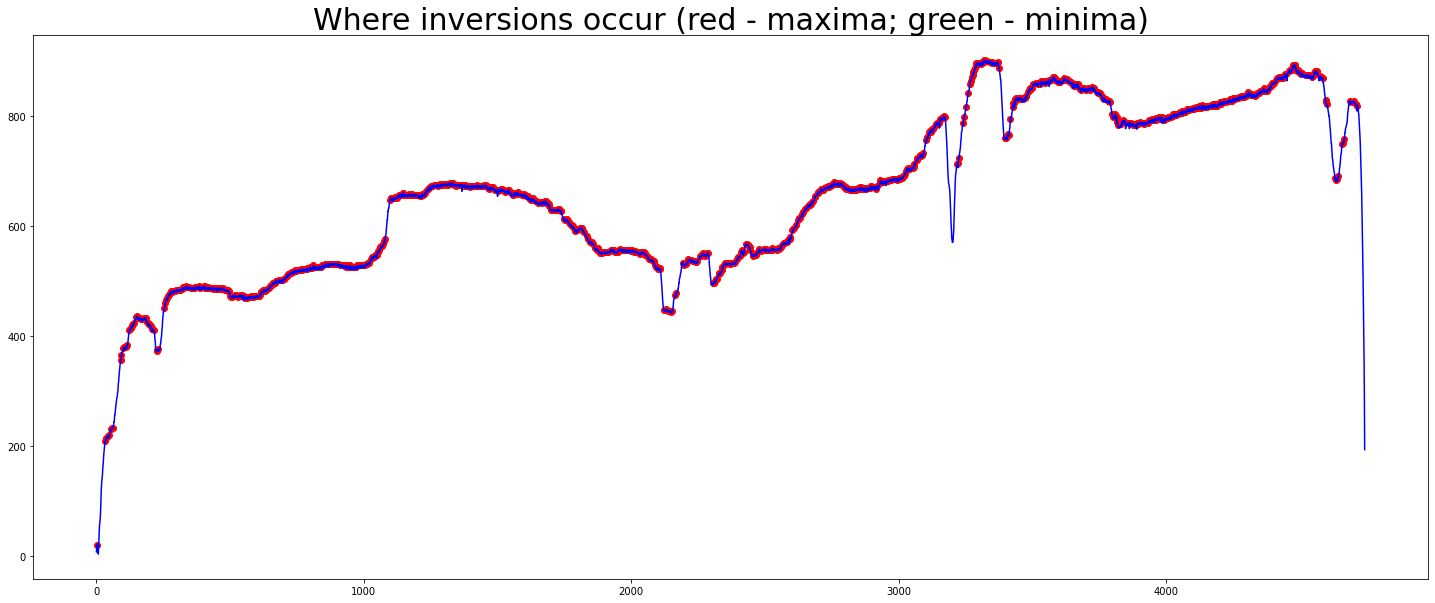

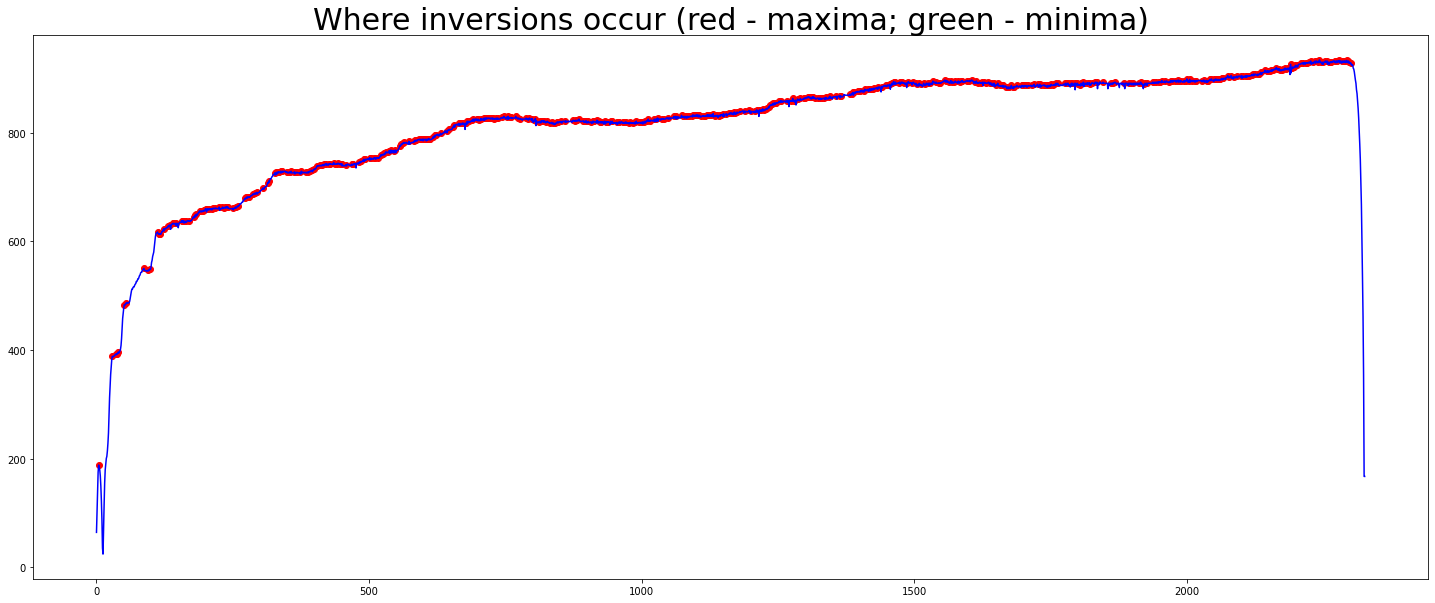

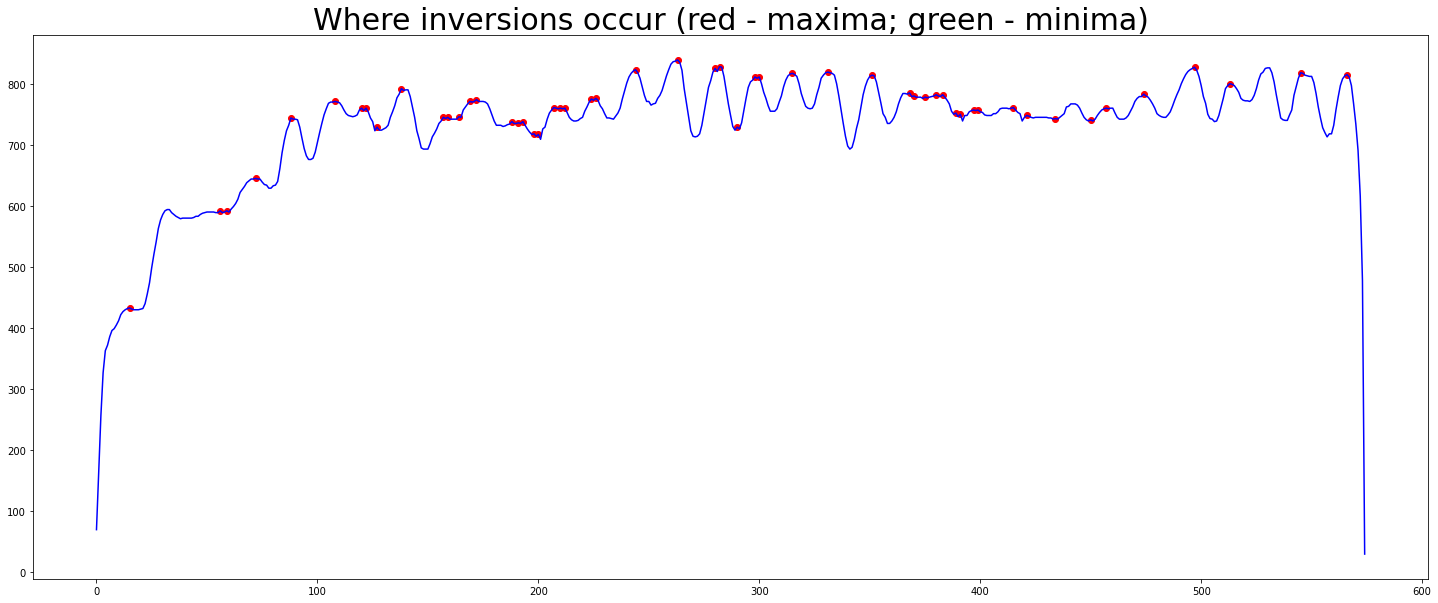

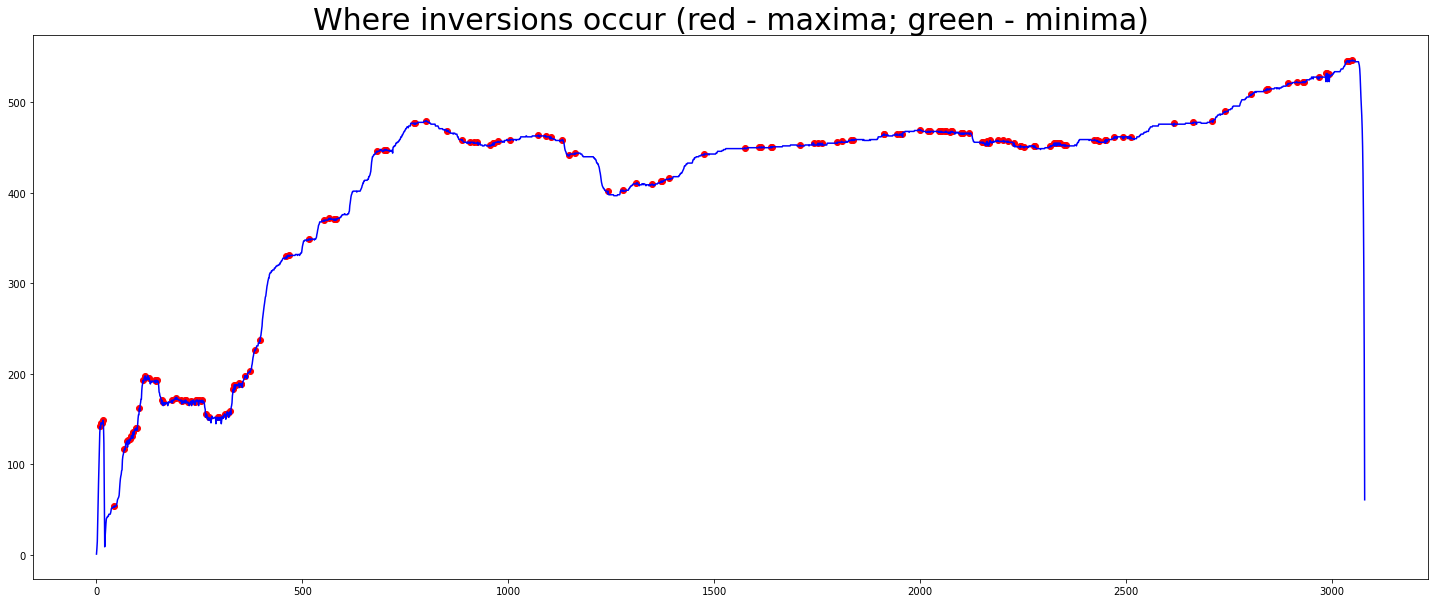

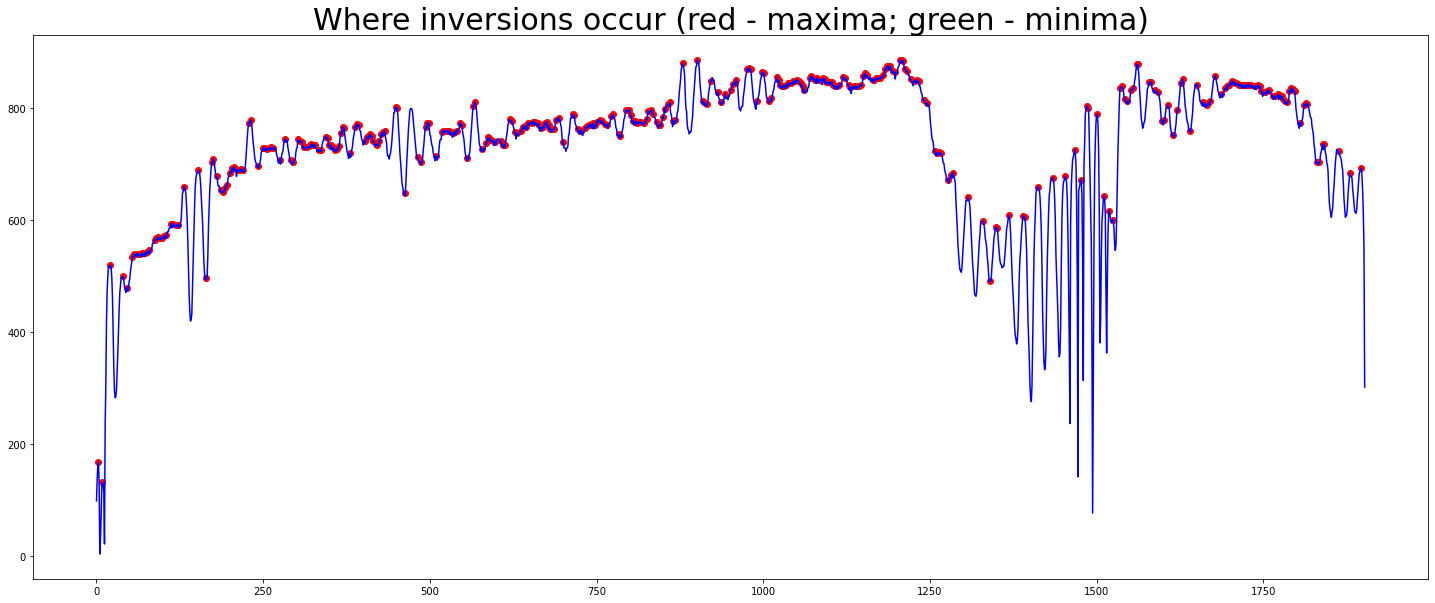

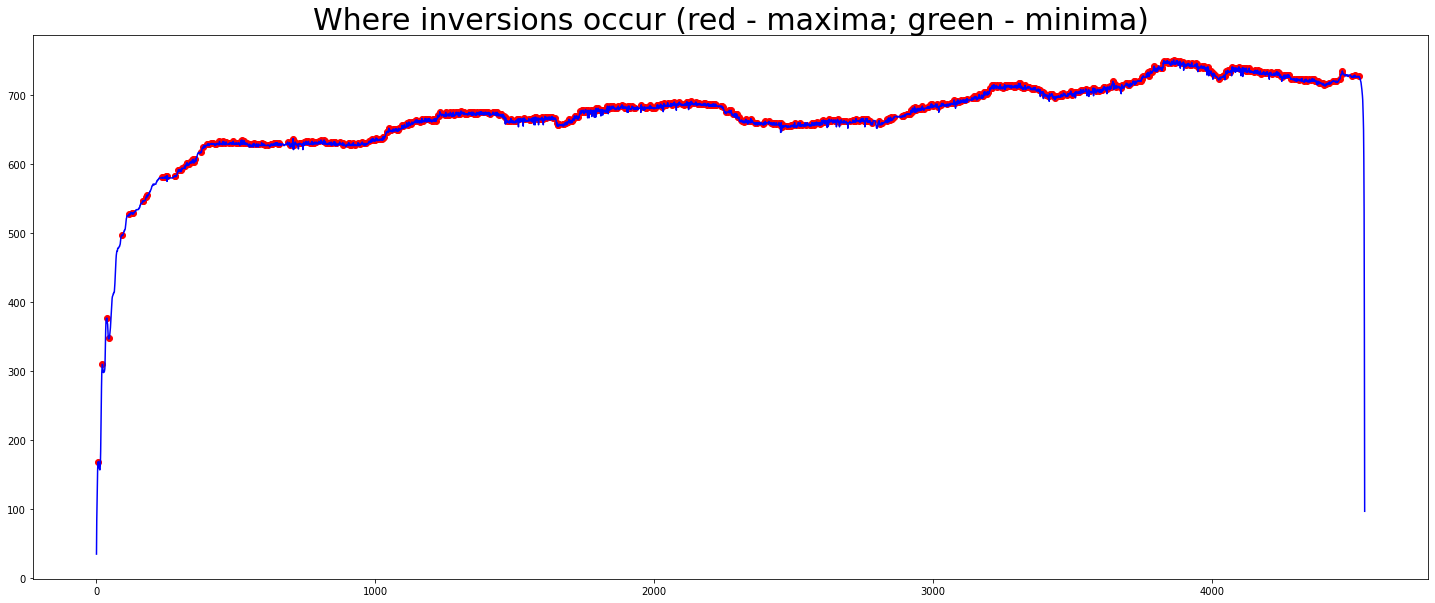

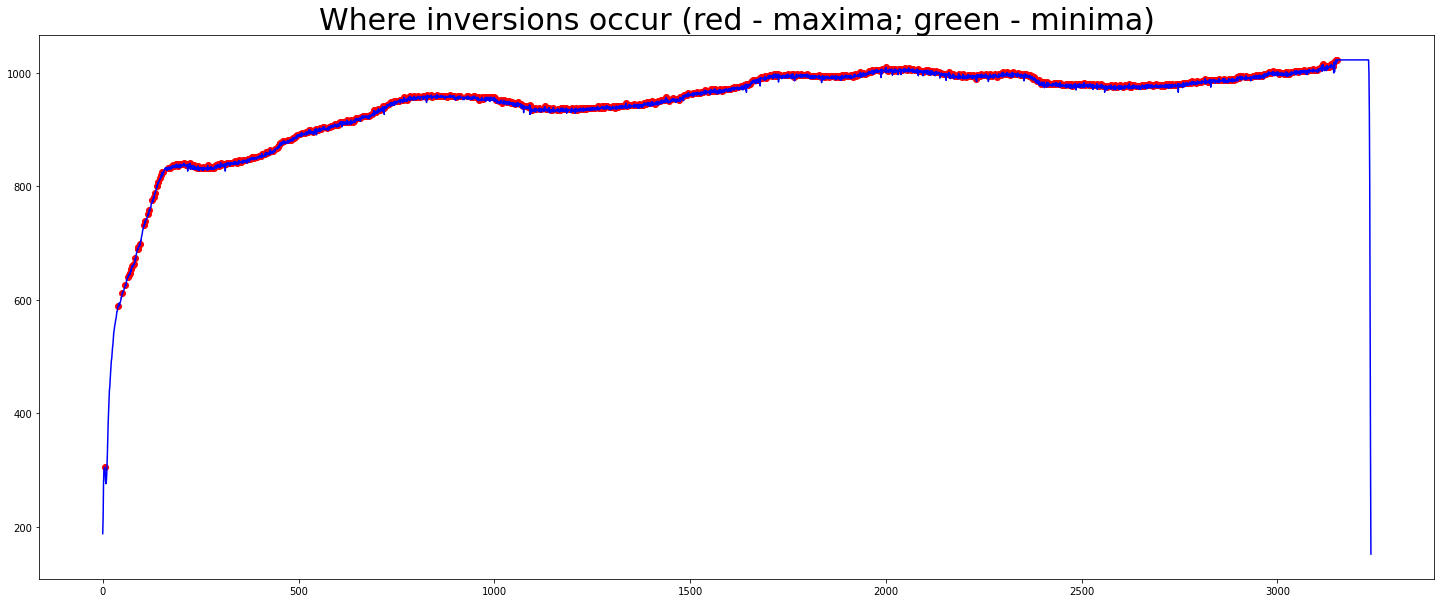

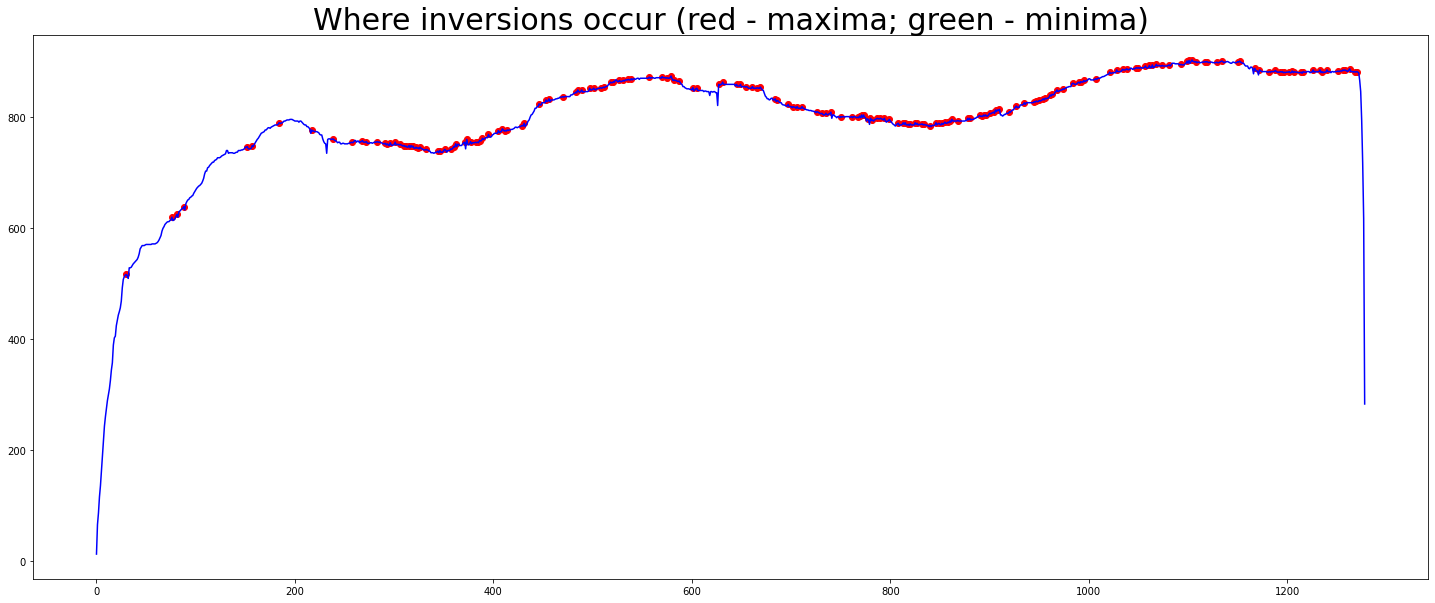

In [ ]:
for filename in patientFiles: 
    df = pd.read_csv(filename, sep = ';', header = None)
    static_df, dynamic_df = staticDynamicSplit(df)
    static_pressure = static_df[3]
    dynamic_pressure = dynamic_df[3]
    static_time = static_df[5]

    static_maxima = argrelextrema(np.array(static_pressure), np.greater)
    # could be greater_equal
    extrema_length.append(len(static_maxima[0]))
    extrema_rate.append(len(static_maxima[0])/(max(static_time) - min(static_time)))
    category.append("Patient")
    plt.figure(figsize = (25, 10))
    plt.plot(static_pressure, 'b')
    for i in static_maxima: 
        plt.scatter(i, static_pressure[i], marker = 'o', c = 'r')
    plt.title('Where inversions occur (red - maxima; green - minima)', fontsize = 30)
    print(len(static_maxima[0]))

Text(0.5, 1.0, 'Extrema rate')

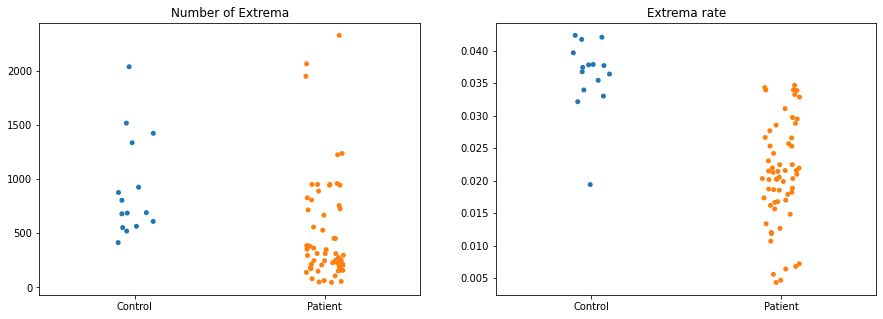

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.stripplot(x = category, y = extrema_length)
plt.title("Number of Extrema")
plt.subplot(1, 2, 2)
sns.stripplot(x = category, y = extrema_rate)
plt.title("Extrema rate")

## Radius and Angle

In [ ]:
# return (velocity, acceleration, jerk)
def smoothPolarFeature(inputR, inputT, n, smoothing_factor):
    sx = interpolate.UnivariateSpline(np.arange(len(inputR)), inputR, k=4)
    sy = interpolate.UnivariateSpline(np.arange(len(inputT)), inputT, k=4)

    sx.set_smoothing_factor(smoothing_factor)
    sy.set_smoothing_factor(smoothing_factor)

    sxdot = sx.derivative()
    sydot = sy.derivative()
    
    sxdotdot = sxdot.derivative()
    sydotdot = sydot.derivative()
    
    t = np.linspace(0, len(inputR), n)

    #calculate velocity
    velocityR = sxdot(t)
    velocityT = sydot(t)

    #calculate acceleration
    accelerationR = sxdotdot(t)
    accelerationT = sydotdot(t)

    #dr/dtheta
    drdtheta = velocityR/velocityT

    # new_curve: interpolated/transformed curve, curv_spline_eval: curvature, curv_dot_eval: rate of change of curvature
    return velocityR, velocityT, accelerationR, accelerationT, drdtheta

In [ ]:
# return (velocity, acceleration, jerk, curvature)
def smoothCurveFeature(curve, n, smoothing_factor, df):
    sx = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[0,:], k=4)
    sy = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[1,:], k=4)
    pressure_f = interpolate.UnivariateSpline(np.arange(np.shape(df[3])[0]), np.array(df[3]), k=1)

    sx.set_smoothing_factor(smoothing_factor)
    sy.set_smoothing_factor(smoothing_factor)

    sxdot = sx.derivative()
    sydot = sy.derivative()
    
    sxdotdot = sxdot.derivative()
    sydotdot = sydot.derivative()

    sxdotdotdot = sxdotdot.derivative()
    sydotdotdot = sydotdot.derivative()
    
    t = np.linspace(0, curve.shape[1], n)
    new_curve = np.zeros((2, n))
    new_curve[0,:] = sx(t)
    new_curve[1,:] = sy(t)

    #calculate velocity
    velocity = np.sqrt((sydot(t))**2 + (sxdot(t))**2)

    #calculate acceleration
    acceleration = np.sqrt((sydotdot(t))**2 + (sxdotdot(t))**2)

    #calculate jerk
    jerk = np.sqrt((sydotdotdot(t))**2 + (sxdotdotdot(t))**2)
    
    # calculate curvature
    curvature = (sxdot(t) * sydotdot(t) - sydot(t) * sxdotdot(t))/(sxdot(t)**2 + sydot(t)**2)**(3/2)

    pressure = pressure_f(t)
    
    # new_curve: interpolated/transformed curve, curv_spline_eval: curvature, curv_dot_eval: rate of change of curvature
    return velocity, acceleration, jerk, curvature, pressure

In [ ]:
def func_inv (x, a, b):
    return a + (b/(x + 10**-10))
Rs = []
theta = []
rsquaredVR = []
coeff0VR = []
coeff1VR = []
residsVR = []

rsquaredCR = []
coeff0CR = []
coeff1CR = []
residsCR = []

category = []
for filename in controlFiles: 
    df = pd.read_csv(filename, sep = ';', header = None)
    # Radius Calculation
    x = np.array(df[df[6] == 0][0])
    y = np.array(df[df[6] == 0][1])
    x0 = float(x[0])
    y0 = float(y[0])
    R = np.array(((x - x0)**2 + (y - y0)**2) ** (1/2))
    Rs.append(R)

    # X-Y Velocity Calculation
    curve = np.array([x, y])
    smoothing_factor = 100000
    velocity, _, _, curvature, _ = smoothCurveFeature(curve, len(R), smoothing_factor, df)

    # Linear fit for velocity and radius
    R = sm.add_constant(R)
    model = sm.OLS(velocity, R)
    results = model.fit()
    rsquaredVR.append(results.rsquared)
    coeff0VR.append(results.params[0])
    coeff1VR.append(results.params[1])
    residsVR.append (sum(abs(results.resid)))

    # Fit for Curvature and Velocity
    curvature = curvature[100: len(curvature)-100]
    xdata = velocity[100: len(velocity)-100]
    param, cov  = scipy.optimize.curve_fit(func_inv, xdata, curvature)
    residuals = curvature - func_inv(xdata, *param)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((curvature-np.mean(curvature))**2)
    r_squared = 1 - (ss_res / ss_tot)

    rsquaredCR.append(r_squared)
    coeff0CR.append(param[0])
    coeff1CR.append(param[1])
    residsCR.append (ss_res)
    
    # Theta Calculation
    th = np.arctan((y - y0) / (x - x0 + (10**-10)))
    theta.append(th)
    category.append('Control')

for filename in patientFiles: 
    df = pd.read_csv(filename, sep = ';', header = None)
    # Radius Calculation
    x = np.array(df[df[6] == 0][0])
    y = np.array(df[df[6] == 0][1])
    x0 = float(x[0])
    y0 = float(y[0])
    R = np.array(((x - x0)**2 + (y - y0)**2) ** (1/2))
    Rs.append(R)

    # X-Y Velocity Calculation
    curve = np.array([x, y])
    smoothing_factor = 100000
    velocity, _, _, curvature, _ = smoothCurveFeature(curve, len(R), smoothing_factor, df)

    # Linear fit for velocity and radius
    R = sm.add_constant(R)
    model = sm.OLS(velocity, R)
    results = model.fit()
    rsquaredVR.append(results.rsquared)
    coeff0VR.append(results.params[0])
    coeff1VR.append(results.params[1])
    residsVR.append (sum(abs(results.resid)))

    # Fit for Curvature and Velocity (inversely proportional)
    curvature = curvature[100: len(curvature)-100]
    xdata = velocity[100: len(velocity)-100]
    param, cov  = scipy.optimize.curve_fit(func_inv, xdata, curvature)
    residuals = curvature - func_inv(xdata, *param)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((curvature-np.mean(curvature))**2)
    r_squared = 1 - (ss_res / ss_tot)

    rsquaredCR.append(r_squared)
    coeff0CR.append(param[0])
    coeff1CR.append(param[1])
    residsCR.append (ss_res)

    # Theta Calculation
    th = np.arctan((y - y0) / (x - x0 + (10**-10)))
    theta.append(th)
    category.append('Patient')

thetaAdd = [np.cumsum(np.abs(np.diff(np.abs(i)))) for i in theta]

Text(0.5, 1.0, 'Sum of Residuals for R on Theta Regression')

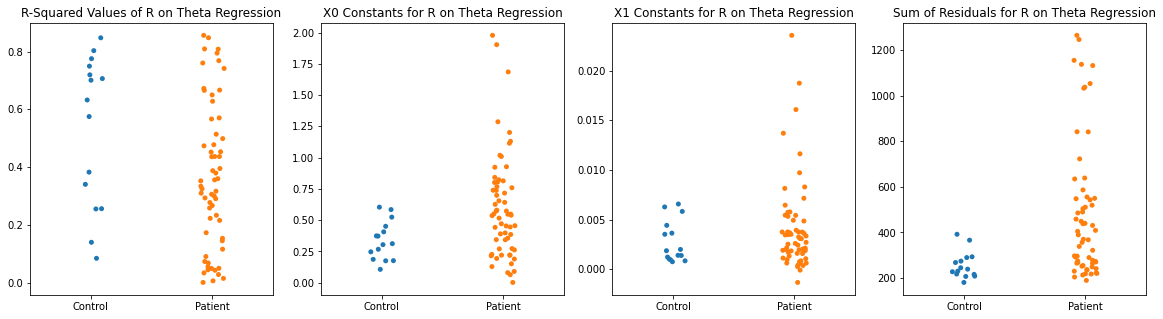

In [ ]:
# Velocity on Radius Regression
plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
sns.stripplot(x = category, y = rsquaredVR)
plt.title('R-Squared Values of Velocity on R Regression')
plt.subplot(1, 4, 2)
sns.stripplot(x = category, y = coeff0VR)
plt.title('X0 Constants for Velocity on R Regression')
plt.subplot(1, 4, 3)
sns.stripplot(x = category, y = coeff1VR)
plt.title('X1 Constants for Velocity on R Regression')
plt.subplot(1, 4, 4)
sns.stripplot(x = category, y = residsVR)
plt.title('Sum of Residuals for Velocity on R Regression')

Text(0.5, 1.0, 'Sum of Residuals for V on C Fit')

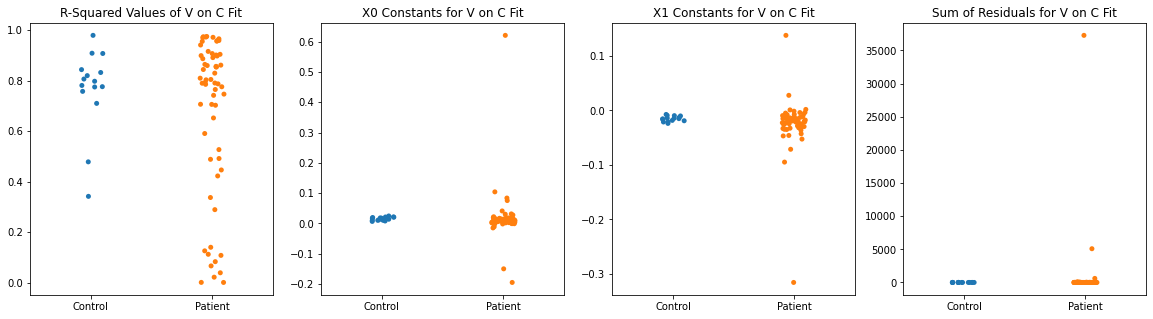

In [ ]:
# Velocity on Curvature Regression
plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
sns.stripplot(x = category, y = rsquaredCR)
plt.title('R-Squared Values of V on C Fit')
plt.subplot(1, 4, 2)
sns.stripplot(x = category, y = coeff0CR)
plt.title('X0 Constants for V on C Fit')
plt.subplot(1, 4, 3)
sns.stripplot(x = category, y = coeff1CR)
plt.title('X1 Constants for V on C Fit')
plt.subplot(1, 4, 4)
sns.stripplot(x = category, y = residsCR)
plt.title('Sum of Residuals for V on C Fit')

In [ ]:
rsquaredR = []
coeff0R = []
coeff1R = []
residsR = []
for i in range(len(thetaAdd)):
    thetaAdd[i] = sm.add_constant(thetaAdd[i])
    model = sm.OLS(Rs[i][1:], thetaAdd[i])
    results = model.fit()
    rsquaredR.append(results.rsquared)
    coeff0R.append(results.params[0])
    coeff1R.append(results.params[1])
    residsR.append (sum(abs(results.resid)))

Text(0.5, 1.0, 'Sum of Residuals for R on Theta Regression')

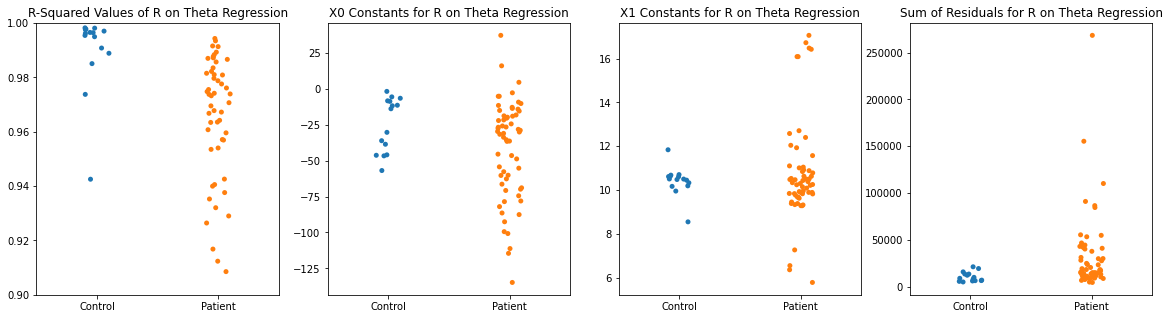

In [ ]:
# Radius on Theta Regression
plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
plt.ylim(0.9, 1)
sns.stripplot(x = category, y = rsquaredR)
plt.title('R-Squared Values of R on Theta Regression')
plt.subplot(1, 4, 2)
sns.stripplot(x = category, y = coeff0R)
plt.title('X0 Constants for R on Theta Regression')
plt.subplot(1, 4, 3)
sns.stripplot(x = category, y = coeff1R)
plt.title('X1 Constants for R on Theta Regression')
plt.subplot(1, 4, 4)
sns.stripplot(x = category, y = residsR)
plt.title('Sum of Residuals for R on Theta Regression')

In [ ]:
n = 1000
smoothing_factor = 1000
vRMean = []
vRStd = []
vTMean = []
vTStd = []
aRMean = []
aRStd = []
aTMean = []
aTStd = []
rtmean = []
rtstd = []

for i in range(len(Rs)):
    velocityR, velocityT, accelerationR, accelerationT, drdtheta = smoothPolarFeature(Rs[i], thetaAdd[i][:, 1], n, smoothing_factor)
    vRMean.append(np.mean(velocityR))
    vRStd.append(np.std(velocityR))
    vTMean.append(np.mean(velocityT))
    vTStd.append(np.std(velocityT))

    aRMean.append(np.mean(accelerationR))
    aRStd.append(np.std(accelerationR))
    aTMean.append(np.mean(accelerationT))
    aTStd.append(np.std(accelerationT))

    rtmean.append(np.mean(drdtheta))
    rtstd.append(np.std(drdtheta))

Text(0.5, 1.0, 'SD Velocity Theta')

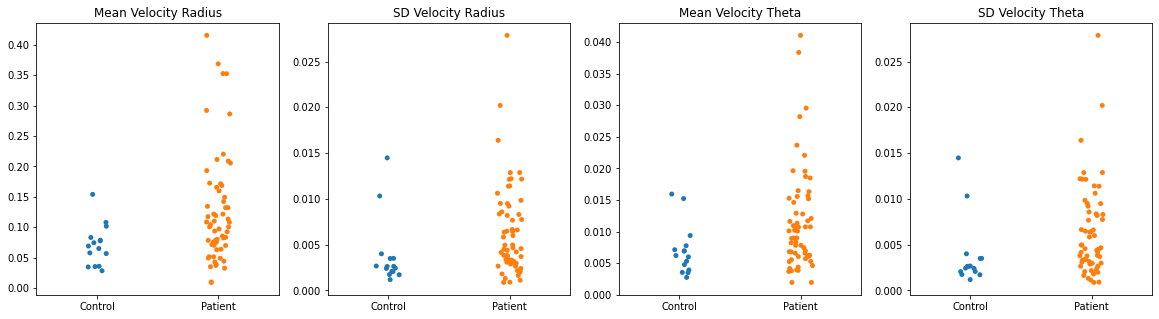

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
sns.stripplot(x = category, y = vRMean)
plt.title('Mean Velocity Radius')
plt.subplot(1, 4, 2)
sns.stripplot(x = category, y = vTStd)
plt.title('SD Velocity Radius')
plt.subplot(1, 4, 3)
sns.stripplot(x = category, y = vTMean)
plt.title('Mean Velocity Theta')
plt.subplot(1, 4, 4)
sns.stripplot(x = category, y = vTStd)
plt.title('SD Velocity Theta')

Text(0.5, 1.0, 'SD Acceleration Theta')

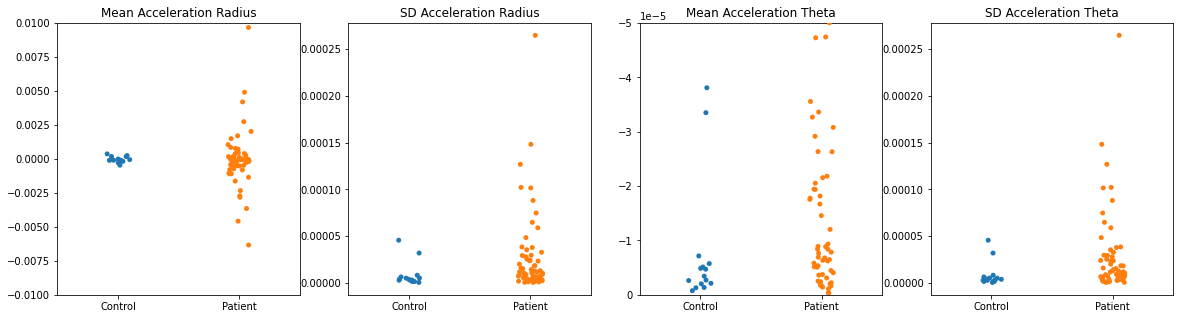

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
plt.ylim(-0.01, 0.01)
sns.stripplot(x = category, y = aRMean)
plt.title('Mean Acceleration Radius')
plt.subplot(1, 4, 2)
sns.stripplot(x = category, y = aTStd)
plt.title('SD Acceleration Radius')
plt.subplot(1, 4, 3)
plt.ylim(0, -0.00005)
sns.stripplot(x = category, y = aTMean)
plt.title('Mean Acceleration Theta')
plt.subplot(1, 4, 4)
sns.stripplot(x = category, y = aTStd)
plt.title('SD Acceleration Theta')

Text(0.5, 1.0, 'SD drdtheta')

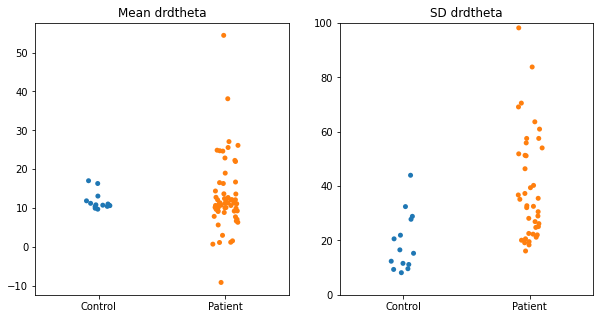

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.stripplot(x = category, y = rtmean)
plt.title('Mean drdtheta')
plt.subplot(1, 2, 2)
plt.ylim(0, 100)
sns.stripplot(x = category, y = rtstd)
plt.title('SD drdtheta')

## Prep Sample Drawings for Paper

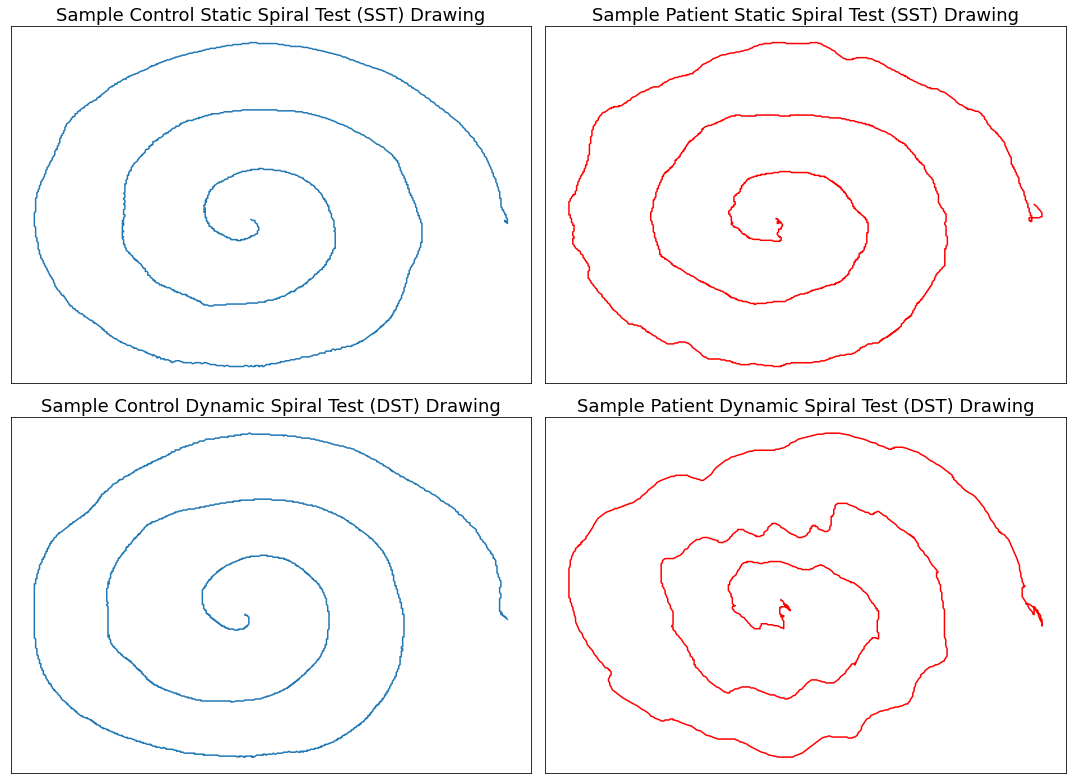

In [ ]:
patient_df = pd.read_csv(patientFiles[0], sep = ';', header = None)
static_patient_df, dynamic_patient_df = staticDynamicSplit(patient_df)

control_df = pd.read_csv(controlFiles[0], sep = ';', header = None)
static_control_df, dynamic_control_df = staticDynamicSplit(control_df)

plt.figure(figsize = (15, 11), tight_layout = True)
plt.subplot(2, 2, 1)
plt.plot(static_control_df[0], static_control_df[1])
plt.title('Sample Control Static Spiral Test (SST) Drawing', fontsize = 18)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.subplot(2, 2, 2)
plt.plot(static_patient_df[0], static_patient_df[1], 'r')
plt.title('Sample Patient Static Spiral Test (SST) Drawing', fontsize = 18)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.subplot(2, 2, 3)
plt.plot(dynamic_control_df[0], dynamic_control_df[1])
plt.title('Sample Control Dynamic Spiral Test (DST) Drawing', fontsize = 18)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.subplot(2, 2, 4)
plt.plot(dynamic_patient_df[0], dynamic_patient_df[1], 'r')
plt.title('Sample Patient Dynamic Spiral Test (DST) Drawing', fontsize = 18)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.savefig('paper_figures/sample_drawings.png')

## Prep pressure signal component breakdown figure for paper

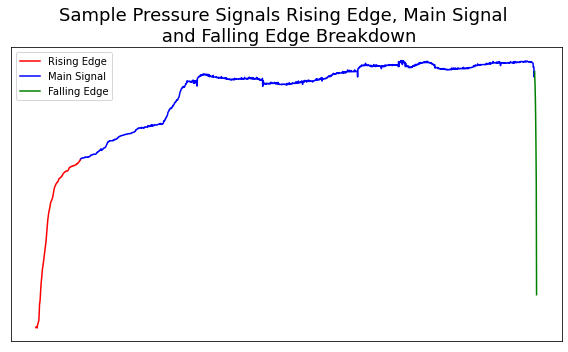

In [ ]:
from feature_functions import *
df1 = pd.read_csv('/work/ParkinsonHW/H_P000-0014.txt', sep = ';', header = None)
static_df1, dynamic_df1 = staticDynamicSplit(df1)
static_pressure1 = static_df1[3]
risingIndex1, fallingIndex1 = mainSignalThreshold(static_pressure1)

plt.figure(figsize = (8, 5), tight_layout = True)

plt.plot(static_pressure1[:risingIndex1], 'r', label = 'Rising Edge')
plt.plot(static_pressure1[risingIndex1:fallingIndex1], 'b', label = 'Main Signal')
plt.plot(static_pressure1[fallingIndex1-1:], 'g', label = 'Falling Edge')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.title('Sample Pressure Signals Rising Edge, Main Signal \n and Falling Edge Breakdown', fontsize = 18)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Pressure Exerted on Surface')

plt.savefig('paper_figures/sample_pressure_breakdown.png')

## Sample Smoothed Data figure

In [ ]:
from feature_functions import *
df = pd.read_csv('/work/ParkinsonHW/P_27110003.txt', sep = ";", header = None)

# split into static and dynamic dataframes
static_df, dynamic_df = staticDynamicSplit(df)

static_x = static_df[0]
static_y = static_df[1]
static_curve = np.array([static_x, static_y])

# radius & theta calculations
static_x0 = float(static_x[0])
static_y0 = float(static_y[0])
static_r = np.array(((static_x - static_x0)**2 + (static_y - static_y0)**2)**(1/2))
static_t = np.arctan((static_y - static_y0) / (static_x - static_x0+(10**(-10))))

static_velocity, static_acceleration, static_jerk, _, _ = smoothCurveFeature(static_curve, 1000, 10000, static_df)
static_velocity = static_velocity[50: len(static_velocity)-50]
static_acceleration = static_acceleration[50: len(static_acceleration)-50]
static_jerk = static_jerk[50: len(static_jerk)-50]

_, _, _, static_curvature, _ = smoothCurveFeature(static_curve, 1000, 100000, static_df)
static_curvature = static_curvature[50: len(static_curvature)-100]

static_pressure = static_df[3]
static_altitude = static_df[4]

dynamic_x = dynamic_df[0]
dynamic_y = dynamic_df[1]
dynamic_curve = np.array([dynamic_x, dynamic_y])

# radius & theta calculations
dynamic_x0 = float(dynamic_x[0])
dynamic_y0 = float(dynamic_y[0])
dynamic_r = np.array(((dynamic_x - dynamic_x0)**2 + (dynamic_y - dynamic_y0)**2)**(1/2))
dynamic_t = np.arctan((dynamic_y - dynamic_y0) / (dynamic_x - dynamic_x0+(10**(-10))))

dynamic_velocity, dynamic_acceleration, dynamic_jerk, _, _ = smoothCurveFeature(dynamic_curve, 1000, 10000, dynamic_df)
dynamic_velocity = dynamic_velocity[50: len(dynamic_velocity)-50]
dynamic_acceleration = dynamic_acceleration[50: len(dynamic_acceleration)-50]
dynamic_jerk = dynamic_jerk[50: len(dynamic_jerk)-50]

_, _, _, dynamic_curvature, _ = smoothCurveFeature(dynamic_curve, 1000, 100000, dynamic_df)
dynamic_curvature = dynamic_curvature[50: len(dynamic_curvature)-100]

dynamic_pressure = dynamic_df[3]
dynamic_altitude = dynamic_df[4]

static_radius, static_theta, _, _, _, _, _ = smoothPolarFeature(static_r, static_t, 1000, 1000)
dynamic_radius, dynamic_theta, _, _, _, _, _ = smoothPolarFeature(dynamic_r, dynamic_t, 1000, 1000)

NameError: name 'static_velocity' is not defined

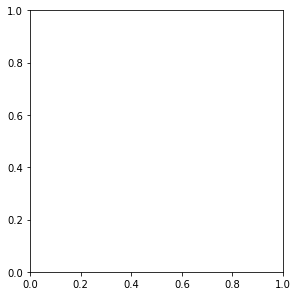

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (23, 8), tight_layout = True)
plt.subplot(4, 4, 1)
plt.plot(static_velocity)
plt.title('Sample Static \nSmoothed Velocity', fontsize = 18)
plt.subplot(4, 4, 2)
plt.plot(static_acceleration)
plt.title('Sample Static \nSmoothed Acceleration', fontsize = 18)
plt.subplot(4, 4, 3)
plt.plot(static_jerk)
plt.title('Sample Static \nSmoothed Jerk', fontsize = 18)
plt.subplot(4, 4, 4)
plt.plot(static_curvature) = 
plt.title('Sample Static \nSmoothed Curvature', fontsize = 18)
plt.subplot(4, 4, 5)
plt.plot(static_pressure)
plt.title('Sample Static \nPressure', fontsize = 18)
plt.subplot(4, 4, 6)
plt.plot(static_altitude)
plt.title('Sample Static \nPen Altitude', fontsize = 18)
plt.subplot(4, 4, 7)
plt.plot(static_radius)

plt.subplot(4, 4, 8)
plt.subplot(4, 4, 9)
plt.plot(dynamic_velocity, 'r')
plt.title('Sample Dynamic \nSmoothed Velocity', fontsize = 18)
plt.subplot(4, 4, 10)
plt.plot(dynamic_acceleration, 'r')
plt.title('Sample Dynamic \nSmoothed Acceelration', fontsize = 18)
plt.subplot(4, 4, 11)
plt.plot(dynamic_jerk, 'r')
plt.title('Sample Dynamic \nSmoothed Jerk', fontsize = 18)
plt.subplot(4, 4, 12)
plt.plot(dynamic_curvature, 'r')
plt.title('Sample Dynamic \nSmoothed Curvature', fontsize = 18)
plt.subplot(4, 4, 13)
plt.plot(dynamic_pressure, 'r')
plt.title('Sample Dynamic \nPressure', fontsize = 18)
plt.subplot(4, 4, 14)
plt.plot(dynamic_altitude, 'r')
plt.title('Sample Dynamic \nAltitude', fontsize = 18)
plt.subplot(4, 4, 15)
plt.subplot(4, 4, 16)

plt.savefig('paper_figures/sample_processed_data.png')

## Template Archimedean Spiral & Its Curvature

In [ ]:
import matplotlib.pyplot as plt
from math import *
x = []
y = []
'''
for i in range(125): 
    t = i / 20 * np.pi
    x.append((1+5*t) * -1 * np.cos(t))
    y.append((1+5*t) * np.sin(t))
'''
for i in np.arange(0, 7*np.pi, 0.02):
    x.append(400 - np.cos(i) * 16.8 * i)
    y.append(385 + np.sin(i) * 16.8 * i)

dx_dt = np.gradient(x[:])
dy_dt = np.gradient(y[:])
d2x_dt2 = np.gradient(dx_dt)
d2y_dt2 = np.gradient(dy_dt)
curvature = (dx_dt * d2y_dt2 - dy_dt * d2x_dt2) / (dx_dt ** 2 + dy_dt ** 2)**1.5

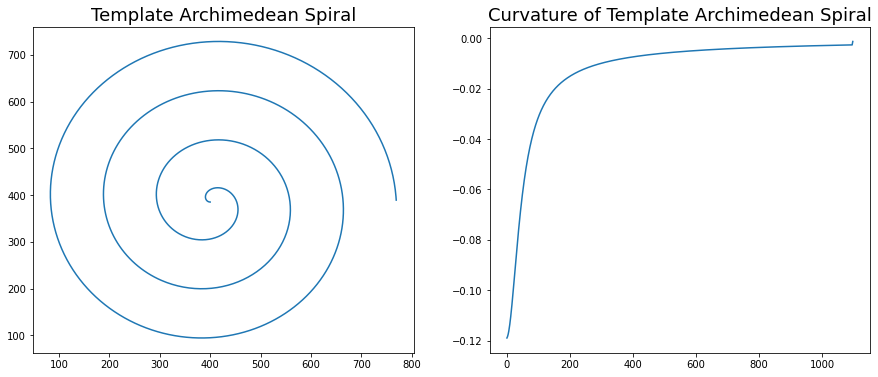

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title('Template Archimedean Spiral', fontsize = 18)
plt.subplot(1, 2, 2)
plt.plot(curvature[2:])
plt.title('Curvature of Template Archimedean Spiral', fontsize = 18)

plt.savefig('paper_figures/template_spiral_curvature.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ea7590-1f30-42ee-b9c1-c929b94e3f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>